# MODEL FRUIT METABOLISM

## Setup basic fruit model constraints

In [1]:
%matplotlib inline

#import library
from libsbml import readSBML
from cobra import io,flux_analysis
from cobra.core import Reaction,Metabolite
from IPython import display
import time

#import custom library
from studyFunctions import *


#import sbml file
cobra_model = io.sbml.create_cobra_model_from_sbml_file("FruitModel_GA_10_06_19.xml")
cobra_model.solver = "cplex"

cobra_model.reactions.get_by_id("diel_biomass").remove_from_model()

#remove free sucrose, glucose, NH4 and light uptake
for i in range(1,11):
    cobra_model.reactions.get_by_id("Sucrose_tx"+str(i)).lower_bound=0
    cobra_model.reactions.get_by_id("Sucrose_tx"+str(i)).upper_bound=0
    cobra_model.reactions.get_by_id("GLC_tx"+str(i)).lower_bound=0
    cobra_model.reactions.get_by_id("GLC_tx"+str(i)).upper_bound=0
    cobra_model.reactions.get_by_id("NH4_tx"+str(i)).lower_bound=0
    cobra_model.reactions.get_by_id("NH4_tx"+str(i)).upper_bound=0
    cobra_model.reactions.get_by_id("Photon_tx"+str(i)).lower_bound=0
    cobra_model.reactions.get_by_id("Photon_tx"+str(i)).upper_bound=0


#update phloem output to represent phloem uptake
for i in range(1,11):
    cobra_model.metabolites.get_by_id("X_Phloem_contribution_t"+str(i)).remove_from_model()
    rxn = cobra_model.reactions.get_by_id("Phloem_output_tx"+str(i))
    #print rxn.reaction
    metlist = rxn.metabolites.keys()
    for met in metlist:
        if met.id.__contains__("PROTON"):
            continue
        a = rxn.metabolites.get(met)
        rxn.add_metabolites({met:-2*a})
    c = rxn.metabolites.get(cobra_model.metabolites.get_by_id("sSUCROSE_b"+str(i)))
    rxn.add_metabolites({cobra_model.metabolites.get_by_id("sSUCROSE_b"+str(i)):-1*c})
    rxn.add_metabolites({cobra_model.metabolites.get_by_id("SUCROSE_c"+str(i)):c})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    #print rxn.reaction
    #break
    rxn.id = "Phloem_uptake_tx"+str(i)

cobra_model.reactions._generate_index()

cobra/core/reaction.py:396 UserWarning: malformed gene_reaction_rule '(  )' for <Reaction HEXOKINASE_RXN_MANNOSE_c10 at 0x7fd98fda9bd0>
cobra/core/reaction.py:396 UserWarning: malformed gene_reaction_rule '(  )' for <Reaction HEXOKINASE_RXN_MANNOSE_c6 at 0x7fd98b573310>
cobra/core/reaction.py:396 UserWarning: malformed gene_reaction_rule '(  )' for <Reaction HEXOKINASE_RXN_MANNOSE_c5 at 0x7fd98b573590>
cobra/core/reaction.py:396 UserWarning: malformed gene_reaction_rule '(  )' for <Reaction HEXOKINASE_RXN_MANNOSE_c4 at 0x7fd98b573910>
cobra/core/reaction.py:396 UserWarning: malformed gene_reaction_rule '(  )' for <Reaction HEXOKINASE_RXN_MANNOSE_c3 at 0x7fd98b573c10>
cobra/core/reaction.py:396 UserWarning: malformed gene_reaction_rule '(  )' for <Reaction HEXOKINASE_RXN_MANNOSE_c2 at 0x7fd98b573e90>
cobra/core/reaction.py:396 UserWarning: malformed gene_reaction_rule '(  )' for <Reaction HEXOKINASE_RXN_MANNOSE_c1 at 0x7fd98b588190>
cobra/core/reaction.py:396 UserWarning: malformed gene

In [2]:
for i in range(1,10):
    cobra_model.reactions.get_by_id("Ca_biomass"+str(i)).remove_from_model()
    cobra_model.reactions.get_by_id("Mg_biomass"+str(i)).remove_from_model()
    cobra_model.reactions.get_by_id("K_biomass"+str(i)).remove_from_model()


In [3]:
for i in range(1,11):
    rxn=cobra_model.reactions.get_by_id("AraCore_Biomass_tx"+str(i))
    rxn.lower_bound=0
    rxn.upper_bound=0

for i in range(1,11):
    r=cobra_model.reactions.get_by_id("Biomass_tx"+str(i))
    r.upper_bound = 0
    r.lower_bound = 0

## Setup biomass constraints based on experimental data processed using Colombie regression algorithm



In [4]:

cobra_model2 = cobra_model.copy()
#import lower bounds
import pandas

df = pandas.read_csv("/home/sanu/JoseConc_301118.csv",delimiter="\t")

DPA = list(df.DPA)
Conc=dict()

Conc["MAL"]=list(df.MAL)
Conc["CIT"]=list(df.CIT)
Conc["FUM"]=list(df.FUM)
Conc["SUCROSE"]=list(df.SUC)
Conc["FRU"]=list(df.FRU)
Conc["GLC"]=list(df.GLC)
Conc["L_ALPHA_ALANINE"]=list(df.L_ALPHA_ALANINE)
Conc["ASN"]=list(df.ASN)
Conc["L_ASPARTATE"]=list(df.L_ASPARTATE)
Conc["4_AMINO_BUTYRATE"]=list(df.GABA)
Conc["GLT"]=list(df.GLT)
Conc["GLN"]=list(df.GLN)
Conc["GLY"]=list(df.GLY)
Conc["ILE"]=list(df.ILE)
Conc["LYS"]=list(df.LYS)
Conc["MET"]=list(df.MET)
Conc["PHE"]=list(df.PHE)
Conc["PRO"]=list(df.PRO)
Conc["SER"]=list(df.SER)
Conc["THR"]=list(df.THR)
Conc["TRP"]=list(df.TRP)
Conc["TYR"]=list(df.TYR)
Conc["VAL"]=list(df.VAL)
Conc["STARCH"]=list(df.STARCH)
#Conc["Pi"]=list(df.Pi)


#import upper bounds
import pandas

df = pandas.read_csv("/home/sanu/JoseFluxMax_301118.csv",delimiter="\t")

DPA = list(df.DPA)
MaxFlux=dict()


MaxFlux["MAL"]=list(df.MAL)
MaxFlux["CIT"]=list(df.CIT)
MaxFlux["FUM"]=list(df.FUM)
MaxFlux["SUCROSE"]=list(df.SUC)
MaxFlux["FRU"]=list(df.FRU)
MaxFlux["GLC"]=list(df.GLC)
MaxFlux["L_ALPHA_ALANINE"]=list(df.L_ALPHA_ALANINE)
MaxFlux["ASN"]=list(df.ASN)
MaxFlux["L_ASPARTATE"]=list(df.L_ASPARTATE)
MaxFlux["4_AMINO_BUTYRATE"]=list(df.GABA)
MaxFlux["GLT"]=list(df.GLT)
MaxFlux["GLN"]=list(df.GLN)
MaxFlux["GLY"]=list(df.GLY)
MaxFlux["ILE"]=list(df.ILE)
MaxFlux["LYS"]=list(df.LYS)
MaxFlux["MET"]=list(df.MET)
MaxFlux["PHE"]=list(df.PHE)
MaxFlux["PRO"]=list(df.PRO)
MaxFlux["SER"]=list(df.SER)
MaxFlux["THR"]=list(df.THR)
MaxFlux["TRP"]=list(df.TRP)
MaxFlux["TYR"]=list(df.TYR)
MaxFlux["VAL"]=list(df.VAL)
MaxFlux["STARCH"]=list(df.STARCH)
#MaxFlux["Pi"]=list(df.Pi)


#import lower bounds
import pandas

df = pandas.read_csv("/home/sanu/JoseFluxMin_301118.csv",delimiter="\t")

DPA = list(df.DPA)
MinFlux=dict()


MinFlux["MAL"]=list(df.MAL)
MinFlux["CIT"]=list(df.CIT)
MinFlux["FUM"]=list(df.FUM)
MinFlux["SUCROSE"]=list(df.SUC)
MinFlux["FRU"]=list(df.FRU)
MinFlux["GLC"]=list(df.GLC)
MinFlux["L_ALPHA_ALANINE"]=list(df.L_ALPHA_ALANINE)
MinFlux["ASN"]=list(df.ASN)
MinFlux["L_ASPARTATE"]=list(df.L_ASPARTATE)
MinFlux["4_AMINO_BUTYRATE"]=list(df.GABA)
MinFlux["GLT"]=list(df.GLT)
MinFlux["GLN"]=list(df.GLN)
MinFlux["GLY"]=list(df.GLY)
MinFlux["ILE"]=list(df.ILE)
MinFlux["LYS"]=list(df.LYS)
MinFlux["MET"]=list(df.MET)
MinFlux["PHE"]=list(df.PHE)
MinFlux["PRO"]=list(df.PRO)
MinFlux["SER"]=list(df.SER)
MinFlux["THR"]=list(df.THR)
MinFlux["TRP"]=list(df.TRP)
MinFlux["TYR"]=list(df.TYR)
MinFlux["VAL"]=list(df.VAL)
MinFlux["STARCH"]=list(df.STARCH)
#MinFlux["Pi"]=list(df.Pi)


#set temporary biomass equations for amino acids
AA = ["GLN_c","ASN_c","SER_c","GLY_c","THR_c","L_ALPHA_ALANINE_c","4_AMINO_BUTYRATE_c","VAL_c","ILE_c","PHE_c","LEU_c","LYS_c","ARG_c","L_ASPARTATE_c","GLT_c","HIS_c","MET_c","PRO_c","TRP_c","TYR_c","CYS_c"]

scale = 1


In [5]:
for i in range(1,11):    
    
    #set temporary biomass equations for amino acids
    AA = ["GLN_c","ASN_c","SER_c","GLY_c","THR_c","L_ALPHA_ALANINE_c","4_AMINO_BUTYRATE_c","VAL_c","ILE_c","PHE_c","LEU_c","LYS_c","ARG_c","L_ASPARTATE_c","GLT_c","HIS_c","MET_c","PRO_c","TRP_c","TYR_c","CYS_c"]
    
    #for k in AA:
    #    rxn = Reaction("Biomass_"+str(k)+"_tx"+str(i))
    #    rxn.name="Biomass_"+str(k)
    #    rxn.add_metabolites({cobra_model2.metabolites.get_by_id(k+str(i)):-1})
    #    rxn.lower_bound = 0
    #    rxn.upper_bound = 1000
    #    cobra_model2.add_reaction(rxn)
    
    rxn = Reaction("Biomass_Lipid_tx"+str(i))
    rxn.name = "Biomass_Lipid"
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id("PHOSPHATIDYL_CHOLINE_r"+str(i)):-0.353,cobra_model2.metabolites.get_by_id("L_1_PHOSPHATIDYL_ETHANOLAMINE_r"+str(i)):-0.374,cobra_model2.metabolites.get_by_id("L_PHOSPHATIDATE_p"+str(i)):-0.273})
    rxn.lower_bound = 0
    rxn.upper_bound = 0
    cobra_model2.add_reaction(rxn)
    
    rxn = cobra_model2.reactions.get_by_id("Biomass_tx"+str(i))
    rxn.name = "Biomass_Protein"
    met = Metabolite("PROTEIN_b"+str(i))
    met.name="PROTEIN_b"+str(i)
    met.compartment = "b"+str(i)
    rxn.add_metabolites({met:1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    
    #remove cations from Biomass_tx
    cobra_model2.metabolites.get_by_id("K_b"+str(i)).remove_from_model()
    cobra_model2.metabolites.get_by_id("Ca_b"+str(i)).remove_from_model()
    cobra_model2.metabolites.get_by_id("Mg_b"+str(i)).remove_from_model()
    
    #create biomass constraints for DNA and RNA with GC content = 60%
    GC = 0.6
    
    rxn = Reaction("Biomass_DNA_tx"+str(i))
    rxn.name="Biomass_DNA"
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id("ATP_c"+str(i)):-(1-GC)*0.65,cobra_model2.metabolites.get_by_id("aATP_c"+str(i)):-(1-GC)*0.35,cobra_model2.metabolites.get_by_id("GTP_c"+str(i)):-GC*0.65,cobra_model2.metabolites.get_by_id("aGTP_c"+str(i)):-GC*0.35,cobra_model2.metabolites.get_by_id("UTP_p"+str(i)):-(1-GC)*0.18,cobra_model2.metabolites.get_by_id("aUTP_p"+str(i)):-(1-GC)*0.82,cobra_model2.metabolites.get_by_id("CTP_p"+str(i)):-GC*0.79,cobra_model2.metabolites.get_by_id("aCTP_p"+str(i)):-GC*0.21})
    met = Metabolite("DNA_b"+str(i))
    met.name="DNA_b"+str(i)
    met.compartment = "b"+str(i)
    rxn.add_metabolites({met:1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    cobra_model2.add_reaction(rxn)
    
    rxn = Reaction("Biomass_RNA_tx"+str(i))
    rxn.name="Biomass_RNA"
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id("DATP_p"+str(i)):-(1-GC)*0.79,cobra_model2.metabolites.get_by_id("aDATP_p"+str(i)):-(1-GC)*0.21,cobra_model2.metabolites.get_by_id("DGTP_p"+str(i)):-GC*0.50,cobra_model2.metabolites.get_by_id("aDGTP_p"+str(i)):-GC*0.10,cobra_model2.metabolites.get_by_id("bDGTP_p"+str(i)):-GC*0.40,cobra_model2.metabolites.get_by_id("DUTP_p"+str(i)):-(1-GC)*0.81,cobra_model2.metabolites.get_by_id("aDUTP_p"+str(i)):-(1-GC)*0.19,cobra_model2.metabolites.get_by_id("DCTP_p"+str(i)):-GC*0.79,cobra_model2.metabolites.get_by_id("aDCTP_p"+str(i)):-GC*0.21})
    met = Metabolite("RNA_b"+str(i))
    met.name="RNA_b"+str(i)
    met.compartment = "b"+str(i)
    rxn.add_metabolites({met:1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    cobra_model2.add_reaction(rxn)
    
    

### Set up initial metabolite composition

In [6]:
scale = 1
unit_time = DPA[1]-DPA[0]

for k in Conc.keys():
    if k=="AA" or k=="Protein" or k=="NA":
        continue
    rxn = Reaction("Initial_"+str(k)+"_tx")
    rxn.name="Initial_"+str(k)
    if k=="STARCH":
        rxn.add_metabolites({cobra_model2.metabolites.get_by_id(k+"_p1"):1})
    else:
        rxn.add_metabolites({cobra_model2.metabolites.get_by_id(k+"_c1"):1})
    rxn.lower_bound = (float(Conc[k][0]))/scale
    rxn.upper_bound = (float(Conc[k][0]))/scale
    rxn.notes["influx_stage"]=1
    cobra_model2.add_reaction(rxn)



### Adding linker reactions reactions

In [7]:
#cytosolic and plastidic transfer reactions
for i in range(1,10):
    k = "STARCH"
    rxn = Reaction(k+"_p_Transfer"+str(i)+str(i+1))
    rxn.name = k+"_p_Transfer"+str(i)+str(i+1)
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id(k+"_p"+str(i)):-1,cobra_model2.metabolites.get_by_id(k+"_p"+str(i+1)):1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    rxn.notes["influx_stage"]=i+1
    rxn.notes["outflux_stage"]=i
    cobra_model2.add_reaction(rxn)
    
    for k in ["SUCROSE","GLC","FRU","MAL","CIT","FUM"]:
        rxn = Reaction(k+"_c_Transfer"+str(i)+str(i+1))
        rxn.name = k+"_Transfer"+str(i)+str(i+1)
        rxn.add_metabolites({cobra_model2.metabolites.get_by_id(k+"_c"+str(i)):-1,cobra_model2.metabolites.get_by_id(k+"_c"+str(i+1)):1})
        rxn.lower_bound = 0
        rxn.upper_bound = 1000
        rxn.notes["influx_stage"]=i+1
        rxn.notes["outflux_stage"]=i
        cobra_model2.add_reaction(rxn)
    
    for k in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","HIS","MET","PRO","TRP","TYR","CYS"]:
        rxn = Reaction(k+"_c_Transfer"+str(i)+str(i+1))
        rxn.name = k+"_Transfer"+str(i)+str(i+1)
        rxn.add_metabolites({cobra_model2.metabolites.get_by_id(k+"_c"+str(i)):-1,cobra_model2.metabolites.get_by_id(k+"_c"+str(i+1)):1})
        rxn.lower_bound = 0
        rxn.upper_bound = 1000
        rxn.notes["influx_stage"]=i+1
        rxn.notes["outflux_stage"]=i
        cobra_model2.add_reaction(rxn)


#vacuolar transfer reactions
import re
fin = open("/home/sanu/Documents/FractionalCharges.csv","r")

ChargeDict=dict()
for line in fin:
  met=line.replace("\n","").split("\t")[0]
  met = met.replace("-","_")
  charge = line.replace("\n","").split("\t")[1]
  ChargeDict[met]=charge

fin.close()

for met in cobra_model2.metabolites:
  tempMet=met.id
  if(met.id[len(met.id)-1]=="2" or met.id[len(met.id)-1]=="1"):
    tempMet = met.id[0:len(met.id)-1]
  if(ChargeDict.keys().__contains__(tempMet)):
    met.charge = ChargeDict.get(tempMet)
  if met.charge is None:
    met.charge=0


from cobra.core import Metabolite, Reaction

#Adding transfer reactions
###################
#tmset =set()
#for met in cobra_model2.metabolites:
#    if met.compartment.__contains__("v") and not met.compartment == "v10":
#        tmset.add(met.id[0:len(met.id)-1])

vacMets=["SUCROSE_v","MAL_v","AMMONIUM_v","CIT_v","GLN_v","ASN_v","SER_v","GLN_v","GLY_v","THR_v","L_ALPHA_ALANINE_v","4_AMINO_BUTYRATE_v","VAL_v","ILE_v","PHE_v","LEU_v","LYS_v","ARG_v","L_ASPARTATE_v","GLT_v","bHIS_v","MET_v","PRO_v","TRP_v","TYR_v","CYS_v","GLC_v","FRU_v","FUM_v","MGII_v","KI_v","CAII_v","NITRATE_v"]
tmset = set(vacMets)
        
for i in range(1,10):
    for met in tmset:
        tempRxn = Reaction(met+"_Transfer"+str(i)+str(i+1))
        tempRxn.add_metabolites({cobra_model2.metabolites.get_by_id(met+str(i)):-1,cobra_model2.metabolites.get_by_id(met+str(i+1)):1})
        tempRxn.lower_bound=0
        tempRxn.upper_bound=1000
        tempRxn.notes["influx_stage"]=i+1
        tempRxn.notes["outflux_stage"]=i
        cobra_model2.add_reaction(tempRxn)


fractionMets=dict()
for rxn in cobra_model2.reactions:
    for met in rxn.metabolites.keys():
        a=re.search("^a{1,3}",met.id)
        anion=""
        if a:
            anion=a.group(0)
        b=re.search("^b{1,3}",met.id)
        basic=""
        if b:
            basic=b.group(0)
        prefix = anion
        if prefix == "":
            prefix = basic
        if (abs(rxn.metabolites.get(met)) % 1 > 0 and (not prefix == "") and met.compartment == "v1"):
            fractionMets[met]=prefix

temp=cobra_model2.copy()
for i in range(1,10):
    for met in fractionMets.keys():
        for rxn in met.reactions:
            if rxn.id.__contains__("_Transfer"):
                continue
            else:
                mainMet = met.id[len(fractionMets[met]):]
                coeff1 = temp.reactions.get_by_id(rxn.id).metabolites.get(temp.metabolites.get_by_id(mainMet))
                coeff2 = temp.reactions.get_by_id(rxn.id).metabolites.get(temp.metabolites.get_by_id(met.id))
                total = coeff1 + coeff2
                coeff1 = float(coeff1)/total
                coeff2 = float(coeff2)/total
                if cobra_model2.reactions.has_id(mainMet[0:len(mainMet)-1]+"_Transfer"+str(i)+str(i+1)):
                    if cobra_model2.reactions.has_id(met.id[0:len(met.id)-1]+"_Transfer"+str(i)+str(i+1)):
                        temp.reactions.get_by_id(met.id[0:len(met.id)-1]+"_Transfer"+str(i)+str(i+1)).remove_from_model()
                    temp.reactions.get_by_id(mainMet[0:len(mainMet)-1]+"_Transfer"+str(i)+str(i+1)).remove_from_model()
                    Reac = Reaction(mainMet[0:len(mainMet)-1]+"_Transfer"+str(i)+str(i+1),name=mainMet+"_Transfer"+str(i)+str(i+1))
                    Reac.add_metabolites({temp.metabolites.get_by_id(met.id[0:len(met.id)-1]+str(i)):-coeff2,temp.metabolites.get_by_id(met.id[0:len(met.id)-1]+str(i+1)):coeff2,temp.metabolites.get_by_id(mainMet[0:len(mainMet)-1]+str(i)):-coeff1,temp.metabolites.get_by_id(mainMet[0:len(mainMet)-1]+str(i+1)):coeff1})
                    Reac.upper_bound=1000
                    temp.add_reaction(Reac)
                    #print Reac.reaction
                    break

#####################        


cobra_model2 = temp.copy()

### Accounting for change in vacuolar pH during fruit development.

In [10]:
temp1 = convertToClassicalModel(cobra_model2,comp="v1",updateCharges = "FractionalCharges.csv")

In [11]:

temp2 = convertToClassicalModel(temp1,comp="v2",updateCharges = "FractionalCharges.csv")
temp3 = convertToClassicalModel(temp2,comp="v3",updateCharges = "FractionalCharges.csv")
temp4 = convertToClassicalModel(temp3,comp="v4",updateCharges = "FractionalCharges.csv")
temp5 = convertToClassicalModel(temp4,comp="v5",updateCharges = "FractionalCharges.csv")
temp6 = convertToClassicalModel(temp5,comp="v6",updateCharges = "FractionalCharges.csv")
temp7 = convertToClassicalModel(temp6,comp="v7",updateCharges = "FractionalCharges.csv")
temp8 = convertToClassicalModel(temp7,comp="v8",updateCharges = "FractionalCharges.csv")
temp9 = convertToClassicalModel(temp8,comp="v9",updateCharges = "FractionalCharges.csv")


In [53]:
temp10 = convertToClassicalModel(temp9,comp="v10",updateCharges = "FractionalCharges.csv")
cobra_model2 = temp10.copy()

## Using cherry tomato data for vacuolar pH (from Rolin et al 2000) to update tomato vacuolar pH during development



In [11]:
from pandas import DataFrame
d = {"DPA":[4,7,12,20,28,33],"pH":[4.53,4.37,4.03,4.01,3.66,3.86]}
pd = DataFrame(data = d)
pd

,DPA,pH
0,4,4.53
1,7,4.37
2,12,4.03
3,20,4.01
4,28,3.66
5,33,3.86


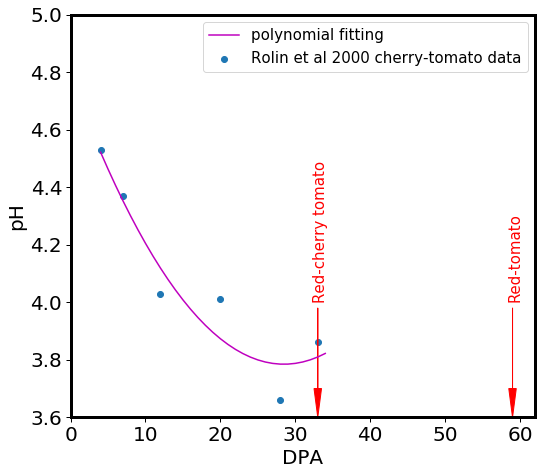

In [14]:
from pandas import DataFrame
d = {"DPA":[4,7,12,20,28,33],"pH":[4.53,4.37,4.03,4.01,3.66,3.86]}
pd = DataFrame(data = d)

import numpy as np
p = np.polyfit(d["DPA"],d["pH"],2)
q = np.poly1d(p)
#print(p)

x1=list()
y1=list()
y2=list()
for i in range(4,35):
    x1.append(i)
    y2.append(q(i))

    
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth']=3 # makes axes line thicker
plt.figure(figsize=(8,7))

plt.scatter(d["DPA"],d["pH"],label="Rolin et al 2000 cherry-tomato data")
plt.plot(x1,y2,label="polynomial fitting",color="m")
plt.text(32.3,4.45,"Red-cherry tomato",fontsize=15,color="r",rotation=90)
plt.arrow(33,3.98,0,-0.28,head_width=1,head_length=0.1,color="r")
plt.text(58.3,4.27,"Red-tomato",fontsize=15,color="r",rotation=90)
plt.arrow(59,3.98,0,-0.28,head_width=1,head_length=0.1,color="r")
plt.xlim(0,62)
plt.ylim(3.6,5.0)
plt.ylabel("pH")
plt.xlabel("DPA")
plt.legend(fontsize="15")
plt.tight_layout()
plt.show()


VacpH = dict()
compH = dict()
i=1
for x in DPA[1:]:
    VacpH[x]=round(q(x),1)
    compH["v"+str(i)]=round(q(x),1)
    i=i+1

Linear transformation of cherry tomato data to estiamte tomato DPA

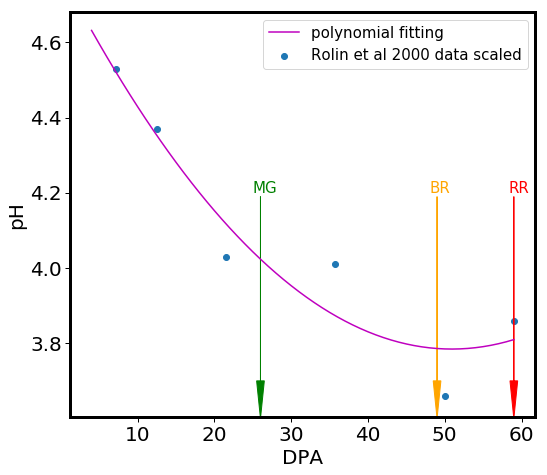

In [16]:
from pandas import DataFrame
d = {"DPA":[4,7,12,20,28,33],"pH":[4.53,4.37,4.03,4.01,3.66,3.86]}
d2 = {"DPA":[4,7,12,20,28,33],"pH":[4.53,4.37,4.03,4.01,3.66,3.86]}
for x in range(0,len(d["DPA"])):
    d2["DPA"][x]=round(d["DPA"][x]*(59.0/33),2)

pd = DataFrame(data = d2)

import numpy as np
p = np.polyfit(d2["DPA"],d2["pH"],2)
q = np.poly1d(p)

x1=list()
y1=list()
y2=list()
for i in range(4,60):
    x1.append(i)
    y2.append(q(i))

    
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth']=3 # makes axes line thicker
plt.figure(figsize=(8,7))

plt.scatter(d2["DPA"],d2["pH"],label="Rolin et al 2000 data scaled")
plt.plot(x1,y2,label="polynomial fitting",color="m")
plt.text(25,4.2,"MG",fontsize=15,color="g")
plt.arrow(26,4.19,0,-0.49,head_width=1,head_length=0.1,color="g")
plt.text(48,4.2,"BR",fontsize=15,color="orange")
plt.arrow(49,4.19,0,-0.49,head_width=1,head_length=0.1,color="orange")
plt.text(58.3,4.2,"RR",fontsize=15,color="r")
plt.arrow(59,4.19,0,-0.49,head_width=1,head_length=0.1,color="r")
plt.ylabel("pH")
plt.xlabel("DPA")
plt.legend(fontsize="15",loc="best")
plt.tight_layout()
plt.show()


VacpH = dict()
compH = dict()
i=1
for x in DPA[1:]:
    VacpH[x]=round(q(x),1)
    compH["v"+str(i)]=round(q(x),1)
    i=i+1
#d

### Setting up final biomass before updating vacuolar pH

In [54]:

AA_b = ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","HIS","MET","PRO","TRP","TYR","CYS"]

for m in AA_b:
    met = Metabolite(m+"_b10")
    met.compartment = "b10"
    met.name = cobra_model2.metabolites.get_by_id(m+"_c10").name
    met.formula = cobra_model2.metabolites.get_by_id(m+"_c10").formula
    met.notes = cobra_model2.metabolites.get_by_id(m+"_c10").notes
    met.charge = cobra_model2.metabolites.get_by_id(m+"_c10").charge
    rxn = Reaction("Biomass_"+m+"_c_tx10")
    rxn.name="Biomass "+m+" _c accumulation"
    cobra_model2.add_reaction(rxn)
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id(m+"_c10"):-1,met:1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    
    rxn = Reaction("Biomass_"+m+"_v_tx10")
    rxn.name="Biomass "+m+" _v accumulation"
    cobra_model2.add_reaction(rxn)
    if m == "HIS":
        rxn.add_metabolites({cobra_model2.metabolites.get_by_id("b"+m+"_v10"):-1,met:1})
    else:
        rxn.add_metabolites({cobra_model2.metabolites.get_by_id(m+"_v10"):-1,met:1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    
    
OA = ["CIT","MAL","FUM"]
for m in OA:
    met = Metabolite(m+"_b10")
    met.compartment = "b10"
    met.name = cobra_model2.metabolites.get_by_id(m+"_c10").name
    met.formula = cobra_model2.metabolites.get_by_id(m+"_c10").formula
    met.notes = cobra_model2.metabolites.get_by_id(m+"_c10").notes
    met.charge = cobra_model2.metabolites.get_by_id(m+"_c10").charge
    rxn = Reaction("Biomass_"+m+"_c_tx10")
    rxn.name="Biomass "+m+" _c accumulation"
    cobra_model2.add_reaction(rxn)
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id(m+"_c10"):-1,met:1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    
    rxn = Reaction("Biomass_"+m+"_v_tx10")
    rxn.name="Biomass "+m+" _v accumulation"
    cobra_model2.add_reaction(rxn)
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id(m+"_v10"):-1,met:1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000


Sugars = ["GLC","FRU","SUCROSE"]
for m in Sugars:
    met = Metabolite(m+"_b10")
    met.compartment = "b10"
    met.name = cobra_model2.metabolites.get_by_id(m+"_c10").name
    met.formula = cobra_model2.metabolites.get_by_id(m+"_c10").formula
    met.notes = cobra_model2.metabolites.get_by_id(m+"_c10").notes
    met.charge = cobra_model2.metabolites.get_by_id(m+"_c10").charge
    rxn = Reaction("Biomass_"+m+"_c_tx10")
    rxn.name="Biomass "+m+" _c accumulation"
    cobra_model2.add_reaction(rxn)
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id(m+"_c10"):-1,met:1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    
    rxn = Reaction("Biomass_"+m+"_v_tx10")
    rxn.name="Biomass "+m+" _v accumulation"
    cobra_model2.add_reaction(rxn)
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id(m+"_v10"):-1,met:1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    #######
    #rxn = Reaction("HYPO_biomass"+m)
    #rxn.add_metabolites({met:-1})
    #rxn.lower_bound = 0
    #rxn.upper_bound = 10
    #cobra_model2.add_reaction(rxn)




rxn = Reaction("Final_Biomass_tx")
rxn.name = "Final Fruit Biomass"
for k in Conc.keys():
    if k=="AA":
        for i in AA_b:
            rxn.add_metabolites({cobra_model2.metabolites.get_by_id(i+"_b10"):-float(Conc.get(k)[10])/scale})
    elif k=="Protein":
        continue
    elif k=="NA":
        continue
    else:
        if k=="STARCH":
            rxn.add_metabolites({cobra_model2.metabolites.get_by_id("Starch_b10"):-float(Conc.get(k)[10])/scale})
        elif k=="CELLULOSE":
            continue
        elif k=="PALMITATE":
            continue
        #elif k=="FUM":
        #    continue
        #elif k=="Pi":
        #    continue
        else:
            rxn.add_metabolites({cobra_model2.metabolites.get_by_id(k+"_b10"):-float(Conc.get(k)[10])/scale})

rxn.lower_bound = 0
rxn.upper_bound = 1000
cobra_model2.add_reaction(rxn)

for i in range(1,11):
    rxn = Reaction("Protein_biomass_demand_tx"+str(i))
    rxn.name = "Protein in Biomass "+str(i)
    k="Protein"
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id("PROTEIN_b"+str(i)):-1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    cobra_model2.add_reaction(rxn)

rxn = Reaction("Final_DNARNA_tx")
rxn.name = "Final NA in Biomass"
k="NA"
rxn.add_metabolites({cobra_model2.metabolites.get_by_id("RNA_b10"):-1,cobra_model2.metabolites.get_by_id("DNA_b10"):-1})
rxn.lower_bound = 0#float(Conc.get(k)[10])/scale
rxn.upper_bound = 0#float(Conc.get(k)[10])/scale
cobra_model2.add_reaction(rxn)


for i in range(10,11):
    rxn = Reaction("NITRATE_biomass"+str(i))
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id("NITRATE_v"+str(i)):-1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    cobra_model2.add_reaction(rxn)
    rxn = Reaction("MAL_biomass"+str(i))
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id("MAL_v"+str(i)):-1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    cobra_model2.add_reaction(rxn)
    rxn = Reaction("CIT_biomass"+str(i))
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id("CIT_v"+str(i)):-1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    cobra_model2.add_reaction(rxn)
    for met in ["CAII","KI","MGII","NITRATE"]:
        rxn = Reaction(met+"_biomass_c"+str(i))
        rxn.add_metabolites({cobra_model2.metabolites.get_by_id(met+"_c"+str(i)):-1})
        rxn.lower_bound = 0
        rxn.upper_bound = 1000
        cobra_model2.add_reaction(rxn)




In [55]:
chargedFruit = convertToFractionalChargesFruit(cobra_model2,infile="MetaboliteChargedStates.xlsx",compH=compH)
chargedFruit.reactions.get_by_id("Final_Biomass_tx").objective_coefficient=1

In [56]:
#removed LEU and TRP from phloem because degradation pathway is incomplete and their fraction in 
# phloem is extremely minor
for Met in ["LEU_c","TRP_c","VAL_c","ILE_c","PHE_c"]:
    for i in range(1,11):
        met = chargedFruit.metabolites.get_by_id(Met+str(i))
        coeff = chargedFruit.reactions.get_by_id("Phloem_uptake_tx"+str(i)).metabolites.get(met)
        chargedFruit.reactions.get_by_id("Phloem_uptake_tx"+str(i)).add_metabolites({met:-1*coeff})

sol=chargedFruit.optimize()
print(sol.f)

233.656145426


### Constraining cellulose demand flux based on increasing cell volume

In [57]:
from studyFunctions import celluloseDemandFlux

cobra_model2 = chargedFruit.copy()
print("Constraining cellulose demand flux...")


for i in range(1,11):
    rxn = Reaction("CELLULOSE_accumulation"+str(i))
    met = cobra_model2.metabolites.get_by_id("CELLULOSE_c"+str(i))
    rxn.add_metabolites({met:-1})
    rxn.lower_bound = celluloseDemandFlux(DPA[i],Ncells = 25*(10**6),unit_time=unit_time)
    rxn.upper_bound = celluloseDemandFlux(DPA[i],Ncells = 25*(10**6),unit_time=unit_time)
    cobra_model2.add_reaction(rxn)


Constraining cellulose demand flux...


### Constraining palmitate demand flux based on increasing cell volume


In [58]:
from studyFunctions import phospholipidDemandFlux

print("Constraining phospholipid demand flux...")

for i in range(1,11):
    rxn = Reaction("phospholipid_accumulation"+str(i))
    met = cobra_model2.metabolites.get_by_id("L_1_PHOSPHATIDYL_ETHANOLAMINE_r"+str(i))
    rxn.add_metabolites({met:-0.273})
    met = cobra_model2.metabolites.get_by_id("PHOSPHATIDYL_CHOLINE_r"+str(i))
    rxn.add_metabolites({met:-0.353})
    met = cobra_model2.metabolites.get_by_id("L_PHOSPHATIDATE_p"+str(i))
    rxn.add_metabolites({met:-0.374})
    rxn.lower_bound = float(phospholipidDemandFlux(DPA[i],Ncells = 25*(10**6),unit_time=unit_time,scaling_factor=100.0/8.512820512820287))
    rxn.upper_bound = float(phospholipidDemandFlux(DPA[i],Ncells = 25*(10**6),unit_time=unit_time,scaling_factor=100.0/8.512820512820287))
    cobra_model2.add_reaction(rxn)

Constraining phospholipid demand flux...


In [59]:
sol = cobra_model2.optimize()
sol.f

233.65614542592633

### Constraining protein demand flux based on increasing cell volume


In [60]:
ProtConc=21458.1747597         #Biais data
#ProtConc=19659.7704473         #Jose's data

In [61]:
from studyFunctions import estimateProteinDemandFlux

print("Constraining protein demand flux...")
#cobra_model2 = temp_model.copy()
for i in range(1,11):
    rxn = cobra_model2.reactions.get_by_id("Protein_biomass_demand_tx"+str(i))
    print(estimateProteinDemandFlux(DPA[i],ProtConc=21458.1747597,unit_time=unit_time,Ncell = 25*(10**6)))
    temp_A = estimateProteinDemandFlux(DPA[i],ProtConc=21458.1747597,unit_time=unit_time,Ncell = 25*(10**6))
    rxn.lower_bound = temp_A
    rxn.upper_bound = temp_A
    



Constraining protein demand flux...
0.0112816633773
0.0174385732478
0.0259973905035
0.030016941082
0.0237650500464
0.013162547312
0.00567001934018
0.00208064699906
0.000668913450129
0.000176835351992


In [62]:
sol = cobra_model2.optimize()
print(sol.f)

2.79327470459


### Phytol and Lycopene data

In [64]:
#constraining pigment accumulation/degradation rates
for i in range(1,11):
    rxn = Reaction("Lycopene_biomass_demand_tx"+str(i))
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id("CPD1F_114_p"+str(i)):-1})
    rxn.lower_bound = float(estimateLycopeneDemand(DPA[i],unit_time)*0.001)    #mmol/fruit/5.1day
    rxn.upper_bound = float(estimateLycopeneDemand(DPA[i],unit_time)*0.001)    #mmol/fruit/5.1day
    #print(rxn.reaction)
    print(rxn.lower_bound)
    cobra_model2.add_reaction(rxn)
    
    rxn = Reaction("Phytol_biomass_demand_tx"+str(i))
    rxn.add_metabolites({cobra_model2.metabolites.get_by_id("PHYTOL_p"+str(i)):-1})
    rxn.lower_bound = float(estimatePhytolDemand(DPA[i],unit_time)*0.001)         #mmol/fruit/5.1day
    rxn.upper_bound = float(estimatePhytolDemand(DPA[i],unit_time)*0.001)         #mmol/fruit/5.1day
    #print rxn.lower_bound
    cobra_model2.add_reaction(rxn)

2.49659137808e-12
9.47693877151e-10
8.15478226563e-08
2.8662259526e-06
5.49617628915e-05
0.000632356115311
0.00308416828079
0.0031979747548
0.000873216062261
0.000160538104002


In [65]:
sol=cobra_model2.optimize()
print(sol.f)

2.78611852866


### checkpoint : create backup

In [66]:
backup2 =  cobra_model2.copy()

### Add osmotic constraint to fruit model


In [68]:
cobra_model2 = backup2.copy()


vacMets=["SUCROSE_v","MAL_v","NITRATE_v","AMMONIUM_v","CIT_v","GLN_v","ASN_v","SER_v","GLY_v","THR_v","L_ALPHA_ALANINE_v","4_AMINO_BUTYRATE_v","VAL_v","ILE_v","PHE_v","LEU_v","LYS_v","ARG_v","L_ASPARTATE_v","GLT_v","bHIS_v","MET_v","PRO_v","TRP_v","TYR_v","CYS_v","GLC_v","FRU_v","FUM_v","MGII_v","KI_v","CAII_v"]


#Add water potential constraint on the whole cell
for i in range(1,10):
    met1_v = Metabolite("VO_"+str(i))
    met1_v.name = "vacuolar osmolarity pseudo metabolite"
    met1_c = Metabolite("CO_"+str(i))
    met1_c.name = "cytosolic osmolarity pseudo metabolite"
    met2_c = Metabolite("CC_c"+str(i))
    met2_c.name = "cytosolic_charge_constraint"
    met2_c.compartment="c"+str(i)
    met2_v = Metabolite("CC_v"+str(i))
    met2_v.name = "vacuolar_charge_constraint"
    met2_v.compartment="v"+str(i)
    for metID in vacMets:
        met = cobra_model2.metabolites.get_by_id(metID+str(i))
        rxn = cobra_model2.reactions.get_by_id(metID+"_Transfer"+str(i)+str(i+1))
        charge = 0
        for Reac in rxn.reactants:
            if Reac.id.__contains__("PROTON"):
                continue
            charge = charge + (rxn.metabolites.get(Reac)*int(Reac.charge)*-1)
        rxn.add_metabolites({met1_v:1,met2_v:charge})
    for rxn in cobra_model2.reactions.query("_c_Transfer"+str(i)+str(i+1)):
        charge = 0
        for Reac in rxn.reactants:
            if Reac.id.__contains__("PROTON"):
                continue
            charge = charge + (rxn.metabolites.get(Reac)*int(Reac.charge)*-1)
        rxn.add_metabolites({met1_c:1,met2_c:charge})




#Set constraints for final fruit biomass
met1_v = Metabolite("VO_10")
met1_v.name = "vacuolar osmolarity pseudo metabolite"
met1_c = Metabolite("CO_10")
met1_c.name = "cytosolic osmolarity pseudo metabolite"
met2_c = Metabolite("CC_c10")
met2_c.name = "cytosolic_charge_constraint"
met2_c.compartment="c10"
met2_v = Metabolite("CC_v10")
met2_v.name = "vacuolar_charge_constraint"
met2_v.compartment="v10"

VO_10 = 0
CO_10 = 0
CC_c10 = 0
CC_v10 = 0

AA_b = ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","HIS","MET","PRO","TRP","TYR","CYS"]

for m in AA_b:
    met = cobra_model2.metabolites.get_by_id(m+"_c10")
    rxn = cobra_model2.reactions.get_by_id("Biomass_"+m+"_c_tx10")
    charge = 0
    stoich = 0
    for Reac in rxn.reactants:
        if Reac.id.__contains__("PROTON"):
            continue
        charge = charge + (rxn.metabolites.get(Reac)*int(Reac.charge)*-1)
        stoich = stoich + (rxn.metabolites.get(Reac)*-1)
    rxn.add_metabolites({met1_c:stoich,met2_c:charge})
    met = cobra_model2.metabolites.get_by_id(m+"_v10")
    rxn = cobra_model2.reactions.get_by_id("Biomass_"+m+"_v_tx10")
    charge = 0
    stoich = 0
    for Reac in rxn.reactants:
        if Reac.id.__contains__("PROTON"):
            continue
        charge = charge + (rxn.metabolites.get(Reac)*int(Reac.charge)*-1)
        stoich = stoich + (rxn.metabolites.get(Reac)*-1)
    rxn.add_metabolites({met1_v:stoich,met2_v:charge})

    
OA = ["CIT","MAL"]

for m in OA:
    met = cobra_model2.metabolites.get_by_id(m+"_c10")
    rxn = cobra_model2.reactions.get_by_id("Biomass_"+m+"_c_tx10")
    charge = 0
    stoich = 0
    for Reac in rxn.reactants:
        if Reac.id.__contains__("PROTON"):
            continue
        charge = charge + (rxn.metabolites.get(Reac)*int(Reac.charge)*-1)
        stoich = stoich + (rxn.metabolites.get(Reac)*-1)
    rxn.add_metabolites({met1_c:stoich,met2_c:charge})
    met = cobra_model2.metabolites.get_by_id(m+"_v10")
    rxn = cobra_model2.reactions.get_by_id("Biomass_"+m+"_v_tx10")
    charge = 0
    stoich = 0
    for Reac in rxn.reactants:
        if Reac.id.__contains__("PROTON"):
            continue
        charge = charge + (rxn.metabolites.get(Reac)*int(Reac.charge)*-1)
        stoich = stoich + (rxn.metabolites.get(Reac)*-1)
    rxn.add_metabolites({met1_v:stoich,met2_v:charge})

Sugars = ["GLC","FRU","SUCROSE"]

for m in Sugars:
    met = cobra_model2.metabolites.get_by_id(m+"_c10")
    rxn = cobra_model2.reactions.get_by_id("Biomass_"+m+"_c_tx10")
    charge = 0
    stoich = 0
    for Reac in rxn.reactants:
        if Reac.id.__contains__("PROTON"):
            continue
        charge = charge + (rxn.metabolites.get(Reac)*int(Reac.charge)*-1)
        stoich = stoich + (rxn.metabolites.get(Reac)*-1)
    rxn.add_metabolites({met1_c:stoich,met2_c:charge})
    met = cobra_model2.metabolites.get_by_id(m+"_v10")
    rxn = cobra_model2.reactions.get_by_id("Biomass_"+m+"_v_tx10")
    charge = 0
    stoich = 0
    for Reac in rxn.reactants:
        if Reac.id.__contains__("PROTON"):
            continue
        charge = charge + (rxn.metabolites.get(Reac)*int(Reac.charge)*-1)
        stoich = stoich + (rxn.metabolites.get(Reac)*-1)
    rxn.add_metabolites({met1_v:stoich,met2_v:charge})


#
rxn = cobra_model2.reactions.get_by_id("Ca_biomass10")
rxn.add_metabolites({met1_v:1,met2_v:2})
rxn = cobra_model2.reactions.get_by_id("Mg_biomass10")
rxn.add_metabolites({met1_v:1,met2_v:2})
rxn = cobra_model2.reactions.get_by_id("K_biomass10")
rxn.add_metabolites({met1_v:1,met2_v:1})
rxn = cobra_model2.reactions.get_by_id("NITRATE_biomass10")
rxn.add_metabolites({met1_v:1,met2_v:-1})
rxn = cobra_model2.reactions.get_by_id("CAII_biomass_c10")
rxn.add_metabolites({met1_c:1,met2_c:2})
rxn = cobra_model2.reactions.get_by_id("MGII_biomass_c10")
rxn.add_metabolites({met1_c:1,met2_c:2})
rxn = cobra_model2.reactions.get_by_id("KI_biomass_c10")
rxn.add_metabolites({met1_c:1,met2_c:1})
rxn = cobra_model2.reactions.get_by_id("NITRATE_biomass_c10")
rxn.add_metabolites({met1_c:1,met2_c:-1})


import math
#Set total(met1_v) = (volume_of_vacuole/volume_of_cytosol) * total(met1_c)
for i in range(1,11):
    Vv = 0.853*(1-(math.e**((-2293-(DPA[i]*24*60))/10633)))
    Vc = (0.933 - Vv)/1.13
    #print(Vv/Vc)
    met = Metabolite("WCO_"+str(i))
    met.name = "Whole cell osmolarity psuedo metabolite"
    met1_v = cobra_model2.metabolites.get_by_id("VO_"+str(i))
    met1_c = cobra_model2.metabolites.get_by_id("CO_"+str(i))
    rxn =Reaction("IntercellularWaterPotentialConstraint"+str(i))
    rxn.add_metabolites({met1_c:-1,met1_v:-1*(Vv/Vc),met:1+(Vv/Vc)})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    cobra_model2.add_reaction(rxn)

        
#Set sum(van't_Hoff_factor*number_of_moles) = cell_volume*Osmolarity
import math
C_cell = 275           #Almeida and Huber 1999; units = mOsmol/kg ~ mmol/L
C_cell = 275000        #units = mmol/m3
for i in range(1,11):
    met = cobra_model2.metabolites.get_by_id("WCO_"+str(i))
    V_pericarp = estimateVpericarp(DPA[i],hollow=False)
    rxn = Reaction("WCOsetter_tx"+str(i))
    rxn.name = "WCO_setter"
    rxn.add_metabolites({met:-1})
    rxn.lower_bound = round(V_pericarp*C_cell,3)
    rxn.upper_bound = round(V_pericarp*C_cell,3)
    cobra_model2.add_reaction(rxn)



In [39]:
sol=cobra_model2.optimize()

In [40]:
sol

<Solution 1.103 at 0x7fa8c3f3c790>

### Accounting for NGAM  based on maintenance respiration in Walker and Thornley 1997



In [69]:
mR ={387:0.052,931:0.021,1591:0.015,2402:0.007}
for i in mR.keys():
    print("==========")
    print("mass ="+str(i))
    print("relative r="+str(mR[i]))
    print("mg/day ="+str(mR[i]*i))
    print("mmol/day ="+str(mR[i]*i/12))
    print("mmol/day ="+str(mR[i]*i*unit_time/12))

mass =2402
relative r=0.007
mg/day =16.814
mmol/day =1.40116666667
mmol/day =7.14595
mass =387
relative r=0.052
mg/day =20.124
mmol/day =1.677
mmol/day =8.5527
mass =931
relative r=0.021
mg/day =19.551
mmol/day =1.62925
mmol/day =8.309175
mass =1591
relative r=0.015
mg/day =23.865
mmol/day =1.98875
mmol/day =10.142625


    This maitenance respiration is reported in relative respiration units. Converting them into mg/day, mmol/day and mmol/5.1 days:
    ================================================================================
    Mean fruit mass       1/day        mg/day          mmol/day         mmol/5.1days
    ================================================================================
      387                0.052          20.124           1.677             8.553
      931                0.021          19.551           1.629             8.308
     1591                0.015          23.865           1.989            10.144
     2402                0.007          16.814           1.401             7.145
    ================================================================================

In [70]:
meanRes = (8.553+8.308+10.144+7.145)/4
print(meanRes)

8.5375


    Using core model ATPase NGAM flux of 26.2 mmol/fruit/5.1 days was estimated to correspond with a respiration rate of 8.5375 mmol CO2/fruit/5.1

In [71]:
ATPase = 26.2

In [72]:
for i in range(1,11):
    met=Metabolite("ATPNAPDH_maintenance_constraint_"+str(i))
    cobra_model2.reactions.get_by_id("ATPase_tx"+str(i)).add_metabolites({met:-1})
    cobra_model2.reactions.get_by_id("NADPHoxc_tx"+str(i)).add_metabolites({met:3})
    cobra_model2.reactions.get_by_id("NADPHoxp_tx"+str(i)).add_metabolites({met:3})
    cobra_model2.reactions.get_by_id("NADPHoxm_tx"+str(i)).add_metabolites({met:3})
    cobra_model2.reactions.get_by_id("ATPase_tx"+str(i)).lower_bound = ATPase
    cobra_model2.reactions.get_by_id("ATPase_tx"+str(i)).upper_bound = ATPase


In [73]:
backup4 = cobra_model2.copy()
backup4.optimize()

<Solution 1.103 at 0x7fd911de3250>

### Constraining phloem uptake rate

In [74]:

cobra_model2 = backup4.copy()
C=0
for met in cobra_model2.reactions.get_by_id("Phloem_uptake_tx1").metabolites.keys():
    if met.formula == "" or met.formula == "NA" or not "C" in met.formula:
        continue
    C=C+(int(met.formula.split("H")[0].split("C")[1])*cobra_model2.reactions.get_by_id("Phloem_uptake_tx1").metabolites.get(met))

print("Total C in 1 mol of phloem = "+str(abs(C)))
print("-------------")

for i in range(1,11):
    Ccont = estimateCcontent(DPA[i])
    cobra_model2.reactions.get_by_id("Phloem_uptake_tx"+str(i)).upper_bound = estimatePhloemUptakeConstraint(Ccont)*24*(unit_time/abs(C*12))
    print "Cuptake rate = "+str(estimatePhloemUptakeConstraint(Ccont)*24*(unit_time/abs(C*12)))


Total C in 1 mol of phloem = 9.9850862786
-------------
Cuptake rate = 10.1867913578
Cuptake rate = 9.72541465162
Cuptake rate = 7.01016844492
Cuptake rate = 4.03688269308
Cuptake rate = 3.13329627223
Cuptake rate = 2.93225058975
Cuptake rate = 2.88286901595
Cuptake rate = 2.86882153702
Cuptake rate = 2.86427385691
Cuptake rate = 2.86263475638


### g) Run basic simulation

In [75]:
for i in range(1,10):
    rxn = cobra_model2.reactions.get_by_id("FUM_c_Transfer"+str(i)+str(i+1))
    rxn.lower_bound = rxn.upper_bound = 0
    rxn = cobra_model2.reactions.get_by_id("FUM_v_Transfer"+str(i)+str(i+1))
    rxn.lower_bound = rxn.upper_bound = 0
    #set Lycopene and Phytol demand to 0
    rxn = cobra_model2.reactions.get_by_id("Lycopene_biomass_demand_tx"+str(i))
    rxn.lower_bound = 0
    rxn.upper_bound = 0
    rxn = Reaction("Phytol_biomass_demand_tx"+str(i))
    rxn.lower_bound = 0
    rxn.upper_bound = 0



In [76]:
weightings =dict()
for rxn in cobra_model2.reactions:
    if rxn.id.__contains__("Transfer"):
        weightings[rxn.id]=1
    elif rxn.id.__contains__("Photon_") or rxn.id.startswith("H_") or rxn.id.__contains__("H2O_") or rxn.id.__contains__("O2_") or rxn.id.__contains__("CO2_"):
        weightings[rxn.id]=1
    else:
        weightings[rxn.id]=1

In [77]:
import time
print(time.ctime())
cobra_model2.reactions.get_by_id("Final_Biomass_tx").objective_coefficient=1
cobra_model2.solver="cplex"
#solution2 = flux_analysis.parsimonious.pfba(cobra_model2)
solution = pfba_Weighted(cobra_model2,weightings)
print(time.ctime())

Mon Aug  5 17:42:16 2019
Mon Aug  5 17:42:37 2019


### Fruit final biomass

In [78]:
print("Final fruit biomass accumulation flux for model with osmolarity constraint = "+str(solution.x_dict["Final_Biomass_tx"]))

cobra_model3 = cobra_model2.copy()
for i in range(1,11):
    cobra_model3.metabolites.get_by_id("VO_"+str(i)).remove_from_model()
    cobra_model3.metabolites.get_by_id("CO_"+str(i)).remove_from_model()
    cobra_model3.metabolites.get_by_id("WCO_"+str(i)).remove_from_model()
solution3 = cobra_model3.optimize()
#solution3 = pfba_Weighted(cobra_model3,weightings)
print("Final fruit biomass accumulation flux for model without osmolarity constraint = "+str(solution3.x_dict["Final_Biomass_tx"]))

Final fruit biomass accumulation flux for model with osmolarity constraint = 1.1026173081545576
Final fruit biomass accumulation flux for model without osmolarity constraint = 1.5517206900973732


# Validating the fruit model's metabolic content

In [79]:
from studyFunctions import generateBoundsFromBiomass


df = pandas.read_csv("/home/sanu/JoseFluxMin_301118.csv",delimiter="\t")
DPA = list(df.DPA)

mets = ("GLC","FRU","SUC","MAL","CIT","L_ALPHA_ALANINE","ASN","L_ASPARTATE","GABA","GLT","GLN","GLY","ILE","LYS","MET","PHE","PRO","SER","THR","TRP","TYR","VAL","Pi","FUM")
#mets = ("GLC",)
dfile="/home/sanu/JoseData_soluble_100818.csv"
Nsampl= 1000
Ssampl= 0.80

Conc = dict()
Conc_max = dict()
Conc_min = dict()
flux_max = dict()
flux_min = dict()

for met in mets:
  print "Processing "+met+"..."
  [Conc[met],Conc_max[met],Conc_min[met],flux_max[met],flux_min[met]]=generateBoundsFromBiomass(datafile = dfile,met=met,Nsampling=Nsampl,DPA=DPA,show_plots=False,degree=3,Ssampling=Ssampl,start=8,stop=59)

mets = ("STARCH",)
dfile="/home/sanu/JoseData_starch_protein_150818.csv"

for met in mets:
  print "Processing "+met+"..."
  [Conc[met],Conc_max[met],Conc_min[met],flux_max[met],flux_min[met]]=generateBoundsFromBiomass(datafile = dfile,met=met,Nsampling=Nsampl,DPA=DPA,show_plots=False,degree=3,Ssampling=Ssampl,start=8,stop=59)


Processing GLC...
Processing FRU...
Processing SUC...
Processing MAL...
Processing CIT...
Processing L_ALPHA_ALANINE...
Processing ASN...
Processing L_ASPARTATE...
Processing GABA...
Processing GLT...
Processing GLN...
Processing GLY...
Processing ILE...
Processing LYS...
Processing MET...
Processing PHE...
Processing PRO...
Processing SER...
Processing THR...
Processing TRP...
Processing TYR...
Processing VAL...
Processing Pi...
Processing FUM...
Processing STARCH...


In [80]:
Conc["SUCROSE"]=Conc["SUC"]
del Conc["SUC"]
del Conc["Pi"]

In [81]:
Conc["4_AMINO_BUTYRATE"]=Conc["GABA"]
del Conc["GABA"]

In [82]:
Conc_max["SUCROSE"]=Conc_max["SUC"]
del Conc_max["SUC"]
del Conc_max["Pi"]
Conc_max["4_AMINO_BUTYRATE"]=Conc_max["GABA"]
del Conc_max["GABA"]

In [83]:
Conc_min["SUCROSE"]=Conc_min["SUC"]
del Conc_min["SUC"]
del Conc_min["Pi"]
Conc_min["4_AMINO_BUTYRATE"]=Conc_min["GABA"]
del Conc_min["GABA"]

In [84]:
for k in Conc.keys():
    for i in range(1,10):
        if k != "STARCH":
            met = Metabolite(k+str(i))
            rxn = cobra_model2.reactions.get_by_id(k+"_c_Transfer"+str(i)+str(i+1))
            rxn.add_metabolites({met:1})
            rxn = cobra_model2.reactions.get_by_id(k+"_v_Transfer"+str(i)+str(i+1))
            rxn.add_metabolites({met:1})
            rxn=Reaction(k+"_signal"+str(i))
            rxn.add_metabolites({met:-1})
            rxn.lower_bound = 0
            rxn.upper_bound = 1000
            cobra_model2.add_reaction(rxn)
            weightings[rxn.id]=0

solution2 = pfba_Weighted(cobra_model2,weightings)

In [86]:
from studyFunctions import FBA_FVA_run
cobra_model5 = FBA_FVA_run(cobra_model2,cobra_model2.reactions.get_by_id("Final_Biomass_tx"),rxnlist = cobra_model2.reactions.query("_signal")+cobra_model2.reactions.query("STARCH_p_Transfer"),weightings=weightings)

Runing pFBA
Setting SOF model
Running FVA
Processing results


    Processing results...

In [87]:

xlist = list()
for i in range(1,11):
    i=i*20
    xlist.append(i)
barwidth = 6
xlist2 = list()
for i in range(1,11):
    i=i*20
    xlist2.append(round(i-barwidth,2))

metdict = dict()
maxdict = dict()
mindict = dict()
for met in Conc.keys():
    templist = list()
    maxlist=list()
    minlist=list()
    for i in range(1,10):
        if met != "STARCH":
            templist.append(solution2.x_dict.get(met+"_c_Transfer"+str(i)+str(i+1))+solution2.x_dict.get(met+"_v_Transfer"+str(i)+str(i+1)))
            maxlist.append(cobra_model5.fva["maximum"][met+"_signal"+str(i)])
            minlist.append(cobra_model5.fva["minimum"][met+"_signal"+str(i)])
        else:
            templist.append(solution2.x_dict.get(met+"_p_Transfer"+str(i)+str(i+1)))
            maxlist.append(cobra_model5.fva["maximum"][met+"_p_Transfer"+str(i)+str(i+1)])
            minlist.append(cobra_model5.fva["minimum"][met+"_p_Transfer"+str(i)+str(i+1)])
    if met != "STARCH":
        templist.append(abs(solution2.x_dict.get("Final_Biomass_tx")*cobra_model2.reactions.get_by_id("Final_Biomass_tx").metabolites.get(cobra_model2.metabolites.get_by_id(met+"_b10"))))
        maxlist.append(0)
        minlist.append(0)
    metdict[met]=templist
    maxdict[met]=maxlist
    mindict[met]=minlist



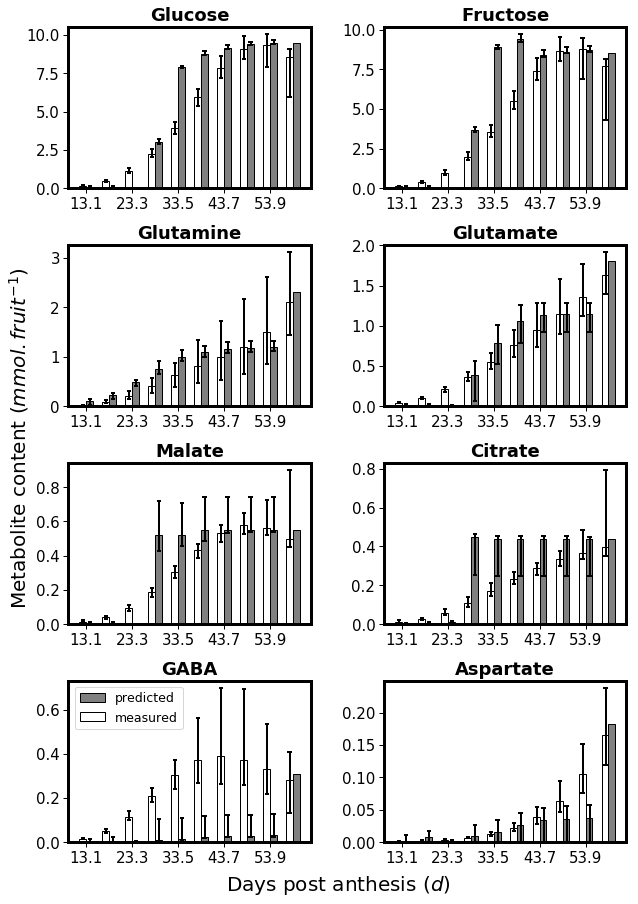

In [89]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
#titledict = {"GLC":"Glucose","FRU":"Fructose","SUCROSE":"Sucrose","MAL":"Malate","CIT":"Citrate","GLN":"Glutamine","GLT":"Glutamate","4_AMINO_BUTYRATE":"GABA","L_ASPARTATE":"Aspartate"}
titledict = {"GLC":"Glucose","FRU":"Fructose","MAL":"Malate","CIT":"Citrate","GLN":"Glutamine","GLT":"Glutamate","4_AMINO_BUTYRATE":"GABA","L_ASPARTATE":"Aspartate"}
import string
alphabets = list(string.ascii_lowercase)

i=0
for met in ["GLC","FRU","GLN","GLT","MAL","CIT","4_AMINO_BUTYRATE","L_ASPARTATE"]:
    row = int(round(i/2))
    col = int(round(i%2))
    #print met
    #print str(i)+"-"+str(row)+"-"+str(col)
    ax = axes[row,col]
    if met=="STARCH":
        ax.bar(xlist,metdict[met],width=barwidth,color="grey",zorder=-1,label="predicted")
    else:
        ax.bar(xlist,metdict[met],width=barwidth,color="grey",edgecolor="black",zorder=-1,label="predicted")
    #xlist3 = [k for k in xlist]
    #ax.bar(xlist3,maxdict[met],width=1,color="black",zorder=-1,edgecolor="black",label="FVA range")
    #ax.bar(xlist3,mindict[met],width=1,color="grey",zorder=1,edgecolor="grey")
    offset2 = 0
    if col == 1:
        offset2 = 1
    for k in range(0,len(xlist)):
        ax.plot([xlist[k]+offset2,xlist[k]+offset2],[maxdict[met][k],mindict[met][k]],color="black",linewidth=2)
        ax.plot([xlist[k]+(float(offset2)/2)-1,xlist[k]+(float(offset2)/2)+1],[mindict[met][k],mindict[met][k]],color="black",linewidth=2)
        ax.plot([xlist[k]+(float(offset2)/2)-1,xlist[k]+(float(offset2)/2)+1],[maxdict[met][k],maxdict[met][k]],color="black",linewidth=2)
    ax.bar(xlist2,Conc[met][1:],width=barwidth,color="white",edgecolor="black",zorder=1,label="measured")
    for k in range(0,len(xlist2)):
        ax.plot([xlist2[k]+offset2,xlist2[k]+offset2],[Conc_max[met][1:][k],Conc_min[met][1:][k]],color="black",linewidth=2)
        ax.plot([xlist2[k]+(float(offset2)/2)-1,xlist2[k]+(float(offset2)/2)+1],[Conc_max[met][1:][k],Conc_max[met][1:][k]],color="black",linewidth=2)
        ax.plot([xlist2[k]+(float(offset2)/2)-1,xlist2[k]+(float(offset2)/2)+1],[Conc_min[met][1:][k],Conc_min[met][1:][k]],color="black",linewidth=2)
    ax.set_title(titledict[met],fontweight="bold")
    offset = float(barwidth)/2
    ax.set_xticks([round(xlist[0]-offset,2),round(xlist[2]-offset,2),round(xlist[4]-offset,2),round(xlist[6]-offset,2),round(xlist[8]-offset,2)])
    ax.set_xticklabels([DPA[1],DPA[3],DPA[5],DPA[7],DPA[9]])
    #ax.set_xlabel("("+alphabets[i]+")")
    #ax.set_ylabel("mmol/fruit")
    if met == "4_AMINO_BUTYRATE":
        ax.legend(loc="upper left",fontsize = 12.5)
        #ax.legend(bbox_to_anchor=(1.25, 1.03),fontsize=15)
    i=i+1
for j in range(i,8):
    row = int(round(j/2))
    col = int(round(j%2))
    ax = axes[row,col]
    ax.set_visible(False)
plt.subplots_adjust(wspace = 0.3,hspace=0.35)
fig.text(0.5, 0.08, 'Days post anthesis ($d$)', ha='center', fontsize=20)
fig.text(0.04, 0.5, 'Metabolite content ($mmol.fruit^{-1}$)', va='center', rotation='vertical', fontsize=20)
plt.savefig("SubValidation.png")


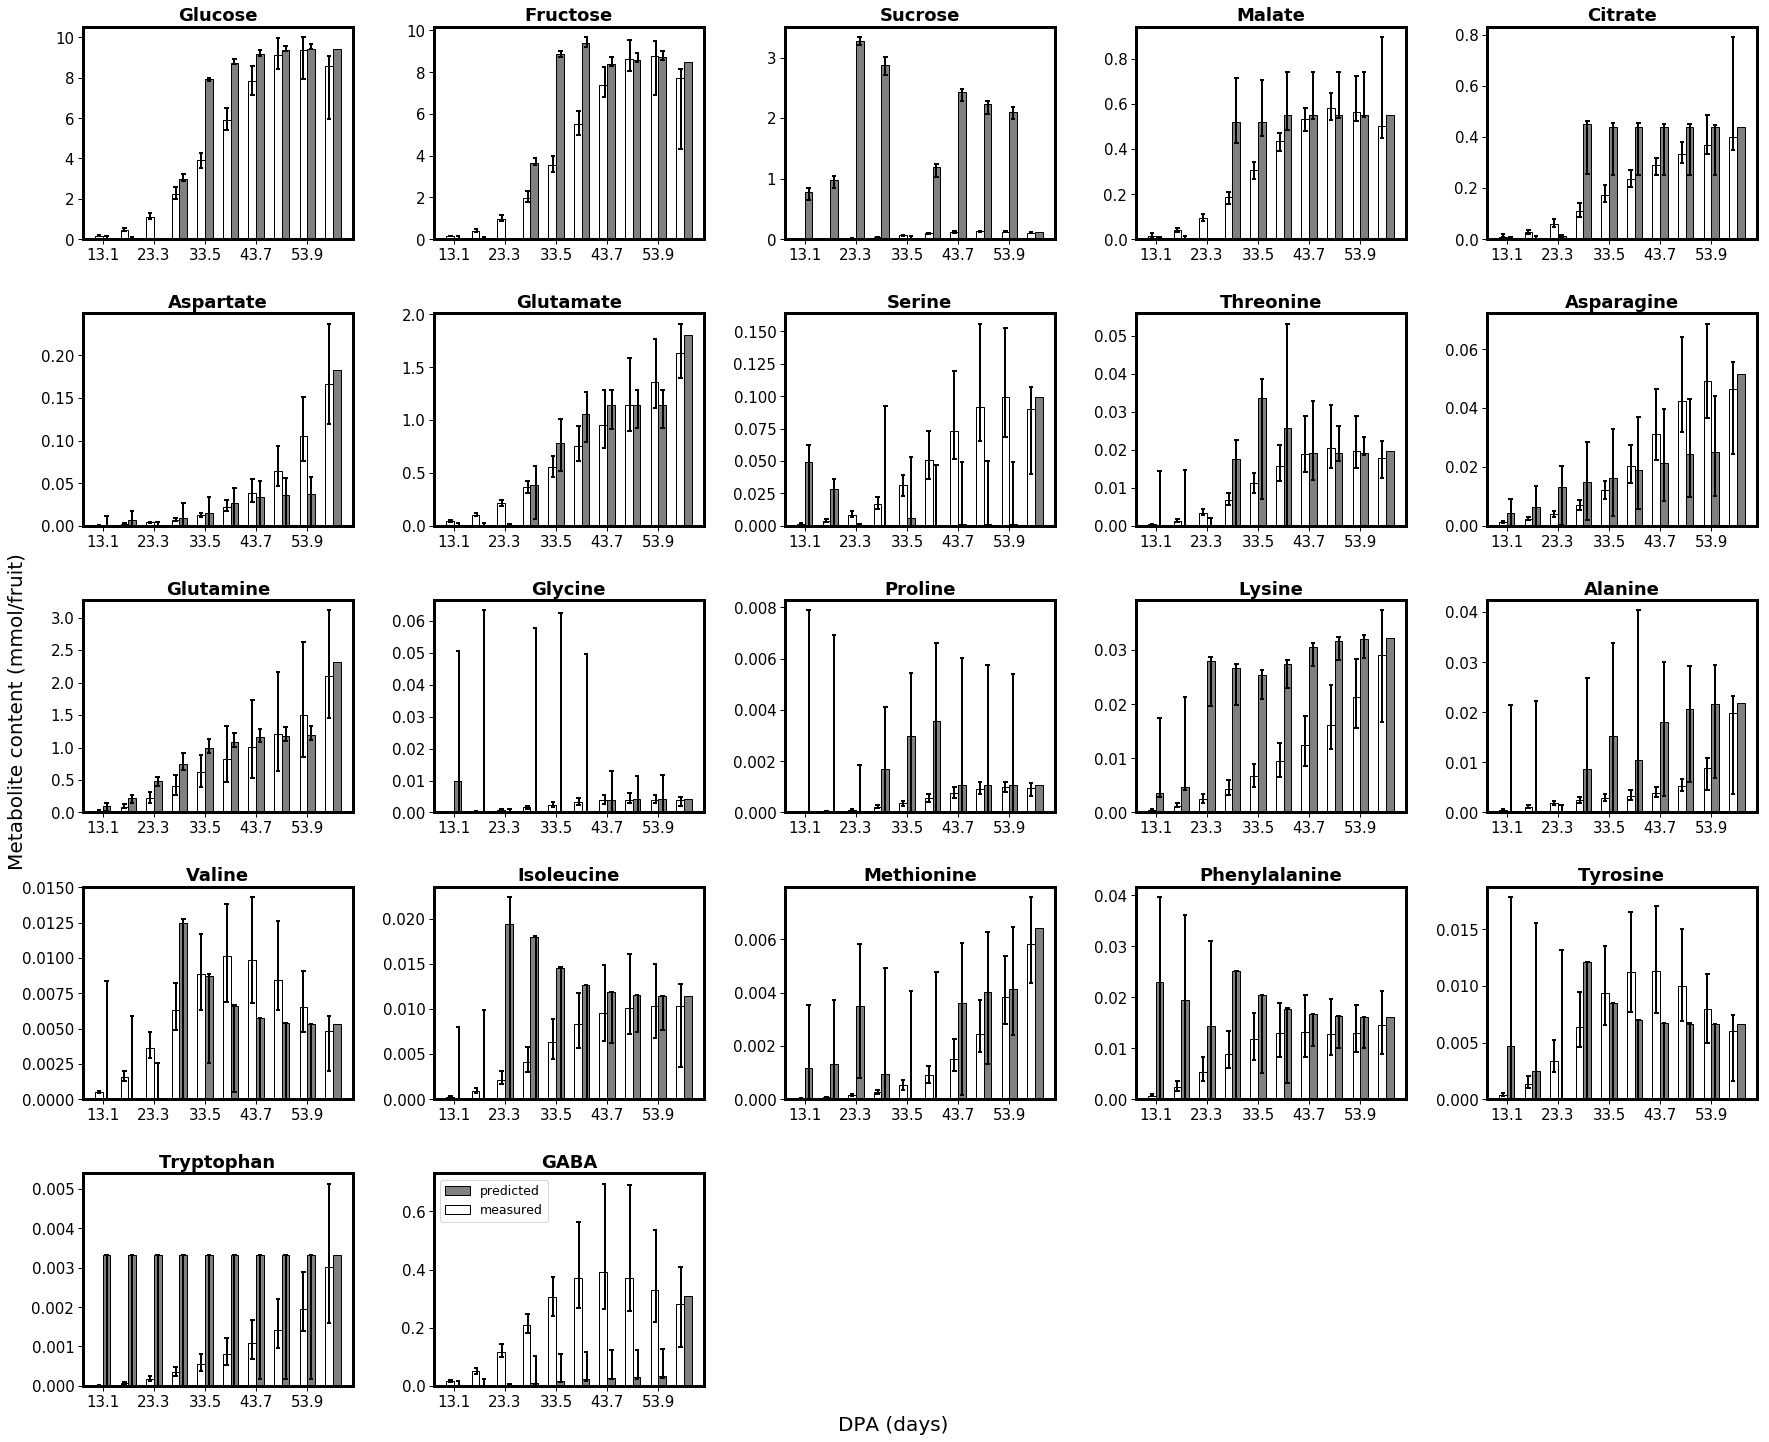

In [90]:
xlist3 = list()
for x in xlist:
    xlist3.append(x-7)

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

fig, axes = plt.subplots(nrows=5,ncols=5,figsize=(30,25))
titledict = {"GLC":"Glucose","FRU":"Fructose","SUCROSE":"Sucrose","MAL":"Malate","CIT":"Citrate","GLN":"Glutamine","GLT":"Glutamate","4_AMINO_BUTYRATE":"GABA","L_ASPARTATE":"Aspartate","SER":"Serine","THR":"Threonine","ASN":"Asparagine","GLY":"Glycine","PRO":"Proline","LYS":"Lysine","L_ALPHA_ALANINE":"Alanine","VAL":"Valine","ILE":"Isoleucine","MET":"Methionine","PHE":"Phenylalanine","TYR":"Tyrosine","TRP":"Tryptophan"}
import string
alphabets = list(string.ascii_lowercase)

i=0
for met in ["GLC","FRU","SUCROSE","MAL","CIT","L_ASPARTATE","GLT","SER","THR","ASN","GLN","GLY","PRO","LYS","L_ALPHA_ALANINE","VAL","ILE","MET","PHE","TYR","TRP","4_AMINO_BUTYRATE"]:
    row = int(round(i/5))
    col = int(round(i%5))
    #print met
    #print str(i)+"-"+str(row)+"-"+str(col)
    ax = axes[row,col]
    if met=="STARCH":
        ax.bar(xlist,metdict[met],width=barwidth,color="grey",zorder=-1,label="predicted")
    else:
        ax.bar(xlist,metdict[met],width=barwidth,color="grey",edgecolor="black",zorder=-1,label="predicted")
    #xlist3 = [k for k in xlist]
    #ax.bar(xlist3,maxdict[met],width=1,color="black",zorder=-1,edgecolor="black",label="FVA range")
    #ax.bar(xlist3,mindict[met],width=1,color="grey",zorder=1,edgecolor="grey")
    offset2 = 0
    if col == 1:
        offset2 = 1
    for k in range(0,len(xlist)):
        ax.plot([xlist[k]+offset2,xlist[k]+offset2],[maxdict[met][k],mindict[met][k]],color="black",linewidth=2)
        ax.plot([xlist[k]+(float(offset2)/2)-1,xlist[k]+(float(offset2)/2)+1],[mindict[met][k],mindict[met][k]],color="black",linewidth=2)
        ax.plot([xlist[k]+(float(offset2)/2)-1,xlist[k]+(float(offset2)/2)+1],[maxdict[met][k],maxdict[met][k]],color="black",linewidth=2)
    ax.bar(xlist2,Conc[met][1:],width=barwidth,color="white",edgecolor="black",zorder=1,label="measured")
    for k in range(0,len(xlist2)):
        ax.plot([xlist2[k]+offset2,xlist2[k]+offset2],[Conc_max[met][1:][k],Conc_min[met][1:][k]],color="black",linewidth=2)
        ax.plot([xlist2[k]+(float(offset2)/2)-1,xlist2[k]+(float(offset2)/2)+1],[Conc_max[met][1:][k],Conc_max[met][1:][k]],color="black",linewidth=2)
        ax.plot([xlist2[k]+(float(offset2)/2)-1,xlist2[k]+(float(offset2)/2)+1],[Conc_min[met][1:][k],Conc_min[met][1:][k]],color="black",linewidth=2)
    ax.set_title(titledict[met],fontweight="bold")
    offset = float(barwidth)/2
    ax.set_xticks([round(xlist[0]-offset,2),round(xlist[2]-offset,2),round(xlist[4]-offset,2),round(xlist[6]-offset,2),round(xlist[8]-offset,2)])
    ax.set_xticklabels([DPA[1],DPA[3],DPA[5],DPA[7],DPA[9]])
    #ax.set_xlabel("("+alphabets[i]+")")
    #ax.set_ylabel("mmol/fruit")
    if met == "4_AMINO_BUTYRATE":
        ax.legend(loc="upper left",fontsize = 12.5)
        #ax.legend(bbox_to_anchor=(1.25, 1.03),fontsize=15)
    i=i+1
for j in range(i,25):
    row = int(round(j/5))
    col = int(round(j%5))
    ax = axes[row,col]
    ax.set_visible(False)
plt.subplots_adjust(wspace = 0.3,hspace=0.35)
fig.text(0.5, 0.1, 'DPA (days)', ha='center', fontsize=20)
fig.text(0.09, 0.5, 'Metabolite content (mmol/fruit)', va='center', rotation='vertical', fontsize=20)
plt.savefig("SubValidation.png")
plt.legend()
plt.show()

### Numbers of osmoles vs biomass

In [149]:
import pandas
df = pandas.read_csv("/home/sanu/JoseConc_301118.csv",delimiter="\t")
DPA = list(df.DPA)
from functions3 import *


xlist = list()
ylist = list()
ylist2= list()
ylist3= list()
ylist4= list()
ylist5= list()
for i in range(1,10):
    xlist.append(i)
    ylist.append(celluloseLevels(DPA[i],Ncells = 25*(10**6)) * 180.16)
    ylist2.append(phospholipidLevels(DPA[i],Ncells = 25*(10**6),scaling_factor=100.0/8.512820512820287)*689.978637415773)
    ylist3.append(estimateProteinContent(DPA[i],ProtConc=21458.1747597,Ncell = 25*(10**6)) * 461.181100469)
    temp = 0
    temp2=0
    if i == 1:
        TEMP=0
        for rxn in cobra_model2.reactions.query("Initial"):
            for met in rxn.products:
                if not("CC" in met.id or "VC" in met.id or "CO" in met.id or "VO" in met.id or "PROTON" in met.id):
                    TEMP=TEMP+(met.formula_weight*solution2.x_dict.get(rxn.id))
    for rxn in cobra_model2.reactions.query("Transfer"+str(i)+str(i+1)):
        for met in rxn.reactants:
            if not("CC" in met.id or "VC" in met.id or "CO" in met.id or "VO" in met.id or "PROTON" in met.id):
                temp=temp+(met.formula_weight*solution2.x_dict.get(rxn.id))
                #print met.id+"\t"+str((met.formula_weight*solution2.x_dict.get(rxn.id)))
    #print temp
    #print TEMP
    ylist4.append(temp)
    TEMP=temp
    if i == 1:
        TEMP2 = solution2.x_dict.get("Initial_STARCH_tx")*cobra_model2.metabolites.STARCH_p1.formula_weight
    temp2 = solution2.x_dict.get("STARCH_p_Transfer"+str(i)+str(i+1))*cobra_model2.metabolites.STARCH_p1.formula_weight
    ylist5.append(temp2)
    TEMP2 = temp2
    

ylist6=list()
for i in range(0,len(ylist5)):
    ylist6.append(ylist[i]+ylist2[i]+ylist3[i]+ylist4[i]+ylist5[i])
    print ylist6

[992.9161759803762]
[992.9161759803762, 2122.4029604509747]
[992.9161759803762, 2122.4029604509747, 4344.49097171215]
[992.9161759803762, 2122.4029604509747, 4344.49097171215, 5200.430961100186]
[992.9161759803762, 2122.4029604509747, 4344.49097171215, 5200.430961100186, 5754.638599876495]
[992.9161759803762, 2122.4029604509747, 4344.49097171215, 5200.430961100186, 5754.638599876495, 6256.571235551889]
[992.9161759803762, 2122.4029604509747, 4344.49097171215, 5200.430961100186, 5754.638599876495, 6256.571235551889, 6667.6016971534555]
[992.9161759803762, 2122.4029604509747, 4344.49097171215, 5200.430961100186, 5754.638599876495, 6256.571235551889, 6667.6016971534555, 6638.426076757757]
[992.9161759803762, 2122.4029604509747, 4344.49097171215, 5200.430961100186, 5754.638599876495, 6256.571235551889, 6667.6016971534555, 6638.426076757757, 6345.329285080086]


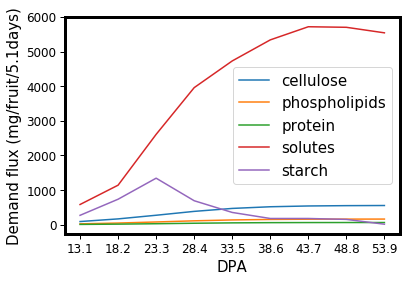

In [150]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

plt.xlabel("DPA")
plt.xticks(xlist,DPA[1:],fontsize=12)
plt.ylabel("Demand flux (mg/fruit/5.1days)")
plt.yticks(fontsize=12)
plt.plot(xlist,ylist,label="cellulose")
plt.plot(xlist,ylist2,label="phospholipids")
plt.plot(xlist,ylist3,label="protein")
plt.plot(xlist,ylist4,label="solutes")
plt.plot(xlist,ylist5,label="starch")
plt.legend(loc="best")

In [151]:
import pandas as pd
df3 = pd.DataFrame(data={"Phase":xlist,"cellulose":ylist,"phospholipids":ylist2,"protein":ylist3,"starch":ylist5,"solutes":ylist4,"total":ylist6})
df3

,Phase,cellulose,phospholipids,protein,solutes,starch,total
0,1,94.226241,27.939999,11.268824,585.881044,273.600068,992.916176
1,2,170.620394,50.634839,19.311164,1143.525460,738.311103,2122.402960
2,3,275.767896,81.881697,31.300670,2610.090982,1345.449726,4344.490972
3,4,387.488764,115.088436,45.143915,3958.056610,694.653235,5200.430961
4,5,472.679631,140.412413,56.103907,4728.608151,356.834497,5754.638600
5,6,520.922931,154.754066,62.174225,5336.167875,182.552138,6256.571236
6,7,543.440581,161.448221,64.789131,5715.371626,182.552138,6667.601697
7,8,552.962310,164.278916,65.748686,5699.335853,156.100312,6638.426077
8,9,556.816243,165.424648,66.057177,5539.751196,17.280021,6345.329285


In [152]:
y2list = list()
y2list2 = list()
y2list3 = list()
y2list4 = list()
y2list5 = list()
y2list6 = list()
for i in range(0,len(ylist)):
    y2list.append(round(100*ylist[i]/ylist6[i],2))
    y2list2.append(round(100*ylist2[i]/ylist6[i],2))
    y2list3.append(round(100*ylist3[i]/ylist6[i],2))
    y2list4.append(round(100*ylist4[i]/ylist6[i],2))
    y2list5.append(round(100*ylist5[i]/ylist6[i],2))

df4 = pd.DataFrame(data={"Phase":xlist,"cellulose":y2list,"phospholipids":y2list2,"protein":y2list3,"starch":y2list5,"solutes":y2list4,"total":ylist6})
df4

,Phase,cellulose,phospholipids,protein,solutes,starch,total
0,1,9.49,2.81,1.13,59.01,27.56,992.916176
1,2,8.04,2.39,0.91,53.88,34.79,2122.402960
2,3,6.35,1.88,0.72,60.08,30.97,4344.490972
3,4,7.45,2.21,0.87,76.11,13.36,5200.430961
4,5,8.21,2.44,0.97,82.17,6.20,5754.638600
5,6,8.33,2.47,0.99,85.29,2.92,6256.571236
6,7,8.15,2.42,0.97,85.72,2.74,6667.601697
7,8,8.33,2.47,0.99,85.85,2.35,6638.426077
8,9,8.78,2.61,1.04,87.30,0.27,6345.329285


In [138]:
len(xlist)

9

#### Plot sucrose, starch in default, no phloem and no starch accumulation

In [68]:
#Function to perform FVA analysis which maintains sum of fluxes at a minimal val-
#ue
#args: 1) a cobra model 2) Objective 3) reaction to avoid when constraining sum
#of fluxes 4) reaction list for FVA 5) solver used to perform FVA
#output: a cobra model with FVA as an attribute called fva
def FBA_FVA_run(cobra_model,obj,rxn2avoid = [],rxnlist=[],solver="",weightings={}):
  from cobra import flux_analysis

  if len(weightings)>0:
    weightings_submittied=True
  else:
    weightings_submittied=False

  if len(rxnlist)==0:
    rxnlist = cobra_model.reactions
  for rxn in cobra_model.reactions:
    if not rxn.id in weightings.keys():
      weightings[rxn.id]=1
      if weightings_submittied:
          print("Warning")
          print rxn.id
          return
  print("Runing pFBA")
  solution = pfba_Weighted(cobra_model,weightings)
  objvalue = solution.x_dict.get(obj.id)
  a = 0
  for i in cobra_model.reactions:
    a = a + abs(solution.x_dict.get(i.id)*weightings[i.id])

  sumOfFluxes = a

  cobra_model2 = cobra_model.copy()
  irr_model = rev2irrev(cobra_model2)
  print("Setting SOF model")
  sfmodel = constrainSumOfFluxes(irr_model,rxn2avoid,sumOfFluxes,objvalue,weightings)
  rxnlist2 = list()
  if rxnlist == cobra_model.reactions:
    rxnlist2 = sfmodel.reactions
  else:
    for rxn in rxnlist:
      if rxn.lower_bound<0 and rxn.upper_bound>0:
        rxnlist2.append(sfmodel.reactions.get_by_id(rxn.id+"_reverse"))
      rxnlist2.append(sfmodel.reactions.get_by_id(rxn.id))
  #print("Rxn list ="+str(rxnlist2))
  print("Running FVA")

  if solver != "":
    import optlang
    if optlang.available_solvers.keys().__contains__(solver) and optlang.available_solvers[solver]:
      sfmodel.solver=solver
    else:
      print("Requested solver "+solver+" not available, using current model solver...")
  fva = flux_analysis.flux_variability_analysis(sfmodel,reaction_list = rxnlist2)
  print("Processing results")

  fva2=dict()
  for mode in fva.keys():
    if mode == "maximum":
      tempdict = dict()
      FVArxnSet = set()
      for rxn in fva[mode].keys():
        if rxn.__contains__("_reverse"):
          rxn = rxn.replace("_reverse","")
        if FVArxnSet.__contains__(rxn):
          continue
        FVArxnSet.add(rxn)
        if not fva[mode].keys().__contains__(rxn+"_reverse"):
          maxi = fva[mode][rxn]
        else:
          maxi = fva[mode][rxn]+fva[mode][rxn+"_reverse"]
        tempdict[rxn]=maxi
    else:
      tempdict=dict()
      FVArxnSet = set()
      for rxn in fva[mode].keys():
        if rxn.__contains__("_reverse"):
          rxn = rxn.replace("_reverse","")
        if FVArxnSet.__contains__(rxn):
          continue
        FVArxnSet.add(rxn)
        if not fva[mode].keys().__contains__(rxn+"_reverse"):
          mini = fva[mode][rxn]
        else:
          mini = fva[mode][rxn]+fva[mode][rxn+"_reverse"]
        tempdict[rxn]=mini
    fva2[mode]=tempdict

  sfmodel.fva = fva
  cobra_model.fva = fva2
  cobra_model.solution = solution
  return cobra_model


In [69]:


rxnlist= list()
for i in range(2,11):
    for met in ["STARCH_p_Transfer"]:
        rxnlist.append(cobra_model2.reactions.get_by_id(met+str(i-1)+str(i)))
for i in range(1,10):
    for rxn in ["Phloem_uptake_tx","SUCROSE_signal","GLC_signal","FRU_signal"]:
        rxnlist.append(cobra_model2.reactions.get_by_id(rxn+str(i)))

        

cobra_model3 = cobra_model2.copy()

for i in range(1,11):
    cobra_model3.reactions.get_by_id("Phloem_uptake_tx"+str(i)).lower_bound = 0
    cobra_model3.reactions.get_by_id("Phloem_uptake_tx"+str(i)).upper_bound = 1000

temp_solution = pfba_Weighted(cobra_model3,weightings)       


rxnlist2= list()
for i in range(2,11):
    for met in ["STARCH_p_Transfer"]:
        rxnlist2.append(cobra_model3.reactions.get_by_id(met+str(i-1)+str(i)))
for i in range(1,10):
    for rxn in ["Phloem_uptake_tx","SUCROSE_signal","GLC_signal","FRU_signal"]:
        rxnlist2.append(cobra_model3.reactions.get_by_id(rxn+str(i)))
        

cobra_model4 = cobra_model2.copy()

for i in range(1,10):
    cobra_model4.reactions.get_by_id("STARCH_p_Transfer"+str(i)+str(i+1)).lower_bound = 0
    cobra_model4.reactions.get_by_id("STARCH_p_Transfer"+str(i)+str(i+1)).upper_bound = 0

temp_solution2 = pfba_Weighted(cobra_model4,weightings)       


rxnlist3= list()
for i in range(2,11):
    for met in ["STARCH_p_Transfer"]:
        rxnlist3.append(cobra_model4.reactions.get_by_id(met+str(i-1)+str(i)))
for i in range(1,10):
    for rxn in ["Phloem_uptake_tx","SUCROSE_signal","GLC_signal","FRU_signal"]:
        rxnlist3.append(cobra_model4.reactions.get_by_id(rxn+str(i)))        

        
import time
print(time.ctime())
cobra_model6 = FBA_FVA_run(cobra_model2,cobra_model2.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist, weightings=weightings)
cobra_model7 = FBA_FVA_run(cobra_model3,cobra_model3.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist2, weightings=weightings)
cobra_model8 = FBA_FVA_run(cobra_model4,cobra_model4.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist3, weightings=weightings)
print(time.ctime())

Mon Jul  1 17:16:11 2019
Runing pFBA
Setting SOF model
Running FVA
Processing results
Runing pFBA
Setting SOF model
Running FVA
Processing results
Runing pFBA
Setting SOF model
Running FVA
Processing results
Mon Jul  1 17:19:57 2019


In [70]:

import numpy as np
#Day time points of interest
DAA = list(np.linspace(8,59,11))

mets = ("STARCH",)
dfile="/home/sanu/JoseData_starch_protein_150818.csv"
Nsampl= 1000
Ssampl= 0.80

C_Jose = dict()
C_max_Jose = dict()
C_min_Jose = dict()
F_max = dict()
F_min = dict()

for met in mets:
  print "Processing "+met+"..."
  [C_Jose[met],C_max_Jose[met],C_min_Jose[met],F_max[met],F_min[met]]=generateBoundsFromBiomass(datafile = dfile,met=met,Nsampling=Nsampl,DPA=DAA,show_plots=False,degree=3,Ssampling=Ssampl,start=8,stop=59)



Processing STARCH...


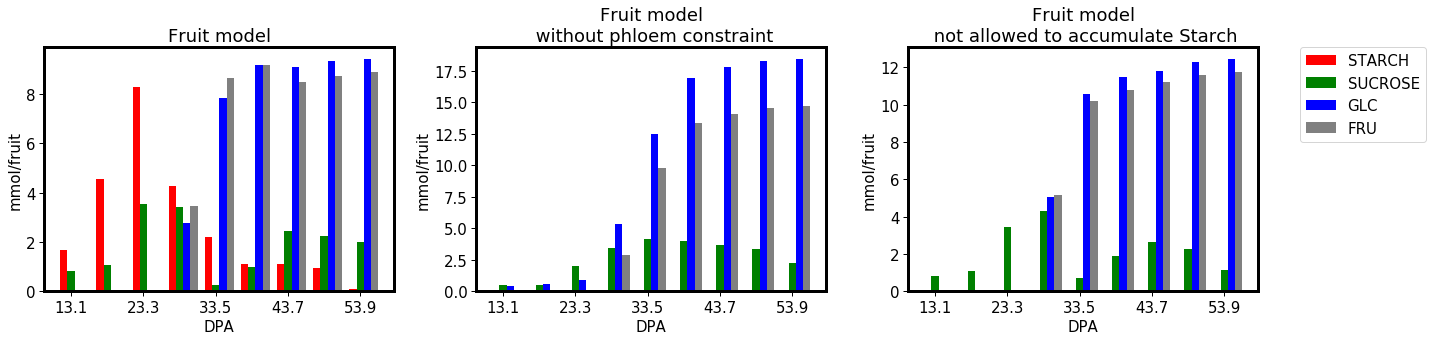

In [73]:


#Jose_DPA = [8,15,22,28,34,42,50,52,59]
#Jose_starch = [9.0539513774,4.1308866276,7.8203408555,8.7332100536,1.743502075,1.3747884634,0.4534968692,1.254839219,0.3806682616]
#Jose_starch = [0.0090539514,0.0041308866,0.0078203409,0.0087332101,0.0017435021,0.0013747885,0.0004534969,0.0012548392,0.0003806683]

import pandas as pd
df = pd.read_csv("/home/sanu/JoseData_starch_protein_150818.csv",sep="\t")

#temp=list()
#for i in range(0,len(df["STARCH"])):
#    temp.append(df["STARCH"][i]*10)
#df["STARCH_2"]=temp

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))


ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
templist = list()
templistB = list()
templist2 = list()
templist2B = list()
templist3 = list()
templist3B = list()
templistC = list()
templistD = list()
templist2C = list()
templist2D = list()
templist3C = list()
templist3D = list()
xlist = list()
xlist2 = list()
xlist3 = list()
xlist4 = list()
xlist5 = list()
error_min = list()
error_max = list()
error_minB = list()
error_maxB = list()
error_min2 = list()
error_max2 = list()
error_min2B = list()
error_max2B = list()
error_min3 = list()
error_max3 = list()
error_min3B = list()
error_max3B = list()
error_minC = list()
error_maxC = list()
error_minD = list()
error_maxD = list()
error_min2C = list()
error_max2C = list()
error_min2D = list()
error_max2D = list()
error_min3C = list()
error_max3C = list()
error_min3D = list()
error_max3D = list()
for i in range(1,10):
    xlist.append(i*10)
    xlist2.append(i*10+2)
    xlist3.append(i*10+4)
    xlist4.append(i*10+6)
    templist.append(cobra_model6.solution.x_dict["STARCH_p_Transfer"+str(i)+str(i+1)])
    templistB.append(cobra_model6.solution.x_dict["SUCROSE_v_Transfer"+str(i)+str(i+1)]+solution2.x_dict["SUCROSE_c_Transfer"+str(i)+str(i+1)])
    templistC.append(cobra_model6.solution.x_dict["GLC_v_Transfer"+str(i)+str(i+1)]+solution2.x_dict["GLC_c_Transfer"+str(i)+str(i+1)])
    templistD.append(cobra_model6.solution.x_dict["FRU_v_Transfer"+str(i)+str(i+1)]+solution2.x_dict["FRU_c_Transfer"+str(i)+str(i+1)])
    templist2.append(cobra_model7.solution.x_dict["STARCH_p_Transfer"+str(i)+str(i+1)])
    templist2B.append(cobra_model7.solution.x_dict["SUCROSE_v_Transfer"+str(i)+str(i+1)]+temp_solution.x_dict["SUCROSE_c_Transfer"+str(i)+str(i+1)])
    templist2C.append(cobra_model7.solution.x_dict["GLC_v_Transfer"+str(i)+str(i+1)]+temp_solution.x_dict["GLC_v_Transfer"+str(i)+str(i+1)])
    templist2D.append(cobra_model7.solution.x_dict["FRU_v_Transfer"+str(i)+str(i+1)]+temp_solution.x_dict["FRU_v_Transfer"+str(i)+str(i+1)])
    templist3.append(cobra_model8.solution.x_dict["STARCH_p_Transfer"+str(i)+str(i+1)])
    templist3B.append(cobra_model8.solution.x_dict["SUCROSE_v_Transfer"+str(i)+str(i+1)]+temp_solution2.x_dict["SUCROSE_c_Transfer"+str(i)+str(i+1)])
    templist3C.append(cobra_model8.solution.x_dict["GLC_v_Transfer"+str(i)+str(i+1)]+temp_solution2.x_dict["GLC_v_Transfer"+str(i)+str(i+1)])
    templist3D.append(cobra_model8.solution.x_dict["FRU_v_Transfer"+str(i)+str(i+1)]+temp_solution2.x_dict["FRU_v_Transfer"+str(i)+str(i+1)])
    error_max.append(cobra_model6.fva.get("maximum").get("STARCH_p_Transfer"+str(i)+str(i+1)))
    error_min.append(cobra_model6.fva.get("minimum").get("STARCH_p_Transfer"+str(i)+str(i+1)))
    error_max2.append(cobra_model7.fva.get("maximum").get("STARCH_p_Transfer"+str(i)+str(i+1)))
    error_min2.append(cobra_model7.fva.get("minimum").get("STARCH_p_Transfer"+str(i)+str(i+1)))
    error_max3.append(cobra_model8.fva.get("maximum").get("STARCH_p_Transfer"+str(i)+str(i+1)))
    error_min3.append(cobra_model8.fva.get("minimum").get("STARCH_p_Transfer"+str(i)+str(i+1)))
    error_maxB.append(cobra_model6.fva.get("maximum").get("SUCROSE_signal"+str(i)))
    error_minB.append(cobra_model6.fva.get("minimum").get("SUCROSE_signal"+str(i)))
    error_max2B.append(cobra_model7.fva.get("maximum").get("SUCROSE_signal"+str(i)))
    error_min2B.append(cobra_model7.fva.get("minimum").get("SUCROSE_signal"+str(i)))
    error_max3B.append(cobra_model8.fva.get("maximum").get("SUCROSE_signal"+str(i)))
    error_min3B.append(cobra_model8.fva.get("minimum").get("SUCROSE_signal"+str(i)))
    error_maxC.append(cobra_model6.fva.get("maximum").get("GLC_signal"+str(i)))
    error_minC.append(cobra_model6.fva.get("minimum").get("GLC_signal"+str(i)))
    error_max2C.append(cobra_model7.fva.get("maximum").get("GLC_signal"+str(i)))
    error_min2C.append(cobra_model7.fva.get("minimum").get("GLC_signal"+str(i)))
    error_max3C.append(cobra_model8.fva.get("maximum").get("GLC_signal"+str(i)))
    error_min3C.append(cobra_model8.fva.get("minimum").get("GLC_signal"+str(i)))
    error_maxD.append(cobra_model6.fva.get("maximum").get("FRU_signal"+str(i)))
    error_minD.append(cobra_model6.fva.get("minimum").get("FRU_signal"+str(i)))
    error_max2D.append(cobra_model7.fva.get("maximum").get("FRU_signal"+str(i)))
    error_min2D.append(cobra_model7.fva.get("minimum").get("FRU_signal"+str(i)))
    error_max3D.append(cobra_model8.fva.get("maximum").get("FRU_signal"+str(i)))
    error_min3D.append(cobra_model8.fva.get("minimum").get("FRU_signal"+str(i)))
ax1.bar(xlist,templist,width=2,color="red",zorder=-1,label="STARCH")
#ax1.plot([xlist,xlist],[error_max,error_min],color="black",linewidth=2)
tempxlist1 = list()
tempxlist2 = list()
for x in xlist:
    tempxlist1.append(x+0.5)
    tempxlist2.append(x-0.5)
#ax1.plot([tempxlist1,tempxlist2],[error_min,error_min],color="black",linewidth=2)
#ax1.plot([tempxlist1,tempxlist2],[error_max,error_max],color="black",linewidth=2)

ax1.bar(xlist2,templistB,width=2,color="green",zorder=-1,label="SUCROSE")
#ax1.plot([xlist2,xlist2],[error_maxB,error_minB],color="black",linewidth=2)
tempxlist1 = list()
tempxlist2 = list()
for x in xlist2:
    tempxlist1.append(x+0.5)
    tempxlist2.append(x-0.5)
#ax1.plot([tempxlist1,tempxlist2],[error_minB,error_minB],color="black",linewidth=2)
#ax1.plot([tempxlist1,tempxlist2],[error_maxB,error_maxB],color="black",linewidth=2)

ax1.bar(xlist3,templistC,width=2,color="blue",zorder=-1,label="GLC")
#ax1.plot([xlist3,xlist3],[error_maxC,error_minC],color="black",linewidth=2)
tempxlist1 = list()
tempxlist2 = list()
for x in xlist3:
    tempxlist1.append(x+0.5)
    tempxlist2.append(x-0.5)
#ax1.plot([tempxlist1,tempxlist2],[error_minC,error_minC],color="black",linewidth=2)
#ax1.plot([tempxlist1,tempxlist2],[error_maxC,error_maxC],color="black",linewidth=2)

ax1.bar(xlist4,templistD,width=2,color="grey",zorder=-1,label="FRU")
#ax1.plot([xlist4,xlist4],[error_maxD,error_minD],color="black",linewidth=2)
tempxlist1 = list()
tempxlist2 = list()
for x in xlist4:
    tempxlist1.append(x+0.5)
    tempxlist2.append(x-0.5)
#ax1.plot([tempxlist1,tempxlist2],[error_minD,error_minD],color="black",linewidth=2)
#ax1.plot([tempxlist1,tempxlist2],[error_maxD,error_maxD],color="black",linewidth=2)

ax2.bar(xlist,templist2,width=2,color="red",zorder=-1,label="STARCH")
#ax2.plot([xlist,xlist],[error_max2,error_min2],color="black",linewidth=2)
tempxlist1 = list()
tempxlist2 = list()
for x in xlist:
    tempxlist1.append(x+0.5)
    tempxlist2.append(x-0.5)
#ax2.plot([tempxlist1,tempxlist2],[error_min2,error_min2],color="black",linewidth=2)
#ax2.plot([tempxlist1,tempxlist2],[error_max2,error_max2],color="black",linewidth=2)

ax2.bar(xlist2,templist2B,width=2,color="green",zorder=-1,label="SUCROSE")
#ax2.plot([xlist2,xlist2],[error_max2B,error_min2B],color="black",linewidth=2)
tempxlist1 = list()
tempxlist2 = list()
for x in xlist2:
    tempxlist1.append(x+0.5)
    tempxlist2.append(x-0.5)
#ax2.plot([tempxlist1,tempxlist2],[error_min2B,error_min2B],color="black",linewidth=2)
#ax2.plot([tempxlist1,tempxlist2],[error_max2B,error_max2B],color="black",linewidth=2)


ax2.bar(xlist3,templist2C,width=2,color="blue",zorder=-1,label="GLC")
#ax2.plot([xlist3,xlist3],[error_max2C,error_min2C],color="black",linewidth=2)
tempxlist1 = list()
tempxlist2 = list()
for x in xlist3:
    tempxlist1.append(x+0.5)
    tempxlist2.append(x-0.5)
#ax2.plot([tempxlist1,tempxlist2],[error_min2C,error_min2C],color="black",linewidth=2)
#ax2.plot([tempxlist1,tempxlist2],[error_max2C,error_max2C],color="black",linewidth=2)

ax2.bar(xlist4,templist2D,width=2,color="grey",zorder=-1,label="FRU")
#ax2.plot([xlist4,xlist4],[error_max2D,error_min2D],color="black",linewidth=2)
tempxlist1 = list()
tempxlist2 = list()
for x in xlist4:
    tempxlist1.append(x+0.5)
    tempxlist2.append(x-0.5)
#ax2.plot([tempxlist1,tempxlist2],[error_min2D,error_min2D],color="black",linewidth=2)
#ax2.plot([tempxlist1,tempxlist2],[error_max2D,error_max2D],color="black",linewidth=2)

ax3.bar(xlist,templist3,width=2,color="red",zorder=-1,label="STARCH")
#ax3.plot([xlist,xlist],[error_max3,error_min3],color="black",linewidth=2)
tempxlist1 = list()
tempxlist2 = list()
for x in xlist:
    tempxlist1.append(x+0.5)
    tempxlist2.append(x-0.5)
#ax3.plot([tempxlist1,tempxlist2],[error_min3,error_min3],color="black",linewidth=2)
#ax3.plot([tempxlist1,tempxlist2],[error_max3,error_max3],color="black",linewidth=2)

ax3.bar(xlist2,templist3B,width=2,color="green",zorder=-1,label="SUCROSE")
#ax3.plot([xlist2,xlist2],[error_max3B,error_min3B],color="black",linewidth=2)
tempxlist1 = list()
tempxlist2 = list()
for x in xlist2:
    tempxlist1.append(x+0.5)
    tempxlist2.append(x-0.5)
#ax3.plot([tempxlist1,tempxlist2],[error_min3B,error_min3B],color="black",linewidth=2)
#ax3.plot([tempxlist1,tempxlist2],[error_max3B,error_max3B],color="black",linewidth=2)


ax3.bar(xlist3,templist3C,width=2,color="blue",zorder=-1,label="GLC")
#ax3.plot([xlist3,xlist3],[error_max3C,error_min3C],color="black",linewidth=2)
tempxlist1 = list()
tempxlist2 = list()
for x in xlist3:
    tempxlist1.append(x+0.5)
    tempxlist2.append(x-0.5)
#ax3.plot([tempxlist1,tempxlist2],[error_min3C,error_min3C],color="black",linewidth=2)
#ax3.plot([tempxlist1,tempxlist2],[error_max3C,error_max3C],color="black",linewidth=2)

ax3.bar(xlist4,templist3D,width=2,color="grey",zorder=-1,label="FRU")
#ax3.plot([xlist4,xlist4],[error_max3D,error_min3D],color="black",linewidth=2)
tempxlist1 = list()
tempxlist2 = list()
for x in xlist4:
    tempxlist1.append(x+0.5)
    tempxlist2.append(x-0.5)
#ax3.plot([tempxlist1,tempxlist2],[error_min3D,error_min3D],color="black",linewidth=2)
#ax3.plot([tempxlist1,tempxlist2],[error_max3D,error_max3D],color="black",linewidth=2)

#ax3.plot(xlist,templist3,"-",label="Starch",color="blue")
#ax3.fill_between(xlist,error_max3,error_min3,alpha=0.3,color="blue")
#ax3.plot(xlist,templist3B,"-",label="Sucrose",color="red")
#ax3.fill_between(xlist,error_max3B,error_min3B,alpha=0.3,color="red")
#plt.plot(DAA,C["STARCH"],"-",label="Phloem uptake unconstrained")
#ax1.scatter(df["DPA"],df["STARCH_2"],label="Jose's data")
#ax1.scatter(df["DPA"],df["STARCH"],label="Jose's data")
#plt.plot(DAA,C_Jose["STARCH"],label="data fitted curve")

ax1.set_title("Fruit model")
#ax1.set_ylim(0,8)
ax2.set_title("Fruit model\n without phloem constraint")
#ax2.set_ylim(0,8)
ax3.set_title("Fruit model\n not allowed to accumulate Starch")
#ax3.set_ylim(0,8)

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.legend(bbox_to_anchor=(1.5, 1.03),fontsize=15)
#plt.title("STARCH_p_Transfer")
#plt.ylim(-0.5,0.1)
for i in range(0,3):
    axes[i].set_xticks([xlist2[0],xlist2[2],xlist2[4],xlist2[6],xlist2[8]])
    axes[i].set_xticklabels([DPA[1],DPA[3],DPA[5],DPA[7],DPA[9]])
    axes[i].set_xlabel("DPA")
    axes[i].set_ylabel("mmol/fruit")
plt.tight_layout()
plt.show()

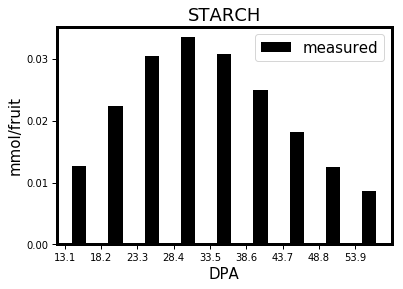

In [78]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
xlist = list()
ylist = list()
error_max2=list()
error_min2=list()
for i in range(1,10):
    xlist.append(DAA[i])
    ylist.append(solution.x_dict["STARCH_p_Transfer"+str(i)+str(i+1)])
    #error_max2.append(abs(cobra_model6.fva.get("maximum").get("STARCH_p_Transfer"+str(i)+str(i+1))))
    #error_min2.append(abs(cobra_model6.fva.get("minimum").get("STARCH_p_Transfer"+str(i)+str(i+1))))
#plt.bar(xlist,ylist,width=2,color="red",zorder=-1,label="predicted")
#plt.bar(xlist,error_max2,width=1,color="blue",zorder=-1,label="FVA range")
#plt.bar(xlist,error_min2,width=1,color="red",zorder=1)
plt.bar(xlist2,C_Jose["STARCH"][1:10],width=2,color="black",zorder=1,label="measured")
plt.legend(loc="best",fontsize=15)
plt.title("STARCH")
plt.yticks(fontsize=10)
plt.xticks(xlist,DPA[1:],fontsize=10)
plt.xlabel("DPA")
plt.ylabel("mmol/fruit")
plt.show()
#plt.savefig("/home/sanu/"+met+"_Fruit_261118")
plt.close()

In [71]:
cobra_model8.solution.x_dict.get("Final_Biomass_tx")

0.7284667512967469

In [72]:
cobra_model6.solution.x_dict.get("Final_Biomass_tx")

1.1026173081545576

In [159]:
cobra_model.metabolites.GLC_c1.formula_weight


180.15588

In [60]:
import pandas

df2 = pandas.read_csv("/home/sanu/JoseConc.csv",delimiter="\t")

DPA = list(df2.DPA)

### Compare Phloem uptake rate

In [186]:
#Function to perform FVA analysis which maintains sum of fluxes at a minimal val-
#ue
#args: 1) a cobra model 2) Objective 3) reaction to avoid when constraining sum
#of fluxes 4) reaction list for FVA 5) solver used to perform FVA
#output: a cobra model with FVA as an attribute called fva
def FBA_FVA_run(cobra_model,obj,rxn2avoid = [],rxnlist=[],solver="",weightings={}):
  from cobra import flux_analysis
  if len(weightings)>0:
    weightings_submittied=True
  else:
    weightings_submittied=False

  if len(rxnlist)==0:
    rxnlist = cobra_model.reactions
  for rxn in cobra_model.reactions:
    if not rxn.id in weightings.keys():
      weightings[rxn.id]=1
      if weightings_submittied:
          print("Warning")
          print rxn.id
          return
  print("Runing pFBA")
  solution = pfba_Weighted(cobra_model,weightings)
  objvalue = solution.x_dict.get(obj.id)
  a = 0
  for i in cobra_model.reactions:
    a = a + abs(solution.x_dict.get(i.id)*weightings[i.id])

  sumOfFluxes = a

  cobra_model2 = cobra_model.copy()
  irr_model = rev2irrev(cobra_model2)
  print("Setting SOF model")
  sfmodel = constrainSumOfFluxes(irr_model,rxn2avoid,sumOfFluxes,objvalue,weightings)
  rxnlist2 = list()
  if rxnlist == cobra_model.reactions:
    rxnlist2 = sfmodel.reactions
  else:
    for rxn in rxnlist:
      if rxn.lower_bound<0 and rxn.upper_bound>0:
        rxnlist2.append(sfmodel.reactions.get_by_id(rxn.id+"_reverse"))
      rxnlist2.append(sfmodel.reactions.get_by_id(rxn.id))
  #print("Rxn list ="+str(rxnlist2))
  print("Running FVA")

  if solver != "":
    import optlang
    if optlang.available_solvers.keys().__contains__(solver) and optlang.available_solvers[solver]:
      sfmodel.solver=solver
    else:
      print("Requested solver "+solver+" not available, using current model solver...")
  fva = flux_analysis.flux_variability_analysis(sfmodel,reaction_list = rxnlist2)
  print("Processing results")

  fva2=dict()
  for mode in fva.keys():
    if mode == "maximum":
      tempdict = dict()
      FVArxnSet = set()
      for rxn in fva[mode].keys():
        if rxn.__contains__("_reverse"):
          rxn = rxn.replace("_reverse","")
        if FVArxnSet.__contains__(rxn):
          continue
        FVArxnSet.add(rxn)
        if not fva[mode].keys().__contains__(rxn+"_reverse"):
          maxi = fva[mode][rxn]
        else:
          maxi = fva[mode][rxn]+fva[mode][rxn+"_reverse"]
        tempdict[rxn]=maxi
    else:
      tempdict=dict()
      FVArxnSet = set()
      for rxn in fva[mode].keys():
        if rxn.__contains__("_reverse"):
          rxn = rxn.replace("_reverse","")
        if FVArxnSet.__contains__(rxn):
          continue
        FVArxnSet.add(rxn)
        if not fva[mode].keys().__contains__(rxn+"_reverse"):
          mini = fva[mode][rxn]
        else:
          mini = fva[mode][rxn]+fva[mode][rxn+"_reverse"]
        tempdict[rxn]=mini
    fva2[mode]=tempdict

  sfmodel.fva = fva
  cobra_model.fva = fva2
  cobra_model.solution = solution
  return cobra_model



In [187]:


rxnlist= list()
for i in range(1,11):
    for met in ["Phloem_uptake_tx","CO2_tx"]:
        rxnlist.append(cobra_model2.reactions.get_by_id(met+str(i)))

cobra_model3 = cobra_model2.copy()

for i in range(1,11):
    cobra_model3.reactions.get_by_id("Phloem_uptake_tx"+str(i)).lower_bound = 0
    cobra_model3.reactions.get_by_id("Phloem_uptake_tx"+str(i)).upper_bound = 1000

temp_solution = pfba_Weighted(cobra_model3,weightings)        
        

rxnlist2= list()
for i in range(1,11):
    for met in ["Phloem_uptake_tx","CO2_tx"]:
        rxnlist2.append(cobra_model3.reactions.get_by_id(met+str(i)))
    
import time
print(time.ctime())
cobra_model6 = FBA_FVA_run(cobra_model2,cobra_model2.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist,weightings=weightings)
cobra_model7 = FBA_FVA_run(cobra_model3,cobra_model3.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist2,weightings=weightings)
print(time.ctime())

Wed Jul 31 16:19:05 2019
Runing pFBA
Setting SOF model
Running FVA
Processing results
Runing pFBA
Setting SOF model
Running FVA
Processing results
Wed Jul 31 16:21:02 2019


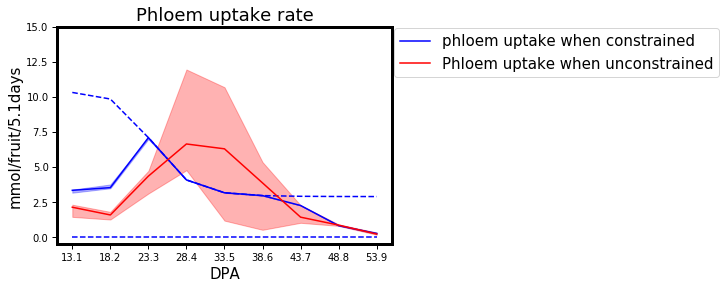

In [188]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

templist = list()
templist2 = list()
templist3 = list()
xlist = list()
error_min = list()
error_max = list()
error_min2 = list()
error_max2 = list()
upper_limit = list()
for i in range(1,10):
    xlist.append(i)
    upper_limit.append(cobra_model2.reactions.get_by_id("Phloem_uptake_tx"+str(i)).upper_bound)
    templist.append(solution2.x_dict["Phloem_uptake_tx"+str(i)])
    templist2.append(temp_solution.x_dict["Phloem_uptake_tx"+str(i)])
    error_max.append(abs(cobra_model6.fva.get("maximum").get("Phloem_uptake_tx"+str(i))))
    error_min.append(abs(cobra_model6.fva.get("minimum").get("Phloem_uptake_tx"+str(i))))
    error_max2.append(abs(cobra_model7.fva.get("maximum").get("Phloem_uptake_tx"+str(i))))
    error_min2.append(abs(cobra_model7.fva.get("minimum").get("Phloem_uptake_tx"+str(i))))
    #templist3.append(Conc.get("STARCH")[i]/scale)
plt.plot(xlist,templist,"-",color="blue",label="phloem uptake when constrained")
plt.plot(xlist,upper_limit,"--",color="blue")
plt.plot(xlist,[0]*len(xlist),"--",color="blue")
plt.fill_between(xlist,error_max,error_min,alpha=0.3,color="blue")
plt.plot(xlist,templist2,"-",label="Phloem uptake when unconstrained",color="red")
plt.fill_between(xlist,error_max2,error_min2,alpha=0.3,color="red")
#plt.plot(xlist,templist3,"-",label="Colombie et al 2015 data")

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.legend(bbox_to_anchor=(2, 1.03),fontsize=15)
plt.title("Phloem uptake rate")
plt.ylim(-0.5,15)
plt.yticks(fontsize=10)
plt.xticks(xlist,DPA[1:],fontsize=10)
plt.xlabel("DPA")
plt.ylabel("mmol/fruit/5.1days")
plt.show()


In [ ]:
cobra_model6.fva.get("maximum").get("Phloem_uptake_tx10")

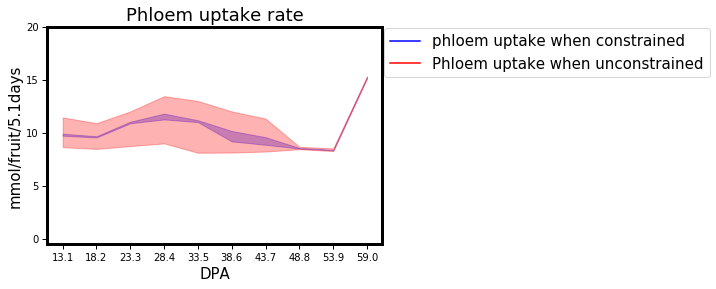

In [120]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

templist = list()
templist2 = list()
templist3 = list()
xlist = list()
error_min = list()
error_max = list()
error_min2 = list()
error_max2 = list()
upper_limit = list()
for i in range(1,11):
    xlist.append(i)
    upper_limit.append(cobra_model2.reactions.get_by_id("CO2_tx"+str(i)).upper_bound)
    templist.append(solution2.x_dict["CO2_tx"+str(i)])
    templist2.append(temp_solution.x_dict["CO2_tx"+str(i)])
    error_max.append(abs(cobra_model6.fva.get("maximum").get("CO2_tx"+str(i))))
    error_min.append(abs(cobra_model6.fva.get("minimum").get("CO2_tx"+str(i))))
    error_max2.append(abs(cobra_model7.fva.get("maximum").get("CO2_tx"+str(i))))
    error_min2.append(abs(cobra_model7.fva.get("minimum").get("CO2_tx"+str(i))))
    #templist3.append(Conc.get("STARCH")[i]/scale)
plt.plot(xlist,templist,"-",color="blue",label="phloem uptake when constrained")
#plt.plot(xlist,upper_limit,"--",color="blue")
#plt.plot(xlist,[0]*len(xlist),"--",color="blue")
plt.fill_between(xlist,error_max,error_min,alpha=0.3,color="blue")
plt.plot(xlist,templist2,"-",label="Phloem uptake when unconstrained",color="red")
plt.fill_between(xlist,error_max2,error_min2,alpha=0.3,color="red")
#plt.plot(xlist,templist3,"-",label="Colombie et al 2015 data")

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.legend(bbox_to_anchor=(2, 1.03),fontsize=15)
plt.title("Phloem uptake rate")
plt.ylim(-0.5,20)
plt.yticks(fontsize=10)
plt.xticks(xlist,DPA[1:],fontsize=10)
plt.xlabel("DPA")
plt.ylabel("mmol/fruit/5.1days")
plt.show()


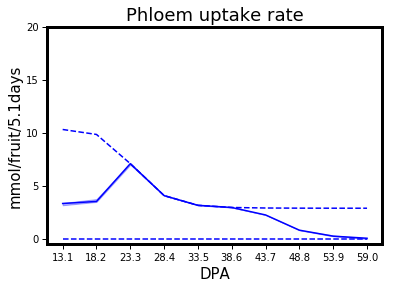

In [189]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

templist = list()
templist2 = list()
templist3 = list()
xlist = list()
error_min = list()
error_max = list()
error_min2 = list()
error_max2 = list()
upper_limit = list()
for i in range(1,11):
    xlist.append(i)
    upper_limit.append(cobra_model2.reactions.get_by_id("Phloem_uptake_tx"+str(i)).upper_bound)
    templist.append(solution2.x_dict["Phloem_uptake_tx"+str(i)])
    templist2.append(temp_solution.x_dict["Phloem_uptake_tx"+str(i)])
    error_max.append(abs(cobra_model6.fva.get("maximum").get("Phloem_uptake_tx"+str(i))))
    error_min.append(abs(cobra_model6.fva.get("minimum").get("Phloem_uptake_tx"+str(i))))
    error_max2.append(abs(cobra_model7.fva.get("maximum").get("Phloem_uptake_tx"+str(i))))
    error_min2.append(abs(cobra_model7.fva.get("minimum").get("Phloem_uptake_tx"+str(i))))
    #templist3.append(Conc.get("STARCH")[i]/scale)
plt.plot(xlist,templist,"-",color="blue",label="phloem uptake when constrained")
plt.plot(xlist,upper_limit,"--",color="blue")
plt.plot(xlist,[0]*len(xlist),"--",color="blue",label="phloem uptake constraint")
plt.fill_between(xlist,error_max,error_min,alpha=0.3,color="blue")
#plt.plot(xlist,templist2,"-",label="Phloem uptake when unconstrained",color="red")
#plt.fill_between(xlist,error_max2,error_min2,alpha=0.3,color="red")
#plt.plot(xlist,templist3,"-",label="Colombie et al 2015 data")

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
#plt.legend(bbox_to_anchor=(2, 1.03),fontsize=15)
plt.title("Phloem uptake rate")
plt.ylim(-0.5,20)
plt.yticks(fontsize=10)
plt.xticks(xlist,DPA[1:],fontsize=10)
plt.xlabel("DPA")
plt.ylabel("mmol/fruit/5.1days")
plt.show()


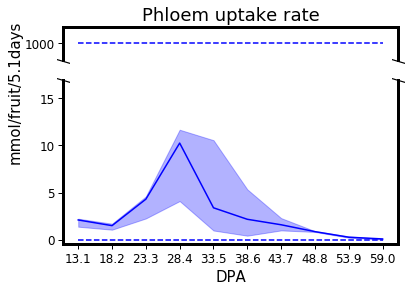

In [121]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
from matplotlib.ticker import MultipleLocator
from matplotlib import gridspec
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

fig=plt.subplots(sharex=True)
gs = gridspec.GridSpec(2,1,height_ratios=[1,5])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

templist = list()
templist2 = list()
templist3 = list()
xlist = list()
error_min = list()
error_max = list()
error_min2 = list()
error_max2 = list()
upper_limit = list()
for i in range(1,11):
    xlist.append(i)
    upper_limit.append(cobra_model2.reactions.get_by_id("Phloem_uptake_tx"+str(i)).upper_bound)
    templist.append(solution2.x_dict["Phloem_uptake_tx"+str(i)])
    templist2.append(temp_solution.x_dict["Phloem_uptake_tx"+str(i)])
    error_max.append(abs(cobra_model6.fva.get("maximum").get("Phloem_uptake_tx"+str(i))))
    error_min.append(abs(cobra_model6.fva.get("minimum").get("Phloem_uptake_tx"+str(i))))
    error_max2.append(abs(cobra_model7.fva.get("maximum").get("Phloem_uptake_tx"+str(i))))
    error_min2.append(abs(cobra_model7.fva.get("minimum").get("Phloem_uptake_tx"+str(i))))
    #templist3.append(Conc.get("STARCH")[i]/scale)
#plt.plot(xlist,templist,"-",color="blue",label="phloem uptake when constrained")
#plt.plot(xlist,upper_limit,"--",color="blue",label="phloem uptake constraint")
#plt.plot(xlist,[0]*len(xlist),"--",color="blue",label="phloem uptake constraint")
#plt.fill_between(xlist,error_max,error_min,alpha=0.3,color="blue")
ax1.plot(xlist,templist2,"-",label="Phloem uptake when unconstrained",color="blue")
ax1.fill_between(xlist,error_max2,error_min2,alpha=0.3,color="blue")
ax0.plot(xlist,[1000]*len(xlist),"--",color="blue")
ax1.plot(xlist,[0]*len(xlist),"--",color="blue",label="phloem uptake constraint")
#plt.plot(xlist,templist3,"-",label="Colombie et al 2015 data")

ax0.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax0.tick_params(bottom=False,labelbottom=False)
ax1.tick_params(top=False)
ax0.set_ylim(990,1010)
ax0.set_yticks([1000])
ax1.set_ylim(-0.5,17)

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
#plt.legend()#bbox_to_anchor=(2, 1.03),fontsize=15)
ax0.set_title("Phloem uptake rate")
#plt.ylim(-0.5,4.5)
#plt.yticks(fontsize=10)
plt.xticks(xlist,DPA[1:],fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("DPA")
plt.text(-1.1,22,"mmol/fruit/5.1days",rotation=90)
plt.text(0.4,16,"/",rotation=90)
plt.text(10.3,16,"/",rotation=90)
plt.text(0.4,18,"/",rotation=90)
plt.text(10.3,18,"/",rotation=90)
ax0.tick_params(axis='both', which='major', labelsize=12)
plt.show()


In [252]:
[(rxn.id,solution2.x_dict[rxn.id]) for rxn in cobra_model2.metabolites.get_by_id("STARCH_p5").reactions if abs(solution2.x_dict[rxn.id]) > 0.00001]

[('STARCH_p_Transfer45', 1.0019254482804596),
 ('RXN_1826_p5', 1.0019254482804596)]

### compairing respiration rate

In [123]:
from SweetloveGroup.FVA import FBA_FVA_run

rxnlist= list()
for i in range(1,11):
    for met in ["CO2_tx","PROTON_ATPase_c"]:
        rxnlist.append(cobra_model2.reactions.get_by_id(met+str(i)))

cobra_model3 = cobra_model2.copy()

for i in range(1,11):
    if i<10:
        cobra_model3.reactions.get_by_id("SUCROSE_v_Transfer"+str(i)+str(i+1)).lower_bound = 0
        cobra_model3.reactions.get_by_id("SUCROSE_v_Transfer"+str(i)+str(i+1)).upper_bound = 0
        cobra_model3.reactions.get_by_id("SUCROSE_c_Transfer"+str(i)+str(i+1)).lower_bound = 0
        cobra_model3.reactions.get_by_id("SUCROSE_c_Transfer"+str(i)+str(i+1)).upper_bound = 0
    cobra_model3.reactions.get_by_id("GLYCOGENSYN_RXN_p"+str(i)).lower_bound = 0.5
    cobra_model3.reactions.get_by_id("GLYCOGENSYN_RXN_p"+str(i)).upper_bound = 0.5

temp_solution = pfba_Weighted(cobra_model3,weightings)       


rxnlist2= list()
for i in range(1,11):
    for met in ["CO2_tx"]:
        rxnlist2.append(cobra_model3.reactions.get_by_id(met+str(i)))    

        
import time
print(time.ctime())
cobra_model5 = FBA_FVA_run(cobra_model2,cobra_model2.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist,weightings=weightings)
#cobra_model6 = FBA_FVA_run(cobra_model3,cobra_model3.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist2,weightings=weightings)
print(time.ctime())

Mon Jun 10 14:59:42 2019
Runing pFBA
Setting SOF model
Running FVA
Processing results
Mon Jun 10 15:00:50 2019


<Figure size 720x1080 with 0 Axes>

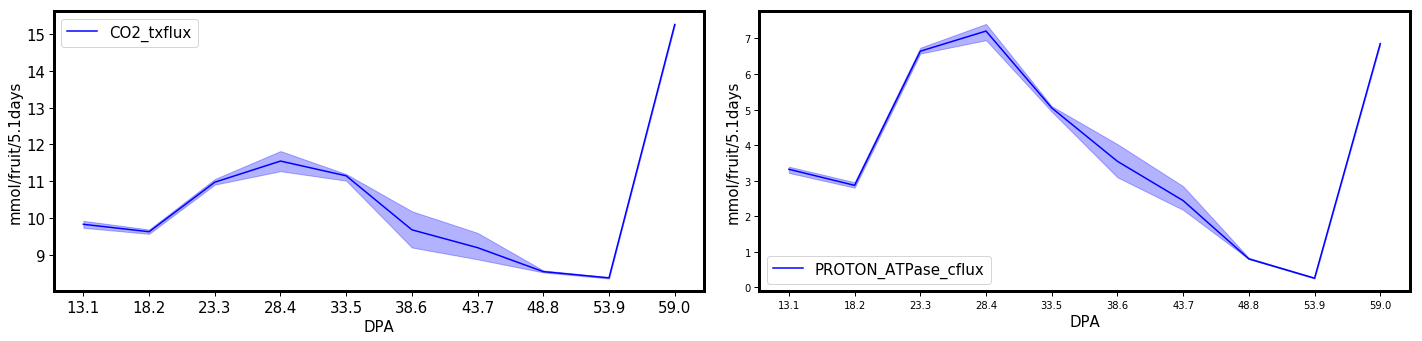

In [124]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(10,15))

met = ["CO2_tx","PROTON_ATPase_c"]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
j=0
for m in met:
    ax1 = axes[j]
    j=j+1
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    error_min2 = list()
    error_max2 = list()
    for i in range(1,11):
        xlist.append(i)
        templist.append(abs(solution2.x_dict[m+str(i)]))
        error_max.append(abs(cobra_model5.fva.get("maximum").get(m+str(i))))
        error_min.append(abs(cobra_model5.fva.get("minimum").get(m+str(i))))
        #templist2.append(abs(temp_solution.x_dict[m+str(i)]))
        #error_max2.append(abs(cobra_model6.fva.get("maximum").get(m+str(i))))
        #error_min2.append(abs(cobra_model6.fva.get("minimum").get(m+str(i))))
    ax1.plot(xlist,templist,"-",label=m+"flux", color ="blue")
    ax1.fill_between(xlist,error_max,error_min,alpha=0.3,color="blue")
    #ax1.plot(xlist,templist2,"-",label="Starch synthesis constrained and sucrose accumulation prevented",color="green")
    #ax1.fill_between(xlist,error_max2,error_min2,alpha=0.3,color="green")
    #ax1.set_ylim(-0.5,4)
    ax1.set_xticks(xlist)
    ax1.set_xticklabels(DPA[1:])
    ax1.set_xlabel("DPA")
    ax1.set_ylabel("mmol/fruit/5.1days")
    ax1.legend()
    #ax1.legend(bbox_to_anchor=(1.2,1.2),fontsize=15)
    #ax1.set_title("Final model")
    #plt.plot(xlist,templist2,"o",label=m+" - old")

plt.tick_params(axis="both", which="major", labelsize=10)
plt.tight_layout()
plt.show()

### sucrose synthase pattern

In [125]:
from SweetloveGroup.FVA import FBA_FVA_run

rxnlist= list()
for i in range(1,11):
    for met in ["SUCROSE_SYNTHASE_RXN_c","GLUCOKIN_RXN_c","FRUCTOKINASE_RXN_c","GLU6PDEHYDROG_RXN_c","GLU6PDEHYDROG_RXN_p","MALIC_NADP_RXN_c","MALIC_NADP_RXN_p","MALIC_NAD_RXN_m","RXN_1461_v","RXN_1461_c","PGLUCISOM_RXN_c","PGLUCISOM_RXN_p","PEPCARBOX_RXN_c","PHOSPHOGLUCMUT_RXN_c","PHOSPHOGLUCMUT_RXN_p","PEPDEPHOS_RXN_c","PEPDEPHOS_RXN_p","CITSYN_RXN_m","1_PERIOD_2_PERIOD_1_PERIOD_9_RXN_c","GLUC1PADENYLTRANS_RXN_p","GLUTAMATE_DEHYDROGENASE_RXN_m"]:
        rxnlist.append(cobra_model2.reactions.get_by_id(met+str(i)))

cobra_model3 = cobra_model2.copy()

import time
print(time.ctime())
cobra_model5 = FBA_FVA_run(cobra_model2,cobra_model2.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist,weightings=weightings)
#cobra_model6 = FBA_FVA_run(cobra_model3,cobra_model3.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist2,weightings=weightings)
print(time.ctime())

Mon Jun 10 15:00:52 2019
Runing pFBA
Setting SOF model
Running FVA
Processing results
Mon Jun 10 15:02:01 2019


In [126]:
axes[0]

<Figure size 720x1080 with 0 Axes>

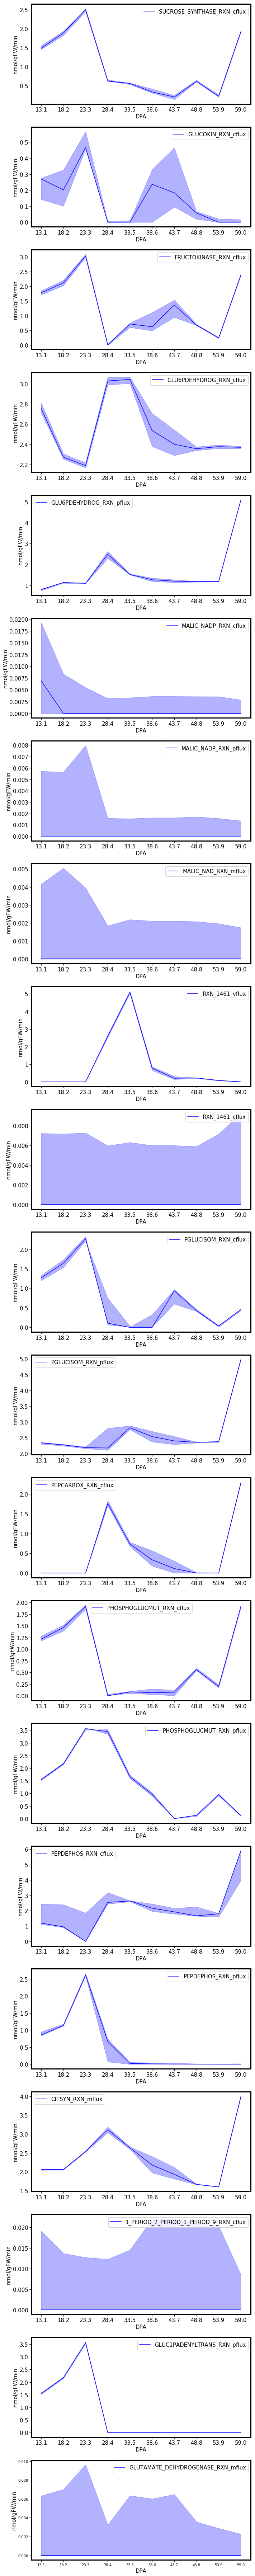

In [127]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(10,15))

met = ["SUCROSE_SYNTHASE_RXN_c","GLUCOKIN_RXN_c","FRUCTOKINASE_RXN_c","GLU6PDEHYDROG_RXN_c","GLU6PDEHYDROG_RXN_p","MALIC_NADP_RXN_c","MALIC_NADP_RXN_p","MALIC_NAD_RXN_m","RXN_1461_v","RXN_1461_c","PGLUCISOM_RXN_c","PGLUCISOM_RXN_p","PEPCARBOX_RXN_c","PHOSPHOGLUCMUT_RXN_c","PHOSPHOGLUCMUT_RXN_p","PEPDEPHOS_RXN_c","PEPDEPHOS_RXN_p","CITSYN_RXN_m","1_PERIOD_2_PERIOD_1_PERIOD_9_RXN_c","GLUC1PADENYLTRANS_RXN_p","GLUTAMATE_DEHYDROGENASE_RXN_m"]

fig, axes = plt.subplots(nrows=21,ncols=1,figsize=(10,100))
j=0
for m in met:
    ax1 = axes[j]
    j=j+1
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    error_min2 = list()
    error_max2 = list()
    for i in range(1,11):
        xlist.append(i)
        #templist.append(abs((solution2.x_dict[m+str(i)]*1000000)/(estimateFruitFW(DPA[i])*5.1*24*60)))
        #error_max.append(abs((cobra_model5.fva.get("maximum").get(m+str(i))*1000000)/(estimateFruitFW(DPA[i])*5.1*24*60)))
        #error_min.append(abs((cobra_model5.fva.get("minimum").get(m+str(i))*1000000)/(estimateFruitFW(DPA[i])*5.1*24*60)))
        templist.append(abs((solution2.x_dict[m+str(i)])))
        error_max.append(abs((cobra_model5.fva.get("maximum").get(m+str(i)))))
        error_min.append(abs((cobra_model5.fva.get("minimum").get(m+str(i)))))
        #templist2.append(abs(temp_solution.x_dict[m+str(i)]))
        #error_max2.append(abs(cobra_model6.fva.get("maximum").get(m+str(i))))
        #error_min2.append(abs(cobra_model6.fva.get("minimum").get(m+str(i))))
    ax1.plot(xlist,templist,"-",label=m+"flux", color ="blue")
    ax1.fill_between(xlist,error_max,error_min,alpha=0.3,color="blue")
    #ax1.plot(xlist,templist2,"-",label="Starch synthesis constrained and sucrose accumulation prevented",color="green")
    #ax1.fill_between(xlist,error_max2,error_min2,alpha=0.3,color="green")
    #ax1.set_ylim(-0.5,4)
    ax1.set_xticks(xlist)
    ax1.set_xticklabels(DPA[1:])
    ax1.set_xlabel("DPA")
    ax1.set_ylabel("nmol/gFW/min")
    ax1.legend()
    #ax1.legend(bbox_to_anchor=(1.2,1.2),fontsize=15)
    #ax1.set_title("Final model")
    #plt.plot(xlist,templist2,"o",label=m+" - old")

plt.tick_params(axis="both", which="major", labelsize=10)
plt.tight_layout()
plt.show()

In [128]:
met = cobra_model2.metabolites.get_by_id("SUCROSE_c10")
[(rxn.id,solution2.x_dict.get(rxn.id)*rxn.metabolites.get(met)) for rxn in met.reactions if abs(round(solution2.x_dict.get(rxn.id),3))>0]
    

[('SUCROSE_PROTON_rev_vc10', 0.010774755227004055),
 ('SUCROSE_SYNTHASE_RXN_c10', -1.9220190620767208),
 ('Phloem_uptake_tx10', 0.05179564754709922),
 ('SUCROSE_c_Transfer910', 1.8594486593026174)]

In [322]:
def writeSolutionFluxesToFile(sol,outfile,model):
    import pandas as pd
    rxnList = list()
    eqnList = list()
    fluxList = list()
    EClist = list()
    for rxn in model.reactions:
        rxnList.append(rxn.id)
        eqnList.append(rxn.reaction)
        if not "PROTEIN CLASS" in rxn.notes.keys():
            EClist.append("")
        else:
            EClist.append(rxn.notes.get("PROTEIN CLASS")[0])
        fluxList.append(sol.x_dict.get(rxn.id))
    df = pd.DataFrame(data={"ID":rxnList,"EC number":EClist,"reaction":eqnList,"flux":fluxList})
    df = df[['ID','EC number', 'reaction', 'flux']]
    df.to_csv(outfile)
    return

writeSolutionFluxesToFile(solution2,"FruitFluxes.csv",cobra_model2)

In [360]:
temp = cobra_model2.copy()
for met in temp.metabolites:
    if type(met.formula_weight) == float:
        met.formula=""
    if met.charge == None:
        met.charge =0
    else:
        met.charge =int(met.charge)
io.write_sbml_model(temp, "Fruit_model.xml",use_fbc_package=False)

VO_1
CC_v1
CO_1
CC_c1
VO_2
CC_v2
CO_2
CC_c2
VO_3
CC_v3
CO_3
CC_c3
VO_4
CC_v4
CC_c4
CO_4
VO_5
CC_v5
CO_5
CC_c5
VO_6
CC_v6
CO_6
CC_c6
VO_7
CC_v7
CO_7
CC_c7
VO_8
CC_v8
CO_8
CC_c8
CC_v9
VO_9
CO_9
CC_c9
CO_10
CC_c10
VO_10
CC_v10
WCO_1
WCO_2
WCO_3
WCO_4
WCO_5
WCO_6
WCO_7
WCO_8
WCO_9
WCO_10
ATPNAPDH_maintenance_constraint_1
ATPNAPDH_maintenance_constraint_2
ATPNAPDH_maintenance_constraint_3
ATPNAPDH_maintenance_constraint_4
ATPNAPDH_maintenance_constraint_5
ATPNAPDH_maintenance_constraint_6
ATPNAPDH_maintenance_constraint_7
ATPNAPDH_maintenance_constraint_8
ATPNAPDH_maintenance_constraint_9
ATPNAPDH_maintenance_constraint_10
ILE1
ILE2
ILE3
ILE4
ILE5
ILE6
ILE7
ILE8
ILE9
4_AMINO_BUTYRATE1
4_AMINO_BUTYRATE2
4_AMINO_BUTYRATE3
4_AMINO_BUTYRATE4
4_AMINO_BUTYRATE5
4_AMINO_BUTYRATE6
4_AMINO_BUTYRATE7
4_AMINO_BUTYRATE8
4_AMINO_BUTYRATE9
GLN1
GLN2
GLN3
GLN4
GLN5
GLN6
GLN7
GLN8
GLN9
GLC1
GLC2
GLC3
GLC4
GLC5
GLC6
GLC7
GLC8
GLC9
GLY1
GLY2
GLY3
GLY4
GLY5
GLY6
GLY7
GLY8
GLY9
CIT1
CIT2
CIT3
CIT4
CIT5
CIT6
CI

Text(0,0.5,' Delta cellsize')

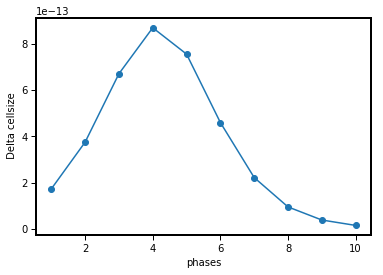

In [184]:
tempxlist = list()
tempylist = list()
for i in range(1,11):
    tempxlist.append(i)
    tempylist.append(estimateVcell(DPA[i])-estimateVcell(DPA[i-1]))
import matplotlib.pyplot as plt
plt.plot(tempxlist,tempylist,"-o")
plt.xlabel("phases")
plt.ylabel(" Delta cellsize")
    

In [177]:
estimateVcell(DPA[3])-estimateVcell(DPA[2])

6.709388763147533e-13

In [178]:
estimateVcell(DPA[10])-estimateVcell(DPA[9])

1.5474813171980936e-14

In [179]:
estimateVcell(DPA[9])-estimateVcell(DPA[8])

3.883654872387629e-14

In [170]:
import matplotlib
cmap = matplotlib.cm.get_cmap('rainbow')



consuming_list = ["ATPase_tx","PROTON_ATPase_c","6PFRUCTPHOS_RXN_c","GLUC1PADENYLTRANS_RXN_p",
                  "FRUCTOKINASE_RXN_c","PROTONATP_rev_vc","Others-neg"]
producing_list = ["Others-pos","SUCCCOASYN_RXN_m","PEPDEPHOS_RXN_c","PEPDEPHOS_RXN_p",
                  "PHOSGLYPHOS_RXN_c","Mitochondrial_ATP_Synthase_m"]

colourDict=dict()

i=1
for r in consuming_list:
    colourDict[r]=cmap(0.4*float(i)/len(consuming_list))
    i=i+1

i=1
for r in producing_list:
    colourDict[r]=cmap((0.4*float(i)/len(producing_list))+0.6)
    i=i+1

def adaptcolourDict(colourDict,tag=""):
    temp = dict()
    for k in colourDict.keys():
        if "Others" in k:
            temp[k]=colourDict[k]
        else:
            temp[k+tag]=colourDict[k]
    return temp

cD=dict()
for i in range(1,11):
    cD[str(i)] = adaptcolourDict(colourDict,tag=str(i))
    cD[str(i)]["ATPase_tx"+str(i)] = "black"

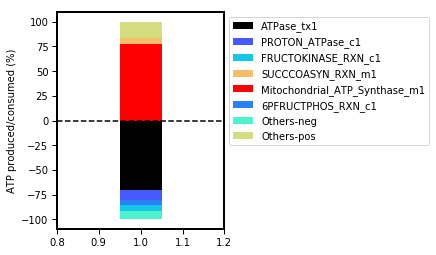

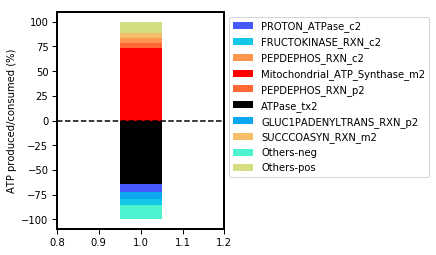

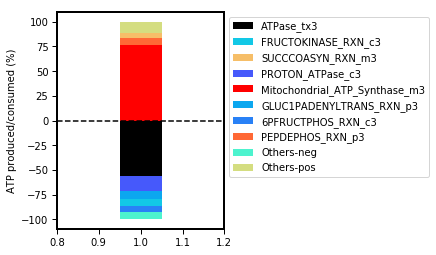

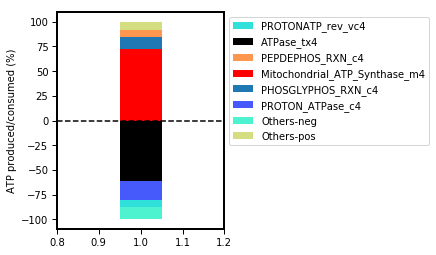

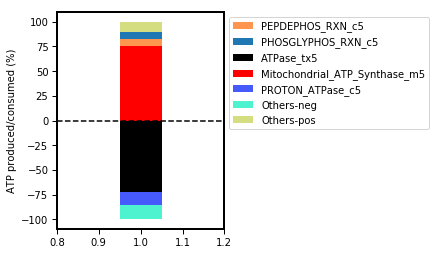

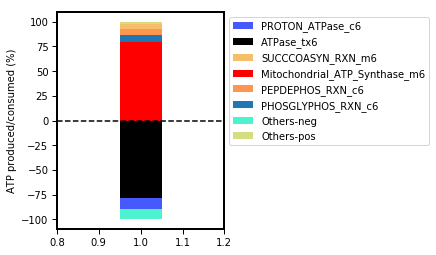

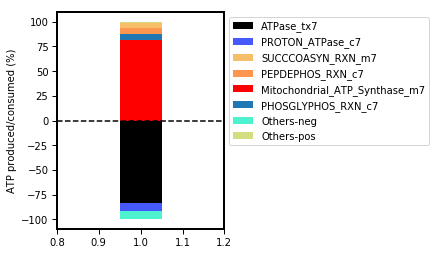

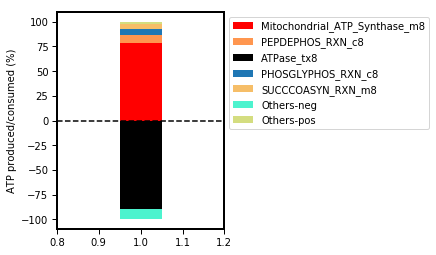

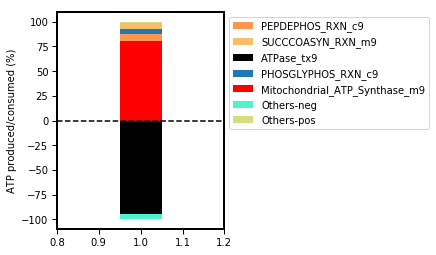

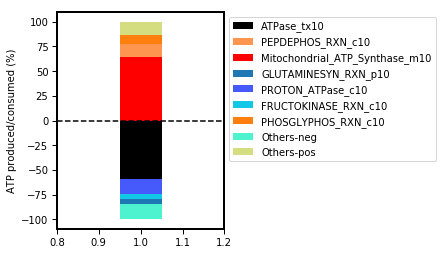

In [171]:
from functions3 import generateATPbudget


for i in range(1,11):
    generateATPbudget(cobra_model2,solution.x_dict,outfile="/home/sanu/ATPbudgetFruit_"+str(i),show_plot=True,
                  percentage=True,day_or_night_tag=str(i),save_plot_to="temp.png",
                  colourDict=cD[str(i)])

In [144]:

def generateFluxMap(cobra_model,solution, outfile,phases = 2):
    import cobra
    #solution = cobra.flux_analysis.parsimonious.optimize_minimal_flux(cobra_model)
    #solution = cobra.flux_analysis.parsimonious.pfba(cobra_model)          #If the previous line returns error comment it out and uncomment this line instead

    #open output file for writing
    f = open(outfile,"w");

    #use rxnSet to identify reaction that have already been processed
    rxnSet = set()

    mult=set()
    #Looping through all reactions in the model
    for rxn in cobra_model.reactions:
        #Get the ID
        RXN=rxn.id
        #declare a boolean variable multFlag to keep track of whether this reaction is present in multiple models
        multFlag=False

        #check if the reaction has already been processed before and if yes skip this run in the loop
        if(rxnSet.__contains__(RXN)):
            continue
        if rxn.id.__contains__("EX") or rxn.id.__contains__("Transfer") or rxn.id.__contains__("iomass") or rxn.id.__contains__("signal"):
            multFlag=False
        #check if the reaction ends with one or two i.e it is present more than once in the model
        elif(["1","2","3","4","5","6","7","8","9"].__contains__(rxn.id[len(rxn.id)-1])):
            #change the id to without the suffix 1-9 and declare it as a reaction which has multiple instances
            RXN = rxn.id[0:len(rxn.id)-1]
            multFlag=True
        elif rxn.id[len(rxn.id)-2:] == "10":
            #change the id to without the suffix 10 and declare it as a reaction which has multiple instances
            RXN = rxn.id[0:len(rxn.id)-2]
            multFlag=True

        #if metabolite has multiple instances
        values = dict()
        status1 = dict()
        status2 = dict()
        if(multFlag):
            tempvalue = list()
            temp1 = list()
            temp2 = list()
            mult.add(RXN)
            #add the reaction we are about to process to the reactions processed list
            for i in range(1,phases+1):
                rxnSet.add(RXN+str(i))
                if(round(float(solution.x_dict.get(RXN+str(i)))*10000000) == 0):
                    tempvalue.append(0)
                    temp1.append("none")
                    temp2.append("none")
                elif(float(solution.x_dict.get(RXN+str(i)))*10000 > 0):
                    tempvalue.append(solution.x_dict.get(RXN+str(i)))
                    temp1.append("produced")
                    temp2.append("consumed")
                elif(float(solution.x_dict.get(RXN+str(i)))*10000 < 0):
                    tempvalue.append(solution.x_dict.get(RXN+str(i)))
                    temp1.append("consumed")
                    temp2.append("produced")
            values[RXN] = tempvalue
            status1[RXN] = temp1
            status2[RXN] = temp2

            #select 1 reaction so that we can identify the reactants and products which can be then used to generate the edge shared_name
            rxn=cobra_model.reactions.get_by_id(RXN+"1")

            for reac in rxn.reactants:
                REAC=reac.id
                if(REAC.__contains__("1")):
                    if(REAC.rindex("1")==len(REAC)-1):
                        REAC=REAC[0:len(REAC)-1]
                    f.write("R_"+RXN+" (reaction-reactant) M_"+REAC)
                    for i in range(1,phases+1):
                        f.write("\t"+str(values[RXN][i-1])+"\t"+str(status2[RXN][i-1]))
                    f.write("\n")
                if(RXN.__contains__("biomass")):
                    f.write("R_"+RXN+" (reaction-product)) M_"+REAC)
                    for i in range(1,phases+1):
                        f.write("\t"+str(values[RXN][i-1])+"\t"+str(status1[RXN][i-1]))
                    f.write("\n")
            for prod in rxn.products:
                PROD=prod.id
                if(PROD.__contains__("1")):
                    if(PROD.rindex("1")==len(PROD)-1):
                        PROD=PROD[0:len(PROD)-1]
                f.write("R_"+RXN+" (reaction-product) M_"+PROD)
                for i in range(1,phases+1):
                    f.write("\t"+str(values[RXN][i-1])+"\t"+str(status1[RXN][i-1]))
                f.write("\n")
            if(RXN.__contains__("biomass")):
                f.write("R_"+RXN+" (reaction-reactant) M_"+REAC)
                for i in range(1,phases+1):
                    f.write("\t"+str(values[RXN][i-1])+"\t"+str(status2[RXN][i-1]))
                f.write("\n")
        else:
            #add the reaction we are about to process to the reactions processed list
            rxnSet.add(RXN)
            if(round(float(solution.x_dict.get(rxn.id))*10000000) == 0):
                value = 0;
                status1= "none";
                status0= "none";
            elif(solution.x_dict.get(rxn.id)*10000 > 0):
                value = solution.x_dict.get(rxn.id)*1000;
                status1= "produced";
                status0= "consumed";
            elif(solution.x_dict.get(rxn.id)*10000 < 0):
                value = solution.x_dict.get(rxn.id)*1000;
                status1= "consumed";
                status0= "produced";

            for reac in rxn.reactants:
                REAC=reac.id
                if(REAC.__contains__("1")):
                    if(REAC.rindex("1")==len(REAC)-1):# or (met.id.rindex("2")==len(rxn.id)-1):
                        REAC=REAC[0:len(REAC)-1]
                f.write("R_%s (reaction-reactant) M_%s\t%s\t%s\t0\tnone\n" % (RXN,REAC,value,status0));
            for prod in rxn.products:
                PROD=prod.id
                if(PROD.__contains__("1")):
                    if(PROD.rindex("1")==len(PROD)-1):# or (met.id.rindex("2")==len(rxn.id)-1):
                        PROD=PROD[0:len(PROD)-1]
                f.write("R_%s (reaction-product) M_%s\t%s\t%s\t0\tnone\n" % (RXN,PROD,value,status1));

    f.close();



In [146]:
generateFluxMap(cobra_model2,solution2,"/home/sanu/Fruitfluxes_080419",phases = 10)

In [79]:
templist

[9.9840254115205962,
 9.866069471057294,
 13.058550255777474,
 10.225699477838363,
 10.60700322990961,
 10.18550675896965,
 9.7873133566295483,
 9.1239759532314508,
 8.8937252942703733,
 12.567131370521036]

In [83]:
DPA[1:]

[13.1, 18.2, 23.3, 28.4, 33.5, 38.6, 43.7, 48.8, 53.9, 59.0]

### compairing C uptake with and without osmolarity

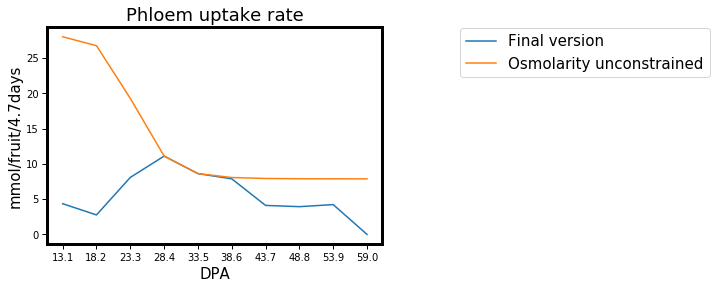

In [114]:
temp2 = cobra_model2.copy()

for i in range(1,11):
    temp2.metabolites.get_by_id("CO_"+str(i)).remove_from_model()
    temp2.metabolites.get_by_id("VO_"+str(i)).remove_from_model()
    temp2.metabolites.get_by_id("WCO_"+str(i)).remove_from_model()


temp_solution = flux_analysis.parsimonious.optimize_minimal_flux(temp2)
cobra_model3 = cobra_model2.copy()

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

templist = list()
templist2 = list()
templist3 = list()
xlist = list()
error_min = list()
error_max = list()
for i in range(1,11):
    xlist.append(i)
    templist.append(solution2.x_dict["Phloem_uptake_tx"+str(i)])
    templist2.append(temp_solution.x_dict["Phloem_uptake_tx"+str(i)])
    #templist3.append(backup3.reactions.get_by_id("Phloem_uptake_tx"+str(i)).x)
plt.plot(xlist,templist,"-",label="Final version")
plt.plot(xlist,templist2,"-",label="Osmolarity unconstrained")
#plt.plot(xlist,templist3,"-",label="Osmolarity, phloem and NGAM unconstrained")

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.legend(bbox_to_anchor=(2, 1.03),fontsize=15)
plt.title("Phloem uptake rate")
#plt.ylim(-0.5,4.5)
plt.yticks(fontsize=10)
plt.xticks(xlist,DPA[1:],fontsize=10)
plt.xlabel("DPA")
plt.ylabel("mmol/fruit/4.7days")
plt.show()


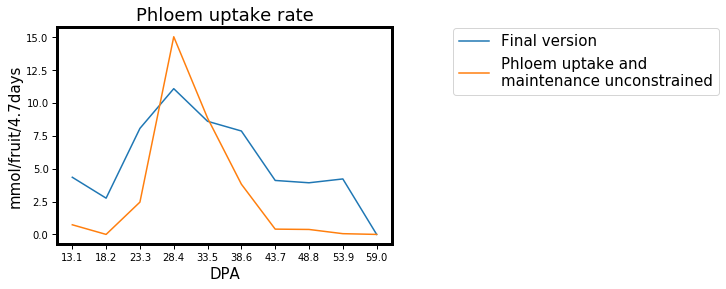

In [115]:
temp2 = cobra_model2.copy()

for i in range(1,11):
    temp2.reactions.get_by_id("ATPase_tx"+str(i)).lower_bound = 0
    temp2.reactions.get_by_id("ATPase_tx"+str(i)).upper_bound = 1000
    temp2.reactions.get_by_id("Phloem_uptake_tx"+str(i)).upper_bound = 1000


temp_solution = flux_analysis.parsimonious.optimize_minimal_flux(temp2)
cobra_model3 = cobra_model2.copy()

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

templist = list()
templist2 = list()
templist3 = list()
xlist = list()
error_min = list()
error_max = list()
for i in range(1,11):
    xlist.append(i)
    templist.append(solution2.x_dict["Phloem_uptake_tx"+str(i)])
    templist2.append(temp_solution.x_dict["Phloem_uptake_tx"+str(i)])
    #templist3.append(backup3.reactions.get_by_id("Phloem_uptake_tx"+str(i)).x)
plt.plot(xlist,templist,"-",label="Final version")
plt.plot(xlist,templist2,"-",label="Phloem uptake and \nmaintenance unconstrained")
#plt.plot(xlist,templist3,"-",label="Osmolarity, phloem and NGAM unconstrained")

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.legend(bbox_to_anchor=(2, 1.03),fontsize=15)
plt.title("Phloem uptake rate")
#plt.ylim(-0.5,4.5)
plt.yticks(fontsize=10)
plt.xticks(xlist,DPA[1:],fontsize=10)
plt.xlabel("DPA")
plt.ylabel("mmol/fruit/4.7days")
plt.show()


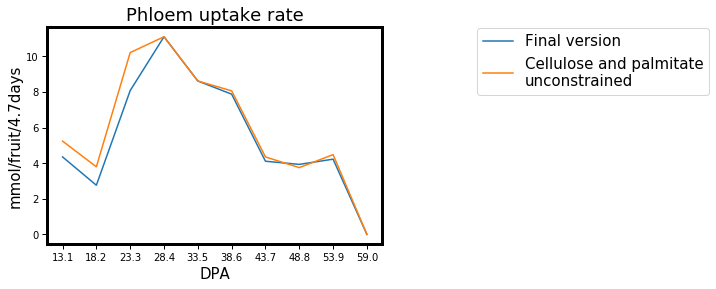

In [116]:
temp2 = cobra_model2.copy()

for i in range(1,11):
    temp2.reactions.get_by_id("CELLULOSE_accumulation"+str(i)).lower_bound = 0
    temp2.reactions.get_by_id("CELLULOSE_accumulation"+str(i)).upper_bound = 1000
    temp2.reactions.get_by_id("phospholipid_accumulation"+str(i)).lower_bound = 0
    temp2.reactions.get_by_id("phospholipid_accumulation"+str(i)).upper_bound = 1000
    temp2.reactions.get_by_id("Biomass_tx"+str(i)).lower_bound = 0
    temp2.reactions.get_by_id("Biomass_tx"+str(i)).upper_bound = 1000


temp_solution = flux_analysis.parsimonious.optimize_minimal_flux(temp2)
cobra_model3 = cobra_model2.copy()

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

templist = list()
templist2 = list()
templist3 = list()
xlist = list()
error_min = list()
error_max = list()
for i in range(1,11):
    xlist.append(i)
    templist.append(solution2.x_dict["Phloem_uptake_tx"+str(i)])
    templist2.append(temp_solution.x_dict["Phloem_uptake_tx"+str(i)])
    #templist3.append(backup3.reactions.get_by_id("Phloem_uptake_tx"+str(i)).x)
plt.plot(xlist,templist,"-",label="Final version")
plt.plot(xlist,templist2,"-",label="Cellulose and palmitate\nunconstrained")
#plt.plot(xlist,templist3,"-",label="Osmolarity, phloem and NGAM unconstrained")

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.legend(bbox_to_anchor=(2, 1.03),fontsize=15)
plt.title("Phloem uptake rate")
#plt.ylim(-0.5,4.5)
plt.yticks(fontsize=10)
plt.xticks(xlist,DPA[1:],fontsize=10)
plt.xlabel("DPA")
plt.ylabel("mmol/fruit/4.7days")
plt.show()


### Compare cation accumulation rates in old and new models (with and without water potential constraints, respectively)

In [117]:
rxnlist= list()
for i in range(1,10):
    for met in ["KI_v","CAII_v","MGII_v","AMMONIUM_v","NITRATE_v"]:
        rxnlist.append(cobra_model2.reactions.get_by_id(met+"_Transfer"+str(i)+str(i+1)))


rxnlist2= list()
for i in range(1,10):
    for met in ["KI_v","CAII_v","MGII_v","AMMONIUM_v","NITRATE_v"]:
        rxnlist2.append(temp.reactions.get_by_id(met+"_Transfer"+str(i)+str(i+1)))


import time
print(time.ctime())
cobra_model3 = FBA_FVA_run(cobra_model2,cobra_model2.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist)
cobra_model4 = FBA_FVA_run(temp,temp.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist)
print(time.ctime())



Tue Nov  6 10:52:11 2018
Runing pFBA
Setting SOF model
Running FVA
Processing results
Runing pFBA
Setting SOF model
Running FVA
Processing results
Tue Nov  6 10:53:49 2018


/home/sanu/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107 MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


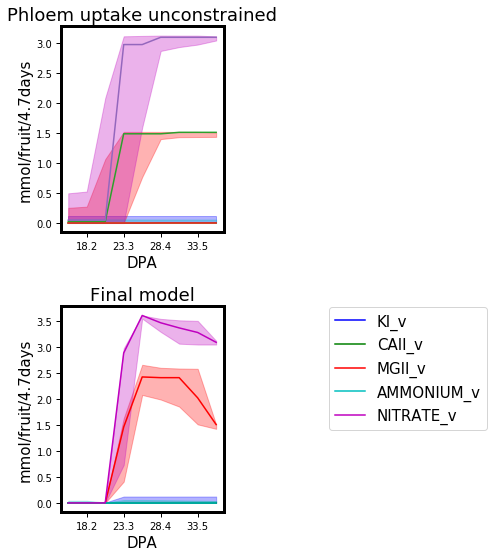

In [118]:

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

met = ["KI_v","CAII_v","MGII_v","AMMONIUM_v","NITRATE_v"]
colors = {"KI_v":"b","CAII_v":"g","MGII_v":"r","AMMONIUM_v":"c","NITRATE_v":"m"}

for m in met:
    ax1 = plt.subplot(2,1,2)
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(solution2.x_dict.get(m+"_Transfer"+str(i)+str(i+1)))
        error_max.append(cobra_model3.fva.get("maximum").get(m+"_Transfer"+str(i)+str(i+1)))
        error_min.append(cobra_model3.fva.get("minimum").get(m+"_Transfer"+str(i)+str(i+1)))
    ax1.plot(xlist,templist,"-",label=m, color = colors.get(m))
    ax1.fill_between(xlist,error_max,error_min,alpha=0.3,color=colors.get(m))
    #ax1.set_ylim(-0.1,0.1)
    ax1.set_xticklabels(DPA[1:])
    ax1.set_xlabel("DPA")
    ax1.set_ylabel("mmol/fruit/4.7days")
    ax1.legend(bbox_to_anchor=(1.6, 1.03),fontsize=15)
    ax1.set_title("Final model")
    #plt.plot(xlist,templist2,"o",label=m+" - old")

plt.tick_params(axis="both", which="major", labelsize=10)
    
for m in met:
    ax2 = plt.subplot(2,1,1)
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        #templist.append(cobra_model3.reactions.get_by_id(m+"_c_Transfer"+str(i)+str(i+1)).x)
        templist2.append(TEMP_solution.x_dict.get(m+"_Transfer"+str(i)+str(i+1)))
        error_max.append(cobra_model4.fva.get("maximum").get(m+"_Transfer"+str(i)+str(i+1)))
        error_min.append(cobra_model4.fva.get("minimum").get(m+"_Transfer"+str(i)+str(i+1)))
    #ax1.plot(xlist,templist,"-",label=m+" - new")
    #print(templist2)
    ax2.plot(xlist,templist2,"-",label=m)
    ax2.fill_between(xlist,error_max,error_min,alpha=0.3,color=colors.get(m))
    #ax2.set_ylim(-0.1,0.1)
    ax2.set_xticklabels(DPA[1:])
    ax2.set_xlabel("DPA")
    ax2.set_ylabel("mmol/fruit/4.7days")
    ax2.set_title("Phloem uptake unconstrained")
    plt.tick_params(axis="both", which="major", labelsize=10)

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.tight_layout()
plt.show()

### Compare organic acid accumulation rates in old and new models (with and without water potential constraints, respectively)

In [119]:
rxnlist= list()
for i in range(1,10):
    for met in ["MAL_v","CIT_v","FUM_v","NITRATE_v","MAL_c","CIT_c"]:
        rxnlist.append(cobra_model2.reactions.get_by_id(met+"_Transfer"+str(i)+str(i+1)))

temp = backup4.copy()
rxnlist2= list()
for i in range(1,10):
    for met in ["MAL_v","CIT_v","FUM_v","NITRATE_v","MAL_c","CIT_c"]:
        rxnlist2.append(temp.reactions.get_by_id(met+"_Transfer"+str(i)+str(i+1)))

        
import time
print(time.ctime())
cobra_model3 = FBA_FVA_run(cobra_model2,cobra_model2.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist)
cobra_model4 = FBA_FVA_run(temp,temp.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist)
print(time.ctime())

Tue Nov  6 10:53:51 2018
Runing pFBA
Setting SOF model
Running FVA
Processing results
Runing pFBA
Setting SOF model
Running FVA
Processing results
Tue Nov  6 10:55:24 2018


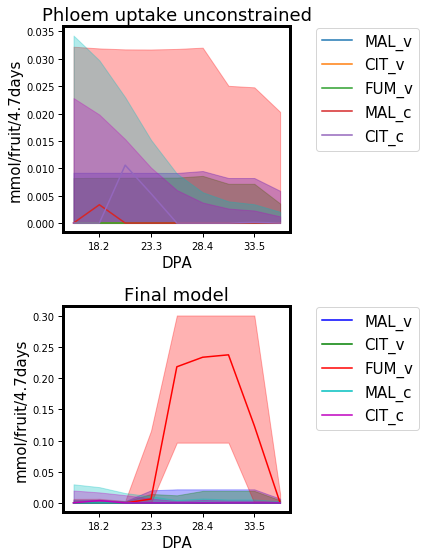

In [132]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(8,8))

met = ["MAL_v","CIT_v"]
colors = {"MAL_v":"b","CIT_v":"g","FUM_v":"r","MAL_c":"c","CIT_c":"m"}

ax1 = plt.subplot(2,1,2)

for m in met:
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(solution2.x_dict.get(m+"_Transfer"+str(i)+str(i+1)))
        error_max.append(cobra_model3.fva.get("maximum").get(m+"_Transfer"+str(i)+str(i+1)))
        error_min.append(cobra_model3.fva.get("minimum").get(m+"_Transfer"+str(i)+str(i+1)))
    ax1.plot(xlist,templist,"-",label=m, color = colors.get(m))
    ax1.fill_between(xlist,error_max,error_min,alpha=0.3,color=colors.get(m))

met = ["FUM_v","MAL_c","CIT_c"]
for m in met:
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(solution2.x_dict.get(m+"_Transfer"+str(i)+str(i+1)))
        #templist2.append(backup3.reactions.get_by_id(m+"_Transfer"+str(i)+str(i+1)).x)
        error_max.append(cobra_model3.fva.get("maximum").get(m+"_Transfer"+str(i)+str(i+1)))
        error_min.append(cobra_model3.fva.get("minimum").get(m+"_Transfer"+str(i)+str(i+1)))
    ax1.plot(xlist,templist,"-",label=m, color = colors.get(m))
    ax1.fill_between(xlist,error_max,error_min,alpha=0.3,color=colors.get(m))


#ax1.set_ylim(-0.1,1.4)
ax1.set_xticklabels(DPA[1:])
ax1.set_xlabel("DPA")
ax1.set_ylabel("mmol/fruit/4.7days")
ax1.legend(bbox_to_anchor=(1.6, 1.03),fontsize=15)
ax1.set_title("Final model")
#plt.plot(xlist,templist2,"o",label=m+" - old")

plt.tick_params(axis="both", which="major", labelsize=10)
    
met = ["MAL_v","CIT_v","FUM_v"]

ax2 = plt.subplot(2,1,1)

for m in met:
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist2.append(TEMP_solution.x_dict.get(m+"_Transfer"+str(i)+str(i+1)))
        error_max.append(cobra_model4.fva.get("maximum").get(m+"_Transfer"+str(i)+str(i+1)))
        error_min.append(cobra_model4.fva.get("minimum").get(m+"_Transfer"+str(i)+str(i+1)))
    ax2.plot(xlist,templist2,"-",label=m)
    ax2.fill_between(xlist,error_max,error_min,alpha=0.3,color=colors.get(m))

met = ["MAL_c","CIT_c"]
for m in met:
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist2.append(TEMP_solution.x_dict.get(m+"_Transfer"+str(i)+str(i+1)))
        error_max.append(cobra_model4.fva.get("maximum").get(m+"_Transfer"+str(i)+str(i+1)))
        error_min.append(cobra_model4.fva.get("minimum").get(m+"_Transfer"+str(i)+str(i+1)))
    ax2.plot(xlist,templist2,"-",label=m)
    ax2.fill_between(xlist,error_max,error_min,alpha=0.3,color=colors.get(m))


#ax2.set_ylim(-0.1,1.4)
ax2.set_xticklabels(DPA[1:])
ax2.set_xlabel("DPA")
ax2.set_ylabel("mmol/fruit/4.7days")
ax2.legend(bbox_to_anchor=(1.6, 1.03),fontsize=15)
ax2.set_title("Phloem uptake unconstrained")
#plt.plot(xlist,templist2,"o",label=m+" - old")

plt.tick_params(axis="both", which="major", labelsize=10)
#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.tight_layout()
plt.show()

### Sugar accumulation rates in old and new models (with and without water potential constraints, respectively)

In [143]:
rxnlist= list()
for i in range(1,10):
    for met in ["SUCROSE_v","GLC_v","FRU_v","SUCROSE_c","GLC_c","FRU_c","STARCH_p"]:
        rxnlist.append(cobra_model2.reactions.get_by_id(met+"_Transfer"+str(i)+str(i+1)))

temp = backup4.copy()
rxnlist2= list()
for i in range(1,10):
    for met in ["SUCROSE_v","GLC_v","FRU_v","SUCROSE_c","GLC_c","FRU_c","STARCH_p"]:
        rxnlist2.append(temp.reactions.get_by_id(met+"_Transfer"+str(i)+str(i+1)))       

        
import time
print(time.ctime())
cobra_model3 = FBA_FVA_run(cobra_model2,cobra_model2.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist)
cobra_model4 = FBA_FVA_run(temp,temp.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist)
print(time.ctime())

Tue Nov  6 14:56:02 2018
Runing pFBA
Setting SOF model
Running FVA
Processing results
Runing pFBA
Setting SOF model
Running FVA
Processing results
Tue Nov  6 14:57:30 2018


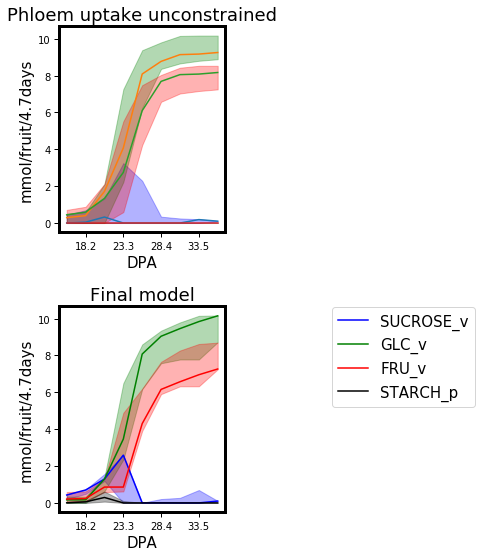

In [144]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

met = ["SUCROSE_v","GLC_v","FRU_v","STARCH_p"]
colors = {"SUCROSE_v":"b","GLC_v":"g","FRU_v":"r","SUCROSE_c":"c","GLC_c":"m","FRU_c":"y","STARCH_p":"black"}

for m in met:
    ax1 = plt.subplot(2,1,2)
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(solution2.x_dict.get(m+"_Transfer"+str(i)+str(i+1)))
        error_max.append(cobra_model3.fva.get("maximum").get(m+"_Transfer"+str(i)+str(i+1)))
        error_min.append(cobra_model3.fva.get("minimum").get(m+"_Transfer"+str(i)+str(i+1)))
        #templist2.append(backup3.reactions.get_by_id(m+"_c_Transfer"+str(i)+str(i+1)).x)
    ax1.plot(xlist,templist,"-",label=m, color = colors.get(m))
    ax1.fill_between(xlist,error_max,error_min,alpha=0.3,color=colors.get(m))
    #ax1.set_ylim(-0.5,4)
    ax1.set_xticklabels(DPA[1:])
    ax1.set_xlabel("DPA")
    ax1.set_ylabel("mmol/fruit/4.7days")
    ax1.legend(bbox_to_anchor=(1.6, 1.03),fontsize=15)
    ax1.set_title("Final model")
    #plt.plot(xlist,templist2,"o",label=m+" - old")

plt.tick_params(axis="both", which="major", labelsize=10)
    
for m in met:
    ax2 = plt.subplot(2,1,1)
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist2.append(TEMP_solution.x_dict.get(m+"_Transfer"+str(i)+str(i+1)))
        error_max.append(cobra_model4.fva.get("maximum").get(m+"_Transfer"+str(i)+str(i+1)))
        error_min.append(cobra_model4.fva.get("minimum").get(m+"_Transfer"+str(i)+str(i+1)))
    #ax1.plot(xlist,templist,"-",label=m+" - new")
    #print(templist2)
    ax2.plot(xlist,templist2,"-",label=m)
    ax2.fill_between(xlist,error_max,error_min,alpha=0.3,color=colors.get(m))
    #ax2.set_ylim(-0.5,4)
    ax2.set_xticklabels(DPA[1:])
    ax2.set_xlabel("DPA")
    ax2.set_ylabel("mmol/fruit/4.7days")
    ax2.set_title("Phloem uptake unconstrained")
    plt.tick_params(axis="both", which="major", labelsize=10)

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.tight_layout()
plt.show()

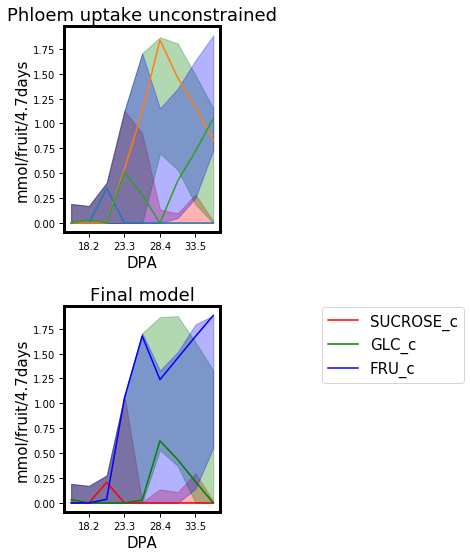

In [141]:


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

met = ["SUCROSE_c","GLC_c","FRU_c"]
colors = {"SUCROSE_c":"r","GLC_c":"g","FRU_c":"b"}

for m in met:
    ax1 = plt.subplot(2,1,2)
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(solution2.x_dict.get(m+"_Transfer"+str(i)+str(i+1)))
        error_max.append(cobra_model3.fva.get("maximum").get(m+"_Transfer"+str(i)+str(i+1)))
        error_min.append(cobra_model3.fva.get("minimum").get(m+"_Transfer"+str(i)+str(i+1)))
    ax1.plot(xlist,templist,"-",label=m, color = colors.get(m))
    ax1.fill_between(xlist,error_max,error_min,alpha=0.3,color=colors.get(m))
    #ax1.set_ylim(-0.5,4)
    ax1.set_xticklabels(DPA[1:])
    ax1.set_xlabel("DPA")
    ax1.set_ylabel("mmol/fruit/4.7days")
    ax1.legend(bbox_to_anchor=(1.6, 1.03),fontsize=15)
    ax1.set_title("Final model")
    #plt.plot(xlist,templist2,"o",label=m+" - old")

plt.tick_params(axis="both", which="major", labelsize=10)
    
for m in met:
    ax2 = plt.subplot(2,1,1)
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist2.append(TEMP_solution.x_dict.get(m+"_Transfer"+str(i)+str(i+1)))
        error_max.append(cobra_model4.fva.get("maximum").get(m+"_Transfer"+str(i)+str(i+1)))
        error_min.append(cobra_model4.fva.get("minimum").get(m+"_Transfer"+str(i)+str(i+1)))
    #ax1.plot(xlist,templist,"-",label=m+" - new")
    #print(templist2)
    ax2.plot(xlist,templist2,"-",label=m)
    ax2.fill_between(xlist,error_max,error_min,alpha=0.3,color=colors.get(m))
    #ax2.set_ylim(-0.5,4)
    ax2.set_xticklabels(DPA[1:])
    ax2.set_xlabel("DPA")
    ax2.set_ylabel("mmol/fruit/4.7days")
    ax2.set_title("Phloem uptake unconstrained")
    plt.tick_params(axis="both", which="major", labelsize=10)

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.tight_layout()
plt.show()

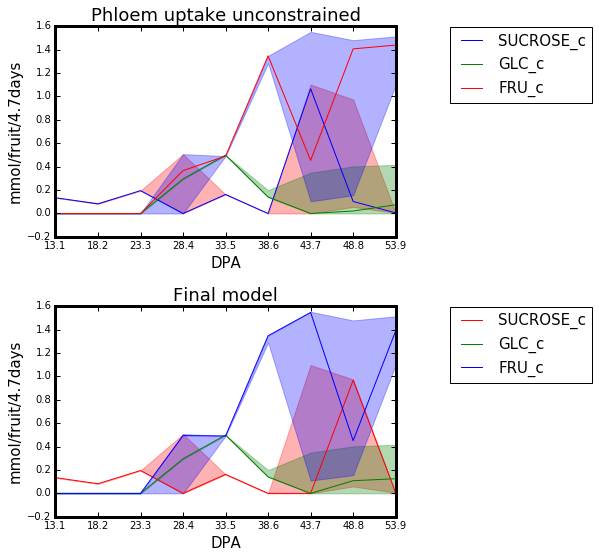

In [1158]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

met = ["SUCROSE_c","GLC_c","FRU_c"]
colors = {"SUCROSE_c":"r","GLC_c":"g","FRU_c":"b"}

for m in met:
    ax1 = plt.subplot(2,1,2)
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(cobra_model3.reactions.get_by_id(m+"_Transfer"+str(i)+str(i+1)).x)
        error_max.append(cobra_model3.fva.get(m+"_Transfer"+str(i)+str(i+1)).get("maximum"))
        error_min.append(cobra_model3.fva.get(m+"_Transfer"+str(i)+str(i+1)).get("minimum"))
        #templist2.append(backup3.reactions.get_by_id(m+"_c_Transfer"+str(i)+str(i+1)).x)
    ax1.plot(xlist,templist,"-",label=m, color = colors.get(m))
    ax1.fill_between(xlist,error_max,error_min,alpha=0.3,color=colors.get(m))
    ax1.set_ylim(-0.2,1.6)
    ax1.set_xticklabels(DPA[1:])
    ax1.set_xlabel("DPA")
    ax1.set_ylabel("mmol/fruit/4.7days")
    ax1.legend(bbox_to_anchor=(1.6, 1.03),fontsize=15)
    ax1.set_title("Final model")
    #plt.plot(xlist,templist2,"o",label=m+" - old")

plt.tick_params(axis="both", which="major", labelsize=10)
    
for m in met:
    ax2 = plt.subplot(2,1,1)
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        #templist.append(cobra_model3.reactions.get_by_id(m+"_c_Transfer"+str(i)+str(i+1)).x)
        templist2.append(temp.reactions.get_by_id(m+"_Transfer"+str(i)+str(i+1)).x)
        error_max.append(cobra_model4.fva.get(m+"_Transfer"+str(i)+str(i+1)).get("maximum"))
        error_min.append(cobra_model4.fva.get(m+"_Transfer"+str(i)+str(i+1)).get("minimum"))
    #ax1.plot(xlist,templist,"-",label=m+" - new")
    #print(templist2)
    ax2.plot(xlist,templist2,"-",label=m)
    ax2.fill_between(xlist,error_max,error_min,alpha=0.3,color=colors.get(m))
    ax2.set_ylim(-0.2,1.6)
    ax2.set_xticklabels(DPA[1:])
    ax2.set_xlabel("DPA")
    ax2.set_ylabel("mmol/fruit/4.7days")
    ax2.set_title("Phloem uptake unconstrained")
    ax2.legend(bbox_to_anchor=(1.6, 1.03),fontsize=15)
    plt.tick_params(axis="both", which="major", labelsize=10)

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.tight_layout()
plt.show()

### Amino-acid accumulation rates in old and new models (with and without water potential constraints, respectively)

KeyError: 'GLN_c_Transfer12'

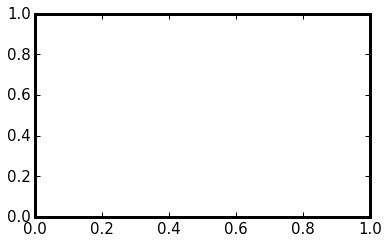

In [1159]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

met = ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","HIS","MET","PRO","TRP","TYR","CYS"]

for m in met:
    ax1 = plt.subplot(2,1,2)
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(cobra_model3.reactions.get_by_id(m+"_c_Transfer"+str(i)+str(i+1)).x)
        #templist2.append(backup3.reactions.get_by_id(m+"_c_Transfer"+str(i)+str(i+1)).x)
    ax1.plot(xlist,templist,"-",label=m+"_c")
    #ax1.set_ylim(-0.1,0.2)
    ax1.set_xticklabels(DPA[1:])
    ax1.set_xlabel("DPA")
    ax1.set_ylabel("mmol/fruit/4.7days")
    #ax1.legend(bbox_to_anchor=(1.83, 1.03),fontsize=15)
    ax1.set_title("Final model")
    #plt.plot(xlist,templist2,"o",label=m+" - old")

plt.tick_params(axis="both", which="major", labelsize=10)
    
for m in met:
    ax2 = plt.subplot(2,1,1)
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        #templist.append(cobra_model3.reactions.get_by_id(m+"_c_Transfer"+str(i)+str(i+1)).x)
        templist2.append(backup4.reactions.get_by_id(m+"_c_Transfer"+str(i)+str(i+1)).x)
    #ax1.plot(xlist,templist,"-",label=m+" - new")
    ax2.plot(xlist,templist2,"-",label=m+"_c")
    #ax2.set_ylim(-1,14)
    ax2.set_xticklabels(DPA[1:])
    ax2.set_xlabel("DPA")
    ax2.set_ylabel("mmol/fruit/4.7days")
    ax2.set_title("Phloem uptake unconstrained")
    ax2.legend(bbox_to_anchor=(1.83, 1.03),fontsize=15)
    plt.tick_params(axis="both", which="major", labelsize=10)

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

met = ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","bHIS","MET","PRO","TRP","TYR","CYS"]

for m in met:
    ax1 = plt.subplot(2,1,2)
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(cobra_model3.reactions.get_by_id(m+"_v_Transfer"+str(i)+str(i+1)).x)
        #templist2.append(backup3.reactions.get_by_id(m+"_c_Transfer"+str(i)+str(i+1)).x)
    ax1.plot(xlist,templist,"-",label=m+"_v")
    #ax1.set_ylim(-1.1,9)
    ax1.set_xticklabels(DPA[1:])
    ax1.set_xlabel("DPA")
    ax1.set_ylabel("mmol/fruit/4.7days")
    #ax1.legend(bbox_to_anchor=(1.8, 1.03),fontsize=15)
    ax1.set_title("Final model")
    plt.tick_params(axis="both", which="major", labelsize=10)
    #plt.plot(xlist,templist2,"o",label=m+" - old")

for m in met:
    ax2 = plt.subplot(2,1,1)
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist2.append(backup4.reactions.get_by_id(m+"_v_Transfer"+str(i)+str(i+1)).x)
    #ax1.plot(xlist,templist,"-",label=m+" - new")
    ax2.plot(xlist,templist2,"-",label=m+"_v")
    #ax2.set_ylim(-1,15)
    ax2.set_xticklabels(DPA[1:])
    ax2.set_xlabel("DPA")
    ax2.set_ylabel("mmol/fruit/4.7days")
    ax2.set_title("Phloem uptake unconstrained")
    ax2.legend(bbox_to_anchor=(1.8, 1.03),fontsize=15)
    plt.tick_params(axis="both", which="major", labelsize=10)

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.tight_layout()
plt.show()

### Print all transfer fluxes

In [724]:
cobra_model3 = cobra_model2.copy()
transfer = set()

for rxn in cobra_model3.reactions.query("Transfer"):
    transfer.add(rxn.id.split("_Transfer")[0])

rxnlist=list()
for x in transfer:
    for i in range(1,10):
        rxnlist.append(cobra_model3.reactions.get_by_id(x+"_Transfer"+str(i)+str(i+1)))

rxnlist2=list()
for x in transfer:
    for i in range(1,10):
        rxnlist2.append(backup4.reactions.get_by_id(x+"_Transfer"+str(i)+str(i+1)))

import time
print(time.ctime())
cobra_model5 = FBA_FVA_run(cobra_model3,cobra_model3.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist)
cobra_model4 = FBA_FVA_run(backup4,backup4.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist2)
print(time.ctime())

Mon Jun  4 18:30:06 2018
Runing pFBA
Setting SOF model
Running FVA
Processing results
Runing pFBA
Setting SOF model
Running FVA
Processing results
Mon Jun  4 18:31:00 2018


In [725]:


for x in transfer:
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MultipleLocator
    import numpy as np
    plt.rcParams.update({'font.size': 10}) #sets a global fontsize
    plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['ytick.major.size'] = 5
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
    plt.figure(figsize=(6,8))
    
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    error_min2 = list()
    error_max2 = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(cobra_model5.reactions.get_by_id(x+"_Transfer"+str(i)+str(i+1)).x)
        error_max.append(round(cobra_model5.fva.get(x+"_Transfer"+str(i)+str(i+1)).get("maximum"),4))
        error_min.append(round(cobra_model5.fva.get(x+"_Transfer"+str(i)+str(i+1)).get("minimum"),4))
        templist2.append(backup4.reactions.get_by_id(x+"_Transfer"+str(i)+str(i+1)).x)
        error_max2.append(round(cobra_model4.fva.get(x+"_Transfer"+str(i)+str(i+1)).get("maximum"),4))
        error_min2.append(round(cobra_model4.fva.get(x+"_Transfer"+str(i)+str(i+1)).get("minimum"),4))
    plt.plot(xlist,templist,"-",label="Final model",color="red")
    plt.plot(xlist,templist2,"-",label="Phloem uptake unconstrained",color="blue")
    plt.xticks(xlist,DPA[1:])
    plt.xlabel("DPA")
    plt.ylabel("mmol/fruit")
    #plt.plot(xlist,templist2,"--",label="default")
    plt.fill_between(xlist,error_max,error_min,alpha=0.3,color="red")
    plt.fill_between(xlist,error_max2,error_min2,alpha=0.3,color="blue")
    plt.legend(loc="best")
    plt.title(x)
    #plt.show()
    plt.savefig("/home/sanu/fruitFluxes_01062018/"+x+".jpg")
    plt.close()



---

In [588]:
#Function to perform FVA analysis which maintains sum of fluxes at a minimal val-
#ue
#args: 1) a cobra model 2) Objective 3) reaction to avoid when constraining sum 
#of fluxes 4) reaction list for FVA
#output: a cobra model with FVA as an attribute called fva
def FBA_FVA_run(cobra_model,obj,rxn2avoid = [],rxnlist=[]):
  if len(rxnlist)==0:
    rxnlist = cobra_model.reactions
  #print("Rxn list ="+str(rxnlist))
  print("Runing pFBA")
  flux_analysis.parsimonious.optimize_minimal_flux(cobra_model,solver="cplex")
  objvalue = obj.x
  a = 0
  for i in cobra_model.reactions:
    a = a + abs(i.x)
  
  sumOfFluxes = a
  
  cobra_model2 = cobra_model.copy()
  irr_model = rev2irrev(cobra_model2)
  print("Setting SOF model")
  sfmodel = constrainSumOfFluxes(irr_model,rxn2avoid,sumOfFluxes,obj)
  rxnlist2 = list()
  for rxn in rxnlist:
    if rxn.lower_bound<0 and rxn.upper_bound>0:
      rxnlist2.append(sfmodel.reactions.get_by_id(rxn.id+"_reverse"))
    rxnlist2.append(sfmodel.reactions.get_by_id(rxn.id))
  #print("Rxn list ="+str(rxnlist2))
  print("Running FVA")
  fva = flux_analysis.flux_variability_analysis(sfmodel,reaction_list = rxnlist2,solver="cplex")
  print("Processing results")
  #print("FVA ="+str(fva))
  FVArxnSet = set()
  tempdict=dict()
  for rxn in fva.keys():
    if FVArxnSet.__contains__(rxn):
      continue
    if rxn.__contains__("reverse"):
      rxn = rxn.replace("_reverse","")
    FVArxnSet.add(rxn)
    if not fva.keys().__contains__(rxn+"_reverse"):
      tempdict[rxn]=fva.get(rxn)
      continue
    FVArxnSet.add(rxn+"_reverse")
    maxi = fva.get(rxn).get("maximum")# + fva.get(rxn+"_reverse").get("minimum")
    mini = fva.get(rxn+"_reverse").get("minimum")# + fva.get(rxn).get("maximum")
    if mini<maxi:
      tempdict[rxn]={"minimum":mini,"maximum":maxi}
    else:
      tempdict[rxn]={"minimum":maxi,"maximum":mini}
  
  sfmodel.fva = fva
  cobra_model.fva = tempdict
  return cobra_model

In [559]:
cobra_model5 = FBA_FVA_run(cobra_model3,cobra_model3.reactions.get_by_id("Final_Biomass_tx"),rxnlist = rxnlist)


0.1972530285162421

In [94]:
cobra_model2.metabolites.get_by_id("KI_v10").reactions

frozenset({<Reaction KI_v_Transfer910 at 0x7f5014feb210>,
           <Reaction K_biomass10 at 0x7f5015786390>,
           <Reaction K_rev_vc10 at 0x7f50158f5590>})

### Osmoles

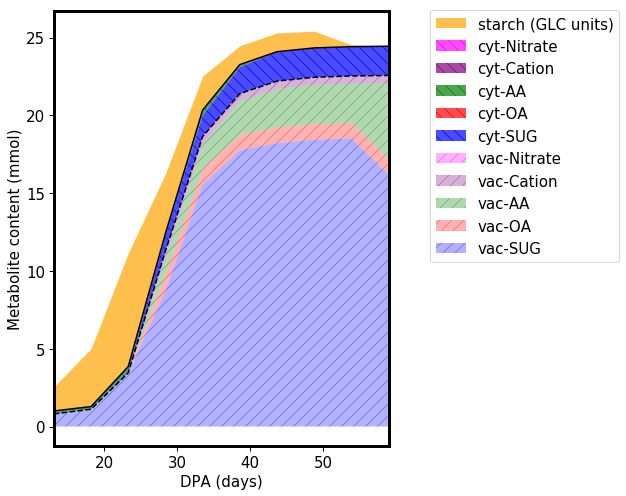

In [129]:
SOL = solution2

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

ax1 = plt.subplot(1,1,1)

xlist = list()
ylist = list()
y2list = list()
y3list = list()
y4list = list()
y5list = list()
y6list = list()
y7list = list()
y8list = list()
y9list = list()
y10list = list()
y11list = list()
y12list = list()
y13list = list()
y14list = list()
for i in range(1,11):
    xlist.append(DPA[i])
    met = cobra_model2.metabolites.get_by_id("WCO_"+str(i))
    rxn = cobra_model2.reactions.get_by_id("WCOsetter_tx"+str(i))
    #print(rxn.x)
    y1 = rxn.metabolites.get(met)*solution2.x_dict.get(rxn.id)*-1
    ylist.append(y1)
    y2 = 0
    y3 = 0
    y4 = 0
    y5 = 0
    y6 = 0
    y7 = 0
    y8 = 0
    y9 = 0
    y10 = 0
    y11 = 0
    y12 = 0
    y13 = 0
    y14 = 0
    for s in ["VO"]:
        for r in cobra_model2.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y2 = y2 + (SOL.x_dict.get(r.id)*r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))))
    y2list.append(y2)
    for s in ["CO"]:
        for r in cobra_model2.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y3 = y3 + abs(SOL.x_dict.get(r.id)*r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))))
    y3list.append(y2+y3)
    for s in ["SUCROSE_v","GLC_v","FRU_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y4 = y4 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y4 = y4 + SOL.x_dict.get(rxn.id)
    y4list.append(y4)
    for s in ["SUCROSE_c","GLC_c","FRU_c"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y5 = y5 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y5 = y5 + SOL.x_dict.get(rxn.id)
    y5list.append(y2+y5)
    for s in ["MAL_v","CIT_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y6 = y6 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y6 = y6 + SOL.x_dict.get(rxn.id)
    y6list.append(y4+y6)
    for s in ["MAL_c","CIT_c"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y7 = y7 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y7 = y7 + SOL.x_dict.get(rxn.id)
    y7list.append(y2+y5+y7)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","bHIS","MET","PRO","TRP","TYR","CYS"]:
        #if s == "GLN" or s=="LEU" or s=="CYS":
        #    continue
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_v_Transfer"+str(i)+str(i+1))
            y8 = y8 + SOL.x_dict.get(rxn.id)
        else:
            if s=="bHIS":
                s="HIS"
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_v_tx10")
            y8 = y8 + SOL.x_dict.get(rxn.id)            
    y8list.append(y4+y6+y8)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","HIS","MET","PRO","TRP","TYR","CYS"]:
        #if s == "GLN" or s=="LEU" or s=="CYS":
        #    continue
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_c_Transfer"+str(i)+str(i+1))
            y9 = y9 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_c_tx10")
            y9 = y9 + SOL.x_dict.get(rxn.id)            
    y9list.append(y2+y5+y7+y9)
    for s in ["STARCH_p"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y10 = y10 + SOL.x_dict.get(rxn.id)
        else:
            #rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            #y10 = y10 + rxn.x 
            y10 = 0
    y10list.append(y1+y10)
    for s in ["KI_v","MGII_v","CAII_v","AMMONIUM_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y11 = y11 + SOL.x_dict.get(rxn.id)
        else:
            if s=="KI_v":
                y11 = y11 + SOL.x_dict.get("K_biomass10")
            elif s=="MGII_v":
                y11 = y11 + SOL.x_dict.get("Mg_biomass10")
            elif s=="CAII_v":
                y11 = y11 + SOL.x_dict.get("Ca_biomass10")     
            else:
                y11 = y11 + 0
    y11list.append(y4+y6+y8+y11)
    for s in ["KI","MGII","CAII"]:
        if i!=10:
            y12 = y12 + 0
    #        rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
    #        y12 = y12 + solution2.x_dict.get(rxn.id)
        else:
            y12 = y12 + SOL.x_dict.get(s+"_biomass_c10")
    y12list.append(y2+y5+y7+y9+y12)
    for s in ["NITRATE_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y13 = y13 + SOL.x_dict.get(rxn.id)
        else:
            y13 = y13 + SOL.x_dict.get("NITRATE_biomass10")        
    y13list.append(y4+y6+y8+y11+y13)
    for s in ["NITRATE_c"]:
        if i!=10:
            y14 = y14 + 0
            #rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            #y14 = y14 + solution2.x_dict.get(rxn.id)
        else:
            y14 = y14 + SOL.x_dict.get("NITRATE_biomass_c10")        
    y14list.append(y2+y5+y7+y9+y12+y14)
    

ax1.plot(xlist,y3list,"-",color="black")
ax1.plot(xlist,y2list,"--",color="black")
#ax1.fill_between(xlist,y2list,alpha=0.1,color="grey",label="vacuolar contribution",linewidth=0)
ax1.fill_between(xlist,y4list,alpha=0.3,color="blue",label="vac-SUG",hatch="//",linewidth=0)
ax1.fill_between(xlist,y4list,y6list,alpha=0.3,color="red",label="vac-OA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y6list,y8list,alpha=0.3,color="green",label="vac-AA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y8list,y11list,alpha=0.3,color="purple",label="vac-Cation",hatch="//",linewidth=0)
ax1.fill_between(xlist,y11list,y13list,alpha=0.3,color="magenta",label="vac-Nitrate",hatch="//",linewidth=0)
#ax1.fill_between(xlist,y2list,y3list,alpha=0.1,color="white",label="cytosolic contribution",linewidth=0)
ax1.fill_between(xlist,y2list,y5list,alpha=0.7,color="blue",label="cyt-SUG",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y5list,y7list,alpha=0.7,color="red",label="cyt-OA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y7list,y9list,alpha=0.7,color="green",label="cyt-AA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y9list,y12list,alpha=0.7,color="purple",label="cyt-Cation",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y12list,y14list,alpha=0.7,color="magenta",label="cyt-Nitrate",hatch="\\\\",linewidth=0)
#ax1.fill_between(xlist,y9list,y10list,alpha=0.3,color="black",label="starch",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,ylist,y10list,alpha=0.7,color="orange",label="starch (GLC units)",linewidth=0)

handles, labels = plt.gca().get_legend_handles_labels()
labels.reverse()
handles.reverse()
lgd=plt.legend(handles,labels,bbox_to_anchor=(1.1, 1.02),fontsize=15)
plt.ylabel("Metabolite content (mmol)")
plt.xlabel("DPA (days)")
plt.xlim(DPA[1],DPA[10])
#plt.xlim(DPA[1],20)
#plt.ylim(0,1.2)
plt.show()

### Phytol and Lycopene constraints removed

In [130]:
temp_model = cobra_model2.copy()
for i in range(1,11):
    rxn = temp_model.reactions.get_by_id("Lycopene_biomass_demand_tx"+str(i))
    rxn.lower_bound = 0
    rxn.upper_bound = 0
    rxn = temp_model.reactions.get_by_id("Phytol_biomass_demand_tx"+str(i))
    rxn.lower_bound = 0
    rxn.upper_bound = 0

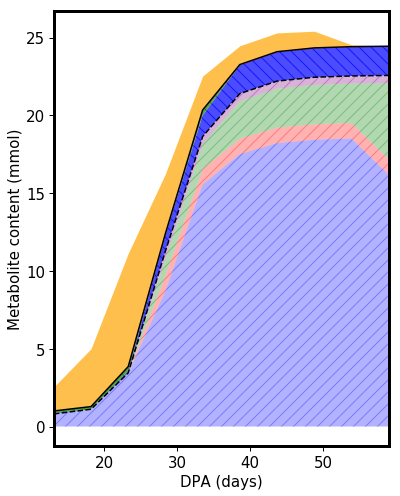

In [131]:
SOLtemp = pfba_Weighted(temp_model,weightings)
SOL = SOLtemp

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

ax1 = plt.subplot(1,1,1)

xlist = list()
ylist = list()
y2list = list()
y3list = list()
y4list = list()
y5list = list()
y6list = list()
y7list = list()
y8list = list()
y9list = list()
y10list = list()
y11list = list()
y12list = list()
y13list = list()
y14list = list()
for i in range(1,11):
    xlist.append(DPA[i])
    met = cobra_model2.metabolites.get_by_id("WCO_"+str(i))
    rxn = cobra_model2.reactions.get_by_id("WCOsetter_tx"+str(i))
    #print(rxn.x)
    y1 = rxn.metabolites.get(met)*solution2.x_dict.get(rxn.id)*-1
    ylist.append(y1)
    y2 = 0
    y3 = 0
    y4 = 0
    y5 = 0
    y6 = 0
    y7 = 0
    y8 = 0
    y9 = 0
    y10 = 0
    y11 = 0
    y12 = 0
    y13 = 0
    y14 = 0
    for s in ["VO"]:
        for r in cobra_model2.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y2 = y2 + (SOL.x_dict.get(r.id)*r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))))
    y2list.append(y2)
    for s in ["CO"]:
        for r in cobra_model2.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y3 = y3 + abs(SOL.x_dict.get(r.id)*r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))))
    y3list.append(y2+y3)
    for s in ["SUCROSE_v","GLC_v","FRU_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y4 = y4 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y4 = y4 + SOL.x_dict.get(rxn.id)
    y4list.append(y4)
    for s in ["SUCROSE_c","GLC_c","FRU_c"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y5 = y5 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y5 = y5 + SOL.x_dict.get(rxn.id)
    y5list.append(y2+y5)
    for s in ["MAL_v","CIT_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y6 = y6 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y6 = y6 + SOL.x_dict.get(rxn.id)
    y6list.append(y4+y6)
    for s in ["MAL_c","CIT_c"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y7 = y7 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y7 = y7 + SOL.x_dict.get(rxn.id)
    y7list.append(y2+y5+y7)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","bHIS","MET","PRO","TRP","TYR","CYS"]:
        #if s == "GLN" or s=="LEU" or s=="CYS":
        #    continue
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_v_Transfer"+str(i)+str(i+1))
            y8 = y8 + SOL.x_dict.get(rxn.id)
        else:
            if s=="bHIS":
                s="HIS"
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_v_tx10")
            y8 = y8 + SOL.x_dict.get(rxn.id)            
    y8list.append(y4+y6+y8)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","HIS","MET","PRO","TRP","TYR","CYS"]:
        #if s == "GLN" or s=="LEU" or s=="CYS":
        #    continue
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_c_Transfer"+str(i)+str(i+1))
            y9 = y9 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_c_tx10")
            y9 = y9 + SOL.x_dict.get(rxn.id)            
    y9list.append(y2+y5+y7+y9)
    for s in ["STARCH_p"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y10 = y10 + SOL.x_dict.get(rxn.id)
        else:
            #rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            #y10 = y10 + rxn.x 
            y10 = 0
    y10list.append(y1+y10)
    for s in ["KI_v","MGII_v","CAII_v","AMMONIUM_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y11 = y11 + SOL.x_dict.get(rxn.id)
        else:
            if s=="KI_v":
                y11 = y11 + SOL.x_dict.get("K_biomass10")
            elif s=="MGII_v":
                y11 = y11 + SOL.x_dict.get("Mg_biomass10")
            elif s=="CAII_v":
                y11 = y11 + SOL.x_dict.get("Ca_biomass10")     
            else:
                y11 = y11 + 0
    y11list.append(y4+y6+y8+y11)
    for s in ["KI","MGII","CAII"]:
        if i!=10:
            y12 = y12 + 0
    #        rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
    #        y12 = y12 + solution2.x_dict.get(rxn.id)
        else:
            y12 = y12 + SOL.x_dict.get(s+"_biomass_c10")
    y12list.append(y2+y5+y7+y9+y12)
    for s in ["NITRATE_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y13 = y13 + SOL.x_dict.get(rxn.id)
        else:
            y13 = y13 + SOL.x_dict.get("NITRATE_biomass10")        
    y13list.append(y4+y6+y8+y11+y13)
    for s in ["NITRATE_c"]:
        if i!=10:
            y14 = y14 + 0
            #rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            #y14 = y14 + solution2.x_dict.get(rxn.id)
        else:
            y14 = y14 + SOL.x_dict.get("NITRATE_biomass_c10")        
    y14list.append(y2+y5+y7+y9+y12+y14)
    

ax1.plot(xlist,y3list,"-",color="black")
ax1.plot(xlist,y2list,"--",color="black")
#ax1.fill_between(xlist,y2list,alpha=0.1,color="grey",label="vacuolar contribution",linewidth=0)
ax1.fill_between(xlist,y4list,alpha=0.3,color="blue",label="vac-SUG",hatch="//",linewidth=0)
ax1.fill_between(xlist,y4list,y6list,alpha=0.3,color="red",label="vac-OA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y6list,y8list,alpha=0.3,color="green",label="vac-AA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y8list,y11list,alpha=0.3,color="purple",label="vac-Cation",hatch="//",linewidth=0)
ax1.fill_between(xlist,y11list,y13list,alpha=0.3,color="magenta",label="vac-Nitrate",hatch="//",linewidth=0)
#ax1.fill_between(xlist,y2list,y3list,alpha=0.1,color="white",label="cytosolic contribution",linewidth=0)
ax1.fill_between(xlist,y2list,y5list,alpha=0.7,color="blue",label="cyt-SUG",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y5list,y7list,alpha=0.7,color="red",label="cyt-OA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y7list,y9list,alpha=0.7,color="green",label="cyt-AA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y9list,y12list,alpha=0.7,color="purple",label="cyt-Cation",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y12list,y14list,alpha=0.7,color="magenta",label="cyt-Nitrate",hatch="\\\\",linewidth=0)
#ax1.fill_between(xlist,y9list,y10list,alpha=0.3,color="black",label="starch",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,ylist,y10list,alpha=0.7,color="orange",label="starch (GLC moles)",linewidth=0)
#plt.legend(bbox_to_anchor=(1.50, 1.02),fontsize=15)
plt.ylabel("Metabolite content (mmol)")
plt.xlabel("DPA (days)")
plt.xlim(DPA[1],DPA[10])
#plt.xlim(DPA[1],20)
#plt.ylim(0,1.2)
plt.show()

In [132]:
diff = 0
for rxn in cobra_model2.reactions:
    diff = diff + abs(solution2.x_dict.get(rxn.id) - SOLtemp.x_dict.get(rxn.id))
print diff

SOF = 0
for rxn in cobra_model2.reactions:
    SOF = SOF + abs(solution2.x_dict.get(rxn.id))
print SOF

SOF2 = 0
for rxn in cobra_model2.reactions:
    SOF2 = SOF2 + abs(SOLtemp.x_dict.get(rxn.id))
print SOF2

198.98649053187006
3897.8848402240574
3897.387216086785


In [133]:
diff/SOF

0.051049863884750364

In [134]:
import cobra
cobra.__version__

'0.13.4'

### Phloem uptake constraint removed

In [135]:
temp_model2 = temp_model.copy()
for i in range(1,11):
    temp_model2.reactions.get_by_id("Phloem_uptake_tx"+str(i)).upper_bound = 1000
    temp_model2.reactions.get_by_id("Phloem_uptake_tx"+str(i)).lower_bound = 0

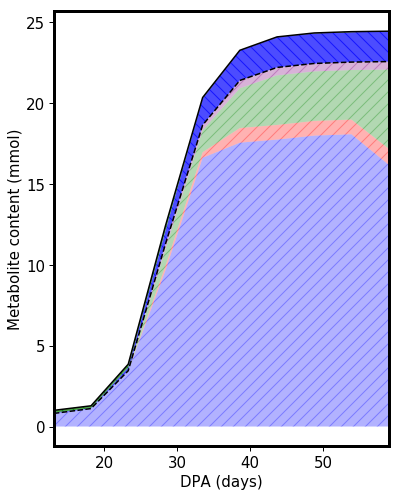

In [136]:
SOL = pfba_Weighted(temp_model2,weightings)

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

ax1 = plt.subplot(1,1,1)

xlist = list()
ylist = list()
y2list = list()
y3list = list()
y4list = list()
y5list = list()
y6list = list()
y7list = list()
y8list = list()
y9list = list()
y10list = list()
y11list = list()
y12list = list()
y13list = list()
y14list = list()
for i in range(1,11):
    xlist.append(DPA[i])
    met = cobra_model2.metabolites.get_by_id("WCO_"+str(i))
    rxn = cobra_model2.reactions.get_by_id("WCOsetter_tx"+str(i))
    #print(rxn.x)
    y1 = rxn.metabolites.get(met)*solution2.x_dict.get(rxn.id)*-1
    ylist.append(y1)
    y2 = 0
    y3 = 0
    y4 = 0
    y5 = 0
    y6 = 0
    y7 = 0
    y8 = 0
    y9 = 0
    y10 = 0
    y11 = 0
    y12 = 0
    y13 = 0
    y14 = 0
    for s in ["VO"]:
        for r in cobra_model2.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y2 = y2 + (SOL.x_dict.get(r.id)*r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))))
    y2list.append(y2)
    for s in ["CO"]:
        for r in cobra_model2.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y3 = y3 + abs(SOL.x_dict.get(r.id)*r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))))
    y3list.append(y2+y3)
    for s in ["SUCROSE_v","GLC_v","FRU_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y4 = y4 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y4 = y4 + SOL.x_dict.get(rxn.id)
    y4list.append(y4)
    for s in ["SUCROSE_c","GLC_c","FRU_c"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y5 = y5 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y5 = y5 + SOL.x_dict.get(rxn.id)
    y5list.append(y2+y5)
    for s in ["MAL_v","CIT_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y6 = y6 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y6 = y6 + SOL.x_dict.get(rxn.id)
    y6list.append(y4+y6)
    for s in ["MAL_c","CIT_c"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y7 = y7 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y7 = y7 + SOL.x_dict.get(rxn.id)
    y7list.append(y2+y5+y7)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","bHIS","MET","PRO","TRP","TYR","CYS"]:
        #if s == "GLN" or s=="LEU" or s=="CYS":
        #    continue
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_v_Transfer"+str(i)+str(i+1))
            y8 = y8 + SOL.x_dict.get(rxn.id)
        else:
            if s=="bHIS":
                s="HIS"
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_v_tx10")
            y8 = y8 + SOL.x_dict.get(rxn.id)            
    y8list.append(y4+y6+y8)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","HIS","MET","PRO","TRP","TYR","CYS"]:
        #if s == "GLN" or s=="LEU" or s=="CYS":
        #    continue
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_c_Transfer"+str(i)+str(i+1))
            y9 = y9 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_c_tx10")
            y9 = y9 + SOL.x_dict.get(rxn.id)            
    y9list.append(y2+y5+y7+y9)
    for s in ["STARCH_p"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y10 = y10 + SOL.x_dict.get(rxn.id)
        else:
            #rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            #y10 = y10 + rxn.x 
            y10 = 0
    y10list.append(y1+y10)
    for s in ["KI_v","MGII_v","CAII_v","AMMONIUM_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y11 = y11 + SOL.x_dict.get(rxn.id)
        else:
            if s=="KI_v":
                y11 = y11 + SOL.x_dict.get("K_biomass10")
            elif s=="MGII_v":
                y11 = y11 + SOL.x_dict.get("Mg_biomass10")
            elif s=="CAII_v":
                y11 = y11 + SOL.x_dict.get("Ca_biomass10")     
            else:
                y11 = y11 + 0
    y11list.append(y4+y6+y8+y11)
    for s in ["KI","MGII","CAII"]:
        if i!=10:
            y12 = y12 + 0
    #        rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
    #        y12 = y12 + solution2.x_dict.get(rxn.id)
        else:
            y12 = y12 + SOL.x_dict.get(s+"_biomass_c10")
    y12list.append(y2+y5+y7+y9+y12)
    for s in ["NITRATE_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y13 = y13 + SOL.x_dict.get(rxn.id)
        else:
            y13 = y13 + SOL.x_dict.get("NITRATE_biomass10")        
    y13list.append(y4+y6+y8+y11+y13)
    for s in ["NITRATE_c"]:
        if i!=10:
            y14 = y14 + 0
            #rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            #y14 = y14 + solution2.x_dict.get(rxn.id)
        else:
            y14 = y14 + SOL.x_dict.get("NITRATE_biomass_c10")        
    y14list.append(y2+y5+y7+y9+y12+y14)
    

ax1.plot(xlist,y3list,"-",color="black")
ax1.plot(xlist,y2list,"--",color="black")
#ax1.fill_between(xlist,y2list,alpha=0.1,color="grey",label="vacuolar contribution",linewidth=0)
ax1.fill_between(xlist,y4list,alpha=0.3,color="blue",label="vac-SUG",hatch="//",linewidth=0)
ax1.fill_between(xlist,y4list,y6list,alpha=0.3,color="red",label="vac-OA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y6list,y8list,alpha=0.3,color="green",label="vac-AA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y8list,y11list,alpha=0.3,color="purple",label="vac-Cation",hatch="//",linewidth=0)
ax1.fill_between(xlist,y11list,y13list,alpha=0.3,color="magenta",label="vac-Nitrate",hatch="//",linewidth=0)
#ax1.fill_between(xlist,y2list,y3list,alpha=0.1,color="white",label="cytosolic contribution",linewidth=0)
ax1.fill_between(xlist,y2list,y5list,alpha=0.7,color="blue",label="cyt-SUG",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y5list,y7list,alpha=0.7,color="red",label="cyt-OA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y7list,y9list,alpha=0.7,color="green",label="cyt-AA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y9list,y12list,alpha=0.7,color="purple",label="cyt-Cation",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y12list,y14list,alpha=0.7,color="magenta",label="cyt-Nitrate",hatch="\\\\",linewidth=0)
#ax1.fill_between(xlist,y9list,y10list,alpha=0.3,color="black",label="starch",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,ylist,y10list,alpha=0.7,color="orange",label="starch (GLC moles)",linewidth=0)
#plt.legend(bbox_to_anchor=(1.50, 1.02),fontsize=15)
plt.ylabel("Metabolite content (mmol)")
plt.xlabel("DPA (days)")
plt.xlim(DPA[1],DPA[10])
#plt.xlim(DPA[1],20)
#plt.ylim(0,1.2)
plt.show()

### Phloem uptake and osmolarity constraint removed

In [137]:
temp_model3 = temp_model2.copy()
for i in range(1,11):
    temp_model3.reactions.get_by_id("Phloem_uptake_tx"+str(i)).upper_bound = 1000
    temp_model3.reactions.get_by_id("Phloem_uptake_tx"+str(i)).lower_bound = 0
    temp_model3.metabolites.get_by_id("VO_"+str(i)).remove_from_model()
    temp_model3.metabolites.get_by_id("CO_"+str(i)).remove_from_model()
    temp_model3.metabolites.get_by_id("CC_v"+str(i)).remove_from_model()
    temp_model3.metabolites.get_by_id("CC_c"+str(i)).remove_from_model()

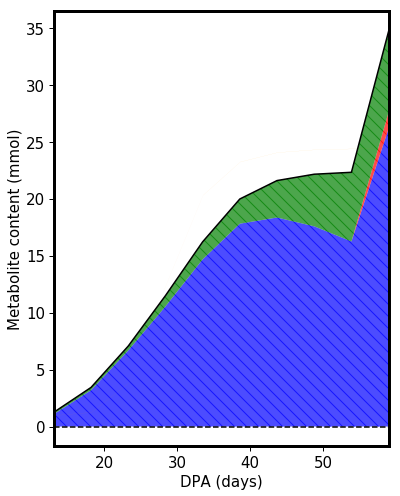

In [138]:
SOL = pfba_Weighted(temp_model3,weightings)

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

ax1 = plt.subplot(1,1,1)

xlist = list()
ylist = list()
y2list = list()
y3list = list()
y4list = list()
y5list = list()
y6list = list()
y7list = list()
y8list = list()
y9list = list()
y10list = list()
y11list = list()
y12list = list()
y13list = list()
y14list = list()
for i in range(1,11):
    xlist.append(DPA[i])
    met = cobra_model2.metabolites.get_by_id("WCO_"+str(i))
    rxn = cobra_model2.reactions.get_by_id("WCOsetter_tx"+str(i))
    #print(rxn.x)
    y1 = rxn.metabolites.get(met)*solution2.x_dict.get(rxn.id)*-1
    ylist.append(y1)
    y2 = 0
    y3 = 0
    y4 = 0
    y5 = 0
    y6 = 0
    y7 = 0
    y8 = 0
    y9 = 0
    y10 = 0
    y11 = 0
    y12 = 0
    y13 = 0
    y14 = 0
    for s in ["VO"]:
        for r in cobra_model2.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y2 = y2 + (SOL.x_dict.get(r.id)*r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))))
    y2list.append(y2)
    for s in ["CO"]:
        for r in cobra_model2.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y3 = y3 + abs(SOL.x_dict.get(r.id)*r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))))
    y3list.append(y2+y3)
    for s in ["SUCROSE_v","GLC_v","FRU_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y4 = y4 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y4 = y4 + SOL.x_dict.get(rxn.id)
    y4list.append(y4)
    for s in ["SUCROSE_c","GLC_c","FRU_c"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y5 = y5 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y5 = y5 + SOL.x_dict.get(rxn.id)
    y5list.append(y2+y5)
    for s in ["MAL_v","CIT_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y6 = y6 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y6 = y6 + SOL.x_dict.get(rxn.id)
    y6list.append(y4+y6)
    for s in ["MAL_c","CIT_c"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y7 = y7 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y7 = y7 + SOL.x_dict.get(rxn.id)
    y7list.append(y2+y5+y7)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","bHIS","MET","PRO","TRP","TYR","CYS"]:
        #if s == "GLN" or s=="LEU" or s=="CYS":
        #    continue
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_v_Transfer"+str(i)+str(i+1))
            y8 = y8 + SOL.x_dict.get(rxn.id)
        else:
            if s=="bHIS":
                s="HIS"
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_v_tx10")
            y8 = y8 + SOL.x_dict.get(rxn.id)            
    y8list.append(y4+y6+y8)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","HIS","MET","PRO","TRP","TYR","CYS"]:
        #if s == "GLN" or s=="LEU" or s=="CYS":
        #    continue
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_c_Transfer"+str(i)+str(i+1))
            y9 = y9 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_c_tx10")
            y9 = y9 + SOL.x_dict.get(rxn.id)            
    y9list.append(y2+y5+y7+y9)
    for s in ["STARCH_p"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y10 = y10 + SOL.x_dict.get(rxn.id)
        else:
            #rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            #y10 = y10 + rxn.x 
            y10 = 0
    y10list.append(y1+y10)
    for s in ["KI_v","MGII_v","CAII_v","AMMONIUM_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y11 = y11 + SOL.x_dict.get(rxn.id)
        else:
            if s=="KI_v":
                y11 = y11 + SOL.x_dict.get("K_biomass10")
            elif s=="MGII_v":
                y11 = y11 + SOL.x_dict.get("Mg_biomass10")
            elif s=="CAII_v":
                y11 = y11 + SOL.x_dict.get("Ca_biomass10")     
            else:
                y11 = y11 + 0
    y11list.append(y4+y6+y8+y11)
    for s in ["KI","MGII","CAII"]:
        if i!=10:
            y12 = y12 + 0
    #        rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
    #        y12 = y12 + solution2.x_dict.get(rxn.id)
        else:
            y12 = y12 + SOL.x_dict.get(s+"_biomass_c10")
    y12list.append(y2+y5+y7+y9+y12)
    for s in ["NITRATE_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y13 = y13 + SOL.x_dict.get(rxn.id)
        else:
            y13 = y13 + SOL.x_dict.get("NITRATE_biomass10")        
    y13list.append(y4+y6+y8+y11+y13)
    for s in ["NITRATE_c"]:
        if i!=10:
            y14 = y14 + 0
            #rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            #y14 = y14 + solution2.x_dict.get(rxn.id)
        else:
            y14 = y14 + SOL.x_dict.get("NITRATE_biomass_c10")        
    y14list.append(y2+y5+y7+y9+y12+y14)
    

ax1.plot(xlist,y3list,"-",color="black")
ax1.plot(xlist,y2list,"--",color="black")
#ax1.fill_between(xlist,y2list,alpha=0.1,color="grey",label="vacuolar contribution",linewidth=0)
ax1.fill_between(xlist,y4list,alpha=0.3,color="blue",label="vac-SUG",hatch="//",linewidth=0)
ax1.fill_between(xlist,y4list,y6list,alpha=0.3,color="red",label="vac-OA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y6list,y8list,alpha=0.3,color="green",label="vac-AA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y8list,y11list,alpha=0.3,color="purple",label="vac-Cation",hatch="//",linewidth=0)
ax1.fill_between(xlist,y11list,y13list,alpha=0.3,color="magenta",label="vac-Nitrate",hatch="//",linewidth=0)
#ax1.fill_between(xlist,y2list,y3list,alpha=0.1,color="white",label="cytosolic contribution",linewidth=0)
ax1.fill_between(xlist,y2list,y5list,alpha=0.7,color="blue",label="cyt-SUG",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y5list,y7list,alpha=0.7,color="red",label="cyt-OA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y7list,y9list,alpha=0.7,color="green",label="cyt-AA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y9list,y12list,alpha=0.7,color="purple",label="cyt-Cation",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y12list,y14list,alpha=0.7,color="magenta",label="cyt-Nitrate",hatch="\\\\",linewidth=0)
#ax1.fill_between(xlist,y9list,y10list,alpha=0.3,color="black",label="starch",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,ylist,y10list,alpha=0.7,color="orange",label="starch (GLC moles)",linewidth=0)
#plt.legend(bbox_to_anchor=(1.50, 1.02),fontsize=15)
plt.ylabel("Metabolite content (mmol)")
plt.xlabel("DPA (days)")
plt.xlim(DPA[1],DPA[10])
#plt.xlim(DPA[1],20)
#plt.ylim(0,1.2)
plt.show()

### Removing biomass constraints

In [200]:
tempList[0:4]+tempList[5:6]+tempList[8:9]+tempList[10:13]

['MET_c',
 'THR_c',
 'HIS_c',
 'LYS_c',
 'CYS_c',
 'SER_c',
 'GLT_c',
 'ARG_c',
 'L_ALPHA_ALANINE_c']

In [199]:
temp_model4 = temp_model3.copy()
for i in range(1,11):
    rxn = temp_model3.reactions.get_by_id("Protein_biomass_demand_tx"+str(i))
    rxn.lower_bound = 0
    rxn.upper_bound = 0
    rxn = temp_model3.reactions.get_by_id("phospholipid_accumulation"+str(i))
    rxn.lower_bound = 0
    rxn.upper_bound = 0
    rxn = temp_model3.reactions.get_by_id("CELLULOSE_accumulation"+str(i))
    rxn.lower_bound = 0
    rxn.upper_bound = 0

tempList = list()
for met in temp_model4.reactions.get_by_id("Phloem_uptake_tx1").metabolites.keys():
    if "PROTON" in met.id or "SUCROSE" in met.id or "GLC" in met.id or "FRU" in met.id:
        continue
    tempList.append(met.id[0:len(met.id)-1])
    
for Met in tempList[0:4]+tempList[5:6]+tempList[8:9]+tempList[10:13]:
    for i in range(1,11):
        met = temp_model4.metabolites.get_by_id(Met+str(i))
        rxn = temp_model4.reactions.get_by_id("Phloem_uptake_tx"+str(i))
        coeff = rxn.metabolites.get(met)
        rxn.add_metabolites({met:-1*coeff})

SOL = pfba_Weighted(temp_model4,weightings)
print(SOL.f)

140980.096394


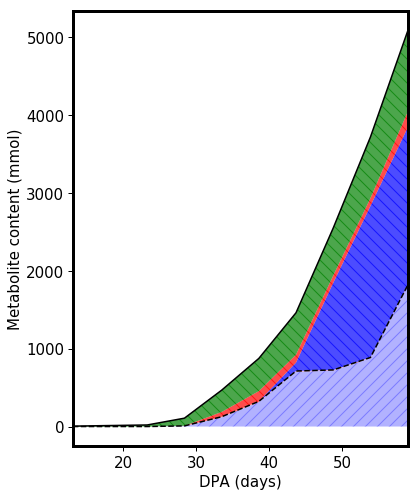

In [201]:
SOL = pfba_Weighted(temp_model4,weightings)

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

ax1 = plt.subplot(1,1,1)

xlist = list()
ylist = list()
y2list = list()
y3list = list()
y4list = list()
y5list = list()
y6list = list()
y7list = list()
y8list = list()
y9list = list()
y10list = list()
y11list = list()
y12list = list()
y13list = list()
y14list = list()
for i in range(1,11):
    xlist.append(DPA[i])
    met = cobra_model2.metabolites.get_by_id("WCO_"+str(i))
    rxn = cobra_model2.reactions.get_by_id("WCOsetter_tx"+str(i))
    #print(rxn.x)
    y1 = rxn.metabolites.get(met)*solution2.x_dict.get(rxn.id)*-1
    ylist.append(y1)
    y2 = 0
    y3 = 0
    y4 = 0
    y5 = 0
    y6 = 0
    y7 = 0
    y8 = 0
    y9 = 0
    y10 = 0
    y11 = 0
    y12 = 0
    y13 = 0
    y14 = 0
    for s in ["VO"]:
        for r in cobra_model2.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y2 = y2 + (SOL.x_dict.get(r.id)*r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))))
    y2list.append(y2)
    for s in ["CO"]:
        for r in cobra_model2.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y3 = y3 + abs(SOL.x_dict.get(r.id)*r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))))
    y3list.append(y2+y3)
    for s in ["SUCROSE_v","GLC_v","FRU_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y4 = y4 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y4 = y4 + SOL.x_dict.get(rxn.id)
    y4list.append(y4)
    for s in ["SUCROSE_c","GLC_c","FRU_c"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y5 = y5 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y5 = y5 + SOL.x_dict.get(rxn.id)
    y5list.append(y2+y5)
    for s in ["MAL_v","CIT_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y6 = y6 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y6 = y6 + SOL.x_dict.get(rxn.id)
    y6list.append(y4+y6)
    for s in ["MAL_c","CIT_c"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y7 = y7 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y7 = y7 + SOL.x_dict.get(rxn.id)
    y7list.append(y2+y5+y7)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","bHIS","MET","PRO","TRP","TYR","CYS"]:
        #if s == "GLN" or s=="LEU" or s=="CYS":
        #    continue
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_v_Transfer"+str(i)+str(i+1))
            y8 = y8 + SOL.x_dict.get(rxn.id)
        else:
            if s=="bHIS":
                s="HIS"
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_v_tx10")
            y8 = y8 + SOL.x_dict.get(rxn.id)            
    y8list.append(y4+y6+y8)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","HIS","MET","PRO","TRP","TYR","CYS"]:
        #if s == "GLN" or s=="LEU" or s=="CYS":
        #    continue
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_c_Transfer"+str(i)+str(i+1))
            y9 = y9 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_c_tx10")
            y9 = y9 + SOL.x_dict.get(rxn.id)            
    y9list.append(y2+y5+y7+y9)
    for s in ["STARCH_p"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y10 = y10 + SOL.x_dict.get(rxn.id)
        else:
            #rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            #y10 = y10 + rxn.x 
            y10 = 0
    y10list.append(y1+y10)
    for s in ["KI_v","MGII_v","CAII_v","AMMONIUM_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y11 = y11 + SOL.x_dict.get(rxn.id)
        else:
            if s=="KI_v":
                y11 = y11 + SOL.x_dict.get("K_biomass10")
            elif s=="MGII_v":
                y11 = y11 + SOL.x_dict.get("Mg_biomass10")
            elif s=="CAII_v":
                y11 = y11 + SOL.x_dict.get("Ca_biomass10")     
            else:
                y11 = y11 + 0
    y11list.append(y4+y6+y8+y11)
    for s in ["KI","MGII","CAII"]:
        if i!=10:
            y12 = y12 + 0
    #        rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
    #        y12 = y12 + solution2.x_dict.get(rxn.id)
        else:
            y12 = y12 + SOL.x_dict.get(s+"_biomass_c10")
    y12list.append(y2+y5+y7+y9+y12)
    for s in ["NITRATE_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y13 = y13 + SOL.x_dict.get(rxn.id)
        else:
            y13 = y13 + SOL.x_dict.get("NITRATE_biomass10")        
    y13list.append(y4+y6+y8+y11+y13)
    for s in ["NITRATE_c"]:
        if i!=10:
            y14 = y14 + 0
            #rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            #y14 = y14 + solution2.x_dict.get(rxn.id)
        else:
            y14 = y14 + SOL.x_dict.get("NITRATE_biomass_c10")        
    y14list.append(y2+y5+y7+y9+y12+y14)
    

ax1.plot(xlist,y3list,"-",color="black")
ax1.plot(xlist,y2list,"--",color="black")
#ax1.fill_between(xlist,y2list,alpha=0.1,color="grey",label="vacuolar contribution",linewidth=0)
ax1.fill_between(xlist,y4list,alpha=0.3,color="blue",label="vac-SUG",hatch="//",linewidth=0)
ax1.fill_between(xlist,y4list,y6list,alpha=0.3,color="red",label="vac-OA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y6list,y8list,alpha=0.3,color="green",label="vac-AA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y8list,y11list,alpha=0.3,color="purple",label="vac-Cation",hatch="//",linewidth=0)
ax1.fill_between(xlist,y11list,y13list,alpha=0.3,color="magenta",label="vac-Nitrate",hatch="//",linewidth=0)
#ax1.fill_between(xlist,y2list,y3list,alpha=0.1,color="white",label="cytosolic contribution",linewidth=0)
ax1.fill_between(xlist,y2list,y5list,alpha=0.7,color="blue",label="cyt-SUG",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y5list,y7list,alpha=0.7,color="red",label="cyt-OA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y7list,y9list,alpha=0.7,color="green",label="cyt-AA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y9list,y12list,alpha=0.7,color="purple",label="cyt-Cation",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y12list,y14list,alpha=0.7,color="magenta",label="cyt-Nitrate",hatch="\\\\",linewidth=0)
#ax1.fill_between(xlist,y9list,y10list,alpha=0.3,color="black",label="starch",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,ylist,y10list,alpha=0.7,color="orange",label="starch (GLC moles)",linewidth=0)
#plt.legend(bbox_to_anchor=(1.50, 1.02),fontsize=15)
plt.ylabel("Metabolite content (mmol)")
plt.xlabel("DPA (days)")
plt.xlim(DPA[1],DPA[10])
#plt.xlim(DPA[1],20)
#plt.ylim(0,1.2)
plt.show()

### Removing biomass constraints in system with osmotic constraints

In [202]:
temp_model5 = temp_model2.copy()
for i in range(1,11):
    rxn = temp_model2.reactions.get_by_id("Protein_biomass_demand_tx"+str(i))
    rxn.lower_bound = 0
    rxn.upper_bound = 0
    rxn = temp_model2.reactions.get_by_id("phospholipid_accumulation"+str(i))
    rxn.lower_bound = 0
    rxn.upper_bound = 0
    rxn = temp_model2.reactions.get_by_id("CELLULOSE_accumulation"+str(i))
    rxn.lower_bound = 0
    rxn.upper_bound = 0

tempList = list()
for met in temp_model5.reactions.get_by_id("Phloem_uptake_tx1").metabolites.keys():
    if "PROTON" in met.id or "SUCROSE" in met.id or "GLC" in met.id or "FRU" in met.id:
        continue
    tempList.append(met.id[0:len(met.id)-1])
    
for Met in tempList[0:4]+tempList[5:6]+tempList[8:9]+tempList[10:13]:
    for i in range(1,11):
        met = temp_model5.metabolites.get_by_id(Met+str(i))
        rxn = temp_model5.reactions.get_by_id("Phloem_uptake_tx"+str(i))
        coeff = rxn.metabolites.get(met)
        rxn.add_metabolites({met:-1*coeff})

SOL = pfba_Weighted(temp_model5,weightings)
print(SOL.f)

3692.56309058


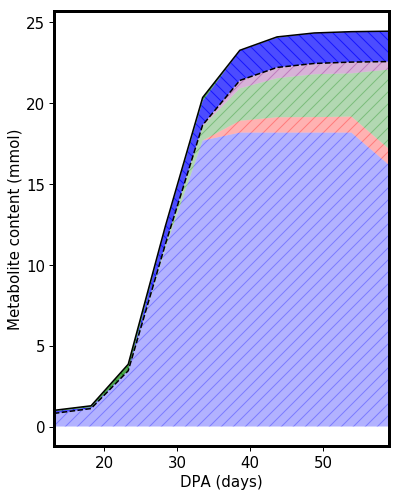

In [203]:
SOL = pfba_Weighted(temp_model5,weightings)

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

ax1 = plt.subplot(1,1,1)

xlist = list()
ylist = list()
y2list = list()
y3list = list()
y4list = list()
y5list = list()
y6list = list()
y7list = list()
y8list = list()
y9list = list()
y10list = list()
y11list = list()
y12list = list()
y13list = list()
y14list = list()
for i in range(1,11):
    xlist.append(DPA[i])
    met = cobra_model2.metabolites.get_by_id("WCO_"+str(i))
    rxn = cobra_model2.reactions.get_by_id("WCOsetter_tx"+str(i))
    #print(rxn.x)
    y1 = rxn.metabolites.get(met)*solution2.x_dict.get(rxn.id)*-1
    ylist.append(y1)
    y2 = 0
    y3 = 0
    y4 = 0
    y5 = 0
    y6 = 0
    y7 = 0
    y8 = 0
    y9 = 0
    y10 = 0
    y11 = 0
    y12 = 0
    y13 = 0
    y14 = 0
    for s in ["VO"]:
        for r in cobra_model2.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y2 = y2 + (SOL.x_dict.get(r.id)*r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))))
    y2list.append(y2)
    for s in ["CO"]:
        for r in cobra_model2.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y3 = y3 + abs(SOL.x_dict.get(r.id)*r.metabolites.get(cobra_model2.metabolites.get_by_id(s+"_"+str(i))))
    y3list.append(y2+y3)
    for s in ["SUCROSE_v","GLC_v","FRU_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y4 = y4 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y4 = y4 + SOL.x_dict.get(rxn.id)
    y4list.append(y4)
    for s in ["SUCROSE_c","GLC_c","FRU_c"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y5 = y5 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y5 = y5 + SOL.x_dict.get(rxn.id)
    y5list.append(y2+y5)
    for s in ["MAL_v","CIT_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y6 = y6 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y6 = y6 + SOL.x_dict.get(rxn.id)
    y6list.append(y4+y6)
    for s in ["MAL_c","CIT_c"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y7 = y7 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            y7 = y7 + SOL.x_dict.get(rxn.id)
    y7list.append(y2+y5+y7)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","bHIS","MET","PRO","TRP","TYR","CYS"]:
        #if s == "GLN" or s=="LEU" or s=="CYS":
        #    continue
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_v_Transfer"+str(i)+str(i+1))
            y8 = y8 + SOL.x_dict.get(rxn.id)
        else:
            if s=="bHIS":
                s="HIS"
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_v_tx10")
            y8 = y8 + SOL.x_dict.get(rxn.id)            
    y8list.append(y4+y6+y8)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","HIS","MET","PRO","TRP","TYR","CYS"]:
        #if s == "GLN" or s=="LEU" or s=="CYS":
        #    continue
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_c_Transfer"+str(i)+str(i+1))
            y9 = y9 + SOL.x_dict.get(rxn.id)
        else:
            rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_c_tx10")
            y9 = y9 + SOL.x_dict.get(rxn.id)            
    y9list.append(y2+y5+y7+y9)
    for s in ["STARCH_p"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y10 = y10 + SOL.x_dict.get(rxn.id)
        else:
            #rxn = cobra_model2.reactions.get_by_id("Biomass_"+s+"_tx10")
            #y10 = y10 + rxn.x 
            y10 = 0
    y10list.append(y1+y10)
    for s in ["KI_v","MGII_v","CAII_v","AMMONIUM_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y11 = y11 + SOL.x_dict.get(rxn.id)
        else:
            if s=="KI_v":
                y11 = y11 + SOL.x_dict.get("K_biomass10")
            elif s=="MGII_v":
                y11 = y11 + SOL.x_dict.get("Mg_biomass10")
            elif s=="CAII_v":
                y11 = y11 + SOL.x_dict.get("Ca_biomass10")     
            else:
                y11 = y11 + 0
    y11list.append(y4+y6+y8+y11)
    for s in ["KI","MGII","CAII"]:
        if i!=10:
            y12 = y12 + 0
    #        rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
    #        y12 = y12 + solution2.x_dict.get(rxn.id)
        else:
            y12 = y12 + SOL.x_dict.get(s+"_biomass_c10")
    y12list.append(y2+y5+y7+y9+y12)
    for s in ["NITRATE_v"]:
        if i!=10:
            rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y13 = y13 + SOL.x_dict.get(rxn.id)
        else:
            y13 = y13 + SOL.x_dict.get("NITRATE_biomass10")        
    y13list.append(y4+y6+y8+y11+y13)
    for s in ["NITRATE_c"]:
        if i!=10:
            y14 = y14 + 0
            #rxn = cobra_model2.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            #y14 = y14 + solution2.x_dict.get(rxn.id)
        else:
            y14 = y14 + SOL.x_dict.get("NITRATE_biomass_c10")        
    y14list.append(y2+y5+y7+y9+y12+y14)
    

ax1.plot(xlist,y3list,"-",color="black")
ax1.plot(xlist,y2list,"--",color="black")
#ax1.fill_between(xlist,y2list,alpha=0.1,color="grey",label="vacuolar contribution",linewidth=0)
ax1.fill_between(xlist,y4list,alpha=0.3,color="blue",label="vac-SUG",hatch="//",linewidth=0)
ax1.fill_between(xlist,y4list,y6list,alpha=0.3,color="red",label="vac-OA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y6list,y8list,alpha=0.3,color="green",label="vac-AA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y8list,y11list,alpha=0.3,color="purple",label="vac-Cation",hatch="//",linewidth=0)
ax1.fill_between(xlist,y11list,y13list,alpha=0.3,color="magenta",label="vac-Nitrate",hatch="//",linewidth=0)
#ax1.fill_between(xlist,y2list,y3list,alpha=0.1,color="white",label="cytosolic contribution",linewidth=0)
ax1.fill_between(xlist,y2list,y5list,alpha=0.7,color="blue",label="cyt-SUG",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y5list,y7list,alpha=0.7,color="red",label="cyt-OA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y7list,y9list,alpha=0.7,color="green",label="cyt-AA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y9list,y12list,alpha=0.7,color="purple",label="cyt-Cation",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y12list,y14list,alpha=0.7,color="magenta",label="cyt-Nitrate",hatch="\\\\",linewidth=0)
#ax1.fill_between(xlist,y9list,y10list,alpha=0.3,color="black",label="starch",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,ylist,y10list,alpha=0.7,color="orange",label="starch (GLC moles)",linewidth=0)
#plt.legend(bbox_to_anchor=(1.50, 1.02),fontsize=15)
plt.ylabel("Metabolite content (mmol)")
plt.xlabel("DPA (days)")
plt.xlim(DPA[1],DPA[10])
#plt.xlim(DPA[1],20)
#plt.ylim(0,1.2)
plt.show()

In [ ]:
ylist

In [95]:
y3list

[202.89432473373802,
 487.39683731982154,
 847.1965184732791,
 1237.6454178401782,
 1682.361734724689,
 2139.1538966864387,
 2669.219820075824,
 3231.476649135672,
 3950.4639876976707,
 5075.431767403156]

In [137]:
i=1
x=0
for r in ["Biomass_FRU_v_tx10","Biomass_SUCROSE_v_tx10","Biomass_GLC_v_tx10","Biomass_THR_v_tx10","Biomass_GLN_v_tx10","Biomass_ILE_v_tx10","Biomass_L_ALPHA_ALANINE_v_tx10","Biomass_4_AMINO_BUTYRATE_v_tx10","Biomass_GLY_v_tx10","Biomass_VAL_v_tx10","Biomass_GLT_v_tx10","Biomass_L_ASPARTATE_v_tx10","Biomass_TRP_v_tx10","Biomass_PHE_v_tx10","Biomass_LYS_v_tx10","Biomass_MET_v_tx10","Mg_biomass10"]:
    print r
    print i
    x=x+solution2.x_dict.get(r)
    i=i+1
print x

Biomass_FRU_v_tx10
1
Biomass_SUCROSE_v_tx10
2
Biomass_GLC_v_tx10
3
Biomass_THR_v_tx10
4
Biomass_GLN_v_tx10
5
Biomass_ILE_v_tx10
6
Biomass_L_ALPHA_ALANINE_v_tx10
7
Biomass_4_AMINO_BUTYRATE_v_tx10
8
Biomass_GLY_v_tx10
9
Biomass_VAL_v_tx10
10
Biomass_GLT_v_tx10
11
Biomass_L_ASPARTATE_v_tx10
12
Biomass_TRP_v_tx10
13
Biomass_PHE_v_tx10
14
Biomass_LYS_v_tx10
15
Biomass_MET_v_tx10
16
Mg_biomass10
17
18.829850739797216


In [132]:
y11list[9]

18.82985073979667

In [140]:
met = cobra_model2.metabolites.get_by_id("VO_10")
x=0
i=1
for rxn in met.reactions:
    if abs(round(solution2.x_dict.get(rxn.id),5)) == 0:
        continue
    #if not rxn.id in ["Biomass_FRU_v_tx10","Biomass_SUCROSE_v_tx10","Biomass_GLC_v_tx10","Biomass_THR_v_tx10","Biomass_GLN_v_tx10","Biomass_ILE_v_tx10","Biomass_L_ALPHA_ALANINE_v_tx10","Biomass_4_AMINO_BUTYRATE_v_tx10","Biomass_GLY_v_tx10","Biomass_VAL_v_tx10","Biomass_GLT_v_tx10","Biomass_L_ASPARTATE_v_tx10","Biomass_TRP_v_tx10","Biomass_PHE_v_tx10","Biomass_LYS_v_tx10","Biomass_MET_v_tx10"]:
    print rxn.id+"\t"+str(solution2.x_dict.get(rxn.id)*rxn.metabolites.get(met))
    if rxn.id != "IntercellularWaterPotentialConstraint10":
        x = x+solution2.x_dict.get(rxn.id)*rxn.metabolites.get(met)
        print rxn.metabolites.get(met)
        print rxn.reaction
    #print rxn.reaction+"\t"+str(rxn.metabolites.get(met))
    print i
    i = i+1
print x

Biomass_THR_v_tx10	0.0311665717040025
2.0
1.9751 THR_v10 + 0.0249 aTHR_v10 --> 0.0249 CC_v10 + 0.0249 PROTON_v10 + THR_b10 + 2.0 VO_10
1
Biomass_GLN_v_tx10	3.644138978688405
2.0
1.9782 GLN_v10 + 0.0218 aGLN_v10 --> 0.0218 CC_v10 + GLN_b10 + 0.0218 PROTON_v10 + 2.0 VO_10
2
Biomass_ILE_v_tx10	0.01809515360500635
2.0
1.9107 ILE_v10 + 0.0893 aILE_v10 --> 0.0893 CC_v10 + ILE_b10 + 0.0893 PROTON_v10 + 2.0 VO_10
3
Biomass_L_ALPHA_ALANINE_v_tx10	0.034521585890742744
2.0
1.9548 L_ALPHA_ALANINE_v10 + 0.0452 aL_ALPHA_ALANINE_v10 --> 0.0452 CC_v10 + L_ALPHA_ALANINE_b10 + 0.0452 PROTON_v10 + 2.0 VO_10
4
IntercellularWaterPotentialConstraint10	-22.562421414058758
5
Biomass_4_AMINO_BUTYRATE_v_tx10	0.49035527018149955
2.0
1.1576 4_AMINO_BUTYRATE_v10 + 0.8424 a4_AMINO_BUTYRATE_v10 --> 4_AMINO_BUTYRATE_b10 + 0.8424 CC_v10 + 0.8424 PROTON_v10 + 2.0 VO_10
6
Biomass_GLY_v_tx10	0.006559385091471668
2.0
1.9688 GLY_v10 + 0.0312 aGLY_v10 --> 0.0312 CC_v10 + GLY_b10 + 0.0312 PROTON_v10 + 2.0 VO_10
7
Biomass_VAL

In [374]:
cobra_model2.reactions.get_by_id("Biomass_MAL_v_tx10").reaction

'0.89024 CC_v10 + 0.02534 MAL_v10 + 0.83956 aMAL_v10 + 0.13503 aaMAL_v10 --> MAL_b10 + 1.10976 PROTON_v10 + 0.99993 VO_10'

In [376]:
for rxn in cobra_model2.metabolites.get_by_id("MAL_v10").reactions:
    print rxn.reaction

0.89024 CC_v10 + 0.02534 MAL_v10 + 0.83956 aMAL_v10 + 0.13503 aaMAL_v10 --> MAL_b10 + 1.10976 PROTON_v10 + 0.99993 VO_10
CIT_c10 + 0.0362 MAL_v10 + PROTON_c10 + 0.7708 aMAL_v10 + 0.1929 aaMAL_v10 <=> 0.0026 CIT_v10 + MAL_c10 + 0.129 PROTON_v10 + 0.1016 aCIT_v10 + 0.7612 aaCIT_v10 + 0.1347 aaaCIT_v10
MAL_c10 + 1.1568 PROTON_v10 --> 0.0362 MAL_v10 + 0.7708 aMAL_v10 + 0.1929 aaMAL_v10
0.8432 CC_v9 + 0.0362 MAL_v9 + 0.7708 aMAL_v9 + 0.1929 aaMAL_v9 --> 0.0362 MAL_v10 + VO_9 + 0.7708 aMAL_v10 + 0.1929 aaMAL_v10
0.0362 MAL_v10 + 0.8432 PROTON_v10 + 0.7708 aMAL_v10 + 0.1929 aaMAL_v10 --> MAL_c10 + 2.0 PROTON_c10
0.0362 MAL_v10 + 0.8432 PROTON_v10 + 0.7708 aMAL_v10 + 0.1929 aaMAL_v10 --> 


In [231]:
for rxn in cobra_model2.reactions:
    if round(abs(rxn.x))>990:
        print rxn.id

KeyError: 'GLN_c_Transfer12'

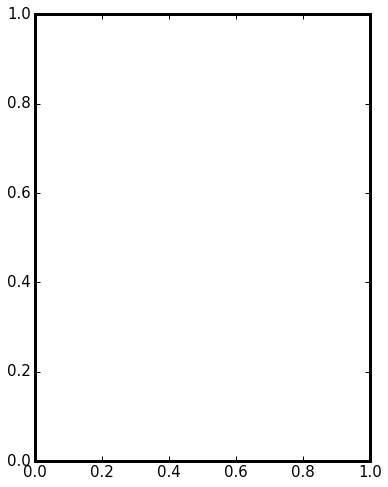

In [1214]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

ax1 = plt.subplot(1,1,1)

xlist = list()
ylist = list()
y2list = list()
y3list = list()
y4list = list()
y5list = list()
y6list = list()
y7list = list()
y8list = list()
y9list = list()
y10list = list()
for i in range(1,11):
    xlist.append(DPA[i])
    met = backup4.metabolites.get_by_id("WCO_"+str(i))
    rxn = backup4.reactions.get_by_id("WCOsetter_tx"+str(i))
    #print(rxn.x)
    y1 = rxn.metabolites.get(met)*rxn.x*-1
    ylist.append(y1)
    y2 = 0
    y3 = 0
    y4 = 0
    y5 = 0
    y6 = 0
    y7 = 0
    y8 = 0
    y9 = 0
    y10 = 0
    for s in ["VO"]:
        for r in backup4.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(backup4.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y2 = y2 + (r.x*r.metabolites.get(backup4.metabolites.get_by_id(s+"_"+str(i))))
    y2list.append(y2)
    for s in ["CO"]:
        for r in backup4.metabolites.get_by_id(s+"_"+str(i)).reactions:
            if r.metabolites.get(backup4.metabolites.get_by_id(s+"_"+str(i))) > 0:
                y3 = y3 + abs(r.x*r.metabolites.get(backup4.metabolites.get_by_id(s+"_"+str(i))))
    y3list.append(y2+y3)
    for s in ["SUCROSE_v","GLC_v","FRU_v"]:
        if i!=10:
            rxn = backup4.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y4 = y4 + rxn.x
        else:
            rxn = backup4.reactions.get_by_id("Biomass_"+s+"_tx10")
            y4 = y4 + rxn.x
    y4list.append(y4)
    for s in ["SUCROSE_c","GLC_c","FRU_c"]:
        if i!=10:
            rxn = backup4.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y5 = y5 + rxn.x
        else:
            rxn = backup4.reactions.get_by_id("Biomass_"+s+"_tx10")
            y5 = y5 + rxn.x
    y5list.append(y2+y5)
    for s in ["MAL_v","CIT_v"]:
        if i!=10:
            rxn = backup4.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y6 = y6 + rxn.x
        else:
            rxn = backup4.reactions.get_by_id("Biomass_"+s+"_tx10")
            y6 = y6 + rxn.x
    y6list.append(y4+y6)
    for s in ["MAL_c","CIT_c"]:
        if i!=10:
            rxn = backup4.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y7 = y7 + rxn.x
        else:
            rxn = backup4.reactions.get_by_id("Biomass_"+s+"_tx10")
            y7 = y7 + rxn.x
    y7list.append(y2+y5+y7)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","bHIS","MET","PRO","TRP","TYR","CYS"]:
        if i!=10:
            rxn = backup4.reactions.get_by_id(s+"_v_Transfer"+str(i)+str(i+1))
            y8 = y8 + rxn.x
        else:
            if s=="bHIS":
                s="HIS"
            rxn = backup4.reactions.get_by_id("Biomass_"+s+"_v_tx10")
            y8 = y8 + rxn.x            
    y8list.append(y4+y6+y8)
    for s in ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","HIS","MET","PRO","TRP","TYR","CYS"]:
        if i!=10:
            rxn = backup4.reactions.get_by_id(s+"_c_Transfer"+str(i)+str(i+1))
            y9 = y9 + rxn.x
        else:
            rxn = backup4.reactions.get_by_id("Biomass_"+s+"_c_tx10")
            y9 = y9 + rxn.x            
    y9list.append(y2+y5+y7+y9)
    for s in ["STARCH_p"]:
        if i!=10:
            rxn = backup4.reactions.get_by_id(s+"_Transfer"+str(i)+str(i+1))
            y10 = y10 + rxn.x
        else:
            #rxn = backup4.reactions.get_by_id("Biomass_"+s+"_tx10")
            #y10 = y10 + rxn.x 
            y10 = 0
    y10list.append(y1+y10)
    

ax1.plot(xlist,ylist,"-",color="black")
ax1.plot(xlist,y2list,"--",color="black")
#ax1.fill_between(xlist,y2list,alpha=0.1,color="grey",label="vacuolar contribution",linewidth=0)
ax1.fill_between(xlist,y4list,alpha=0.3,color="blue",label="vSUC",hatch="//",linewidth=0)
ax1.fill_between(xlist,y4list,y6list,alpha=0.3,color="red",label="vOA",hatch="//",linewidth=0)
ax1.fill_between(xlist,y6list,y8list,alpha=0.3,color="green",label="vAA",hatch="//",linewidth=0)
#ax1.fill_between(xlist,y2list,y3list,alpha=0.1,color="white",label="cytosolic contribution",linewidth=0)
ax1.fill_between(xlist,y2list,y5list,alpha=0.7,color="blue",label="cSUC",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y5list,y7list,alpha=0.7,color="red",label="cOA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y7list,y9list,alpha=0.7,color="green",label="cAA",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,y9list,y10list,alpha=0.3,color="black",label="cellulose",hatch="\\\\",linewidth=0)
ax1.fill_between(xlist,ylist,y10list,alpha=0.3,color="orange",label="Starch_p",linewidth=0)
plt.legend(bbox_to_anchor=(1.75, 1.02),fontsize=15)
plt.ylabel("mOsmol")
plt.xlabel("DPA")
plt.xlim(DPA[1],DPA[10])
#plt.xlim(DPA[1],20)
#plt.ylim(0,1.2)
plt.show()

In [43]:
temp=dict()
for rxn in cobra_model2.reactions.query("Transfer89"):
    if round(rxn.x,3) > 0:
        temp[rxn.id] = rxn.x

In [44]:
import pandas as pd
df = pd.DataFrame(temp.items(), columns=['Rxn', 'Flux'])

df.sort_values(by=['Flux'],ascending=False)

,Rxn,Flux
21,FRU_v_Transfer89,4.368767
13,MAL_v_Transfer89,4.301037
0,KI_v_Transfer89,3.125982
31,GLC_v_Transfer89,1.776553
33,L_ALPHA_ALANINE_c_Transfer89,0.657561
16,SER_v_Transfer89,0.623968
4,GLT_v_Transfer89,0.623968
15,L_ALPHA_ALANINE_v_Transfer89,0.623968
27,VAL_v_Transfer89,0.623968
10,L_ASPARTATE_v_Transfer89,0.623968


---

In [567]:
for i in range(1,11):
    print(cobra_model2.reactions.get_by_id("RXN_1461_v"+str(i)).x)

0.0
0.0
0.0
0.863446617937
2.14509579798
0.0
0.0
0.0
0.0
0.0


------ 8 ------
Vcell = 8.85998076048e-14
V' = 2.15330004747e-14
Vpericarp = 3.59437119593e-06
A = 4.46804306629e-05
B = 309950394.146
C = 2.15330004747e-14
Number of cells =40568611.751
------ 8 ------
Vcell = 8.85998076048e-14
V' = 2.15330004747e-14
Vpericarp = 3.59437119593e-06
A = 4.46804306629e-05
B = 309950394.146
C = 2.15330004747e-14
Number of cells =40568611.751
------ 9 ------
Vcell = 1.12081433694e-13
V' = 2.55350594856e-14
Vpericarp = 3.59517108688e-06
A = 4.83145250001e-05
B = 264987218.857
C = 2.55350594856e-14
Number of cells =32076419.5138
------ 9 ------
Vcell = 1.12081433694e-13
V' = 2.55350594856e-14
Vpericarp = 3.59517108688e-06
A = 4.83145250001e-05
B = 264987218.857
C = 2.55350594856e-14
Number of cells =32076419.5138
------ 10 ------
Vcell = 1.39893014211e-13
V' = 3.02064406807e-14
Vpericarp = 3.5972587351e-06
A = 5.20117109079e-05
B = 228586209.966
C = 3.02064406807e-14
Number of cells =25714355.7553
------ 10 ------
Vcell = 1.39893014211e-13
V' = 3.02064406807e

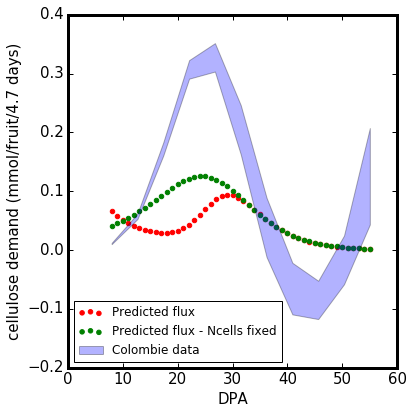

[0.06714997677058966, 0.058205902406906616, 0.05125874817794179, 0.04569431659546436, 0.04114529750566981, 0.03739550808157384, 0.034332464789973996, 0.03192413204145002, 0.03020805735936605, 0.029285936353619018, 0.029318139929566955, 0.030512503101422377, 0.033100627821518694, 0.037294246813278725, 0.043215984358434614, 0.050806550836572144, 0.05972713934752612, 0.06929916277124723, 0.07853828298461377, 0.08631965783025053, 0.09164441143457723, 0.09390010752754638, 0.09299201394585248, 0.08929514750702862, 0.08347890631332643, 0.07630402591662126, 0.06846833594682514, 0.060526272611725274, 0.05286954641598512, 0.04574389168134541, 0.039280351986553455, 0.03352787775886997, 0.028481122727040776, 0.024101707270461136, 0.020333351915834626, 0.017112055247674323, 0.014372583212914288, 0.012052358063889474, 0.010093588280804427, 0.008444251537125544, 0.007058358356180973, 0.005895786319802475, 0.004921876212513227, 0.004106913177887184, 0.0034255696376842976, 0.002856355900448607, 0.00238

In [571]:
def estimateVcell(T):
    Vcell = ((0.02894333/(0.00760074+(math.e**(-0.18324543*T))))-0.03277816)*(10**-12) # units = m3
    return Vcell

def estimatedVcelldt(T):
    dVcelldt = ((0.005303733*(math.e**(-0.18324543*T)))/((0.00760074+(math.e**(-0.18324543*T)))**2))*(10**-12) # units = m3/day
    return dVcelldt

def estimateVpericarp(T):
    #assuming sphere
    Vpericarp = (0.0000889527 +((0.000003593996 - 0.0000889527)/(1 +((T/28.56023)**9.692893)))) # units = m3
    #
    #assuming hollowsphere - 20%
    #Vpericarp = (0.0000007121165 +((0.00000002819613 - 7.121165e-7)/(1 +((T/28.55635)**9.567273)))) # units = m3
    return Vpericarp

def celluloseDemandFlux(t,Ncells=0,unit_time=1):
    Vcell = estimateVcell(t)               # units = m3
    dVcelldt = estimatedVcelldt(t)         # units = m3/day
    Vpericarp = estimateVpericarp(t)       # units = m3
    if Ncells==0:
        Ncells = Vpericarp/Vcell
    #cell wall thickness = 100 nm according to figure 19-68, https://www.ncbi.nlm.nih.gov/books/NBK26928/
    c = 100*(10**-9)                       # unit = m
    p_cellulose = 1.54*(10**6)             # unit = g/m3
    y = Ncells*((Vcell**(float(1)/3))+c)*((4*c*p_cellulose)/(Vcell**(float(2)/3)))*dVcelldt
    print("------ "+str(t)+" ------")
    print("Vcell = "+str(Vcell))
    print("V' = "+str(dVcelldt))
    print("Vpericarp = "+str(Vpericarp))
    print("A = "+str((Vcell**(float(1)/3))+c))
    print("B = "+str((4*c*p_cellulose)/(Vcell**(float(2)/3))))
    print("C = "+str(dVcelldt))
    print("Number of cells ="+str(float(Vpericarp/Vcell)))
    z = (y/180.16 * 1000)*unit_time #converting g/days to mmol/unit_time
    return z

xlist = list()
ylist = list()
xlist2 = list()
ylist2 = list()
ylist3 = list()
ylist4 = list()
for i in range(int(min(DPA)),int(max(DPA))+1):
    xlist.append(i)
    #ylist.append(((0.005303733*(math.e**(-0.18324543*i)))/((0.00760074+(math.e**(-0.18324543*i)))**2))*(10**-9))
    #a=celluloseDemandFlux(i)
    ylist.append(celluloseDemandFlux(i))
    ylist4.append(celluloseDemandFlux(i,Ncells = 25*(10**6)))
for i in range(0,len(DPA)):
    xlist2.append(DPA[i])
    ylist2.append(MaxFlux.get('CELLULOSE_c')[i]/scale)
    ylist3.append(MinFlux.get('CELLULOSE_c')[i]/scale)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth']=3 # makes axes line thicker
plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,1,1);
ax1.scatter(xlist,ylist,label="Predicted flux",color="red")
ax1.scatter(xlist,ylist4,label="Predicted flux - Ncells fixed",color="green")
ax1.fill_between(xlist2,ylist2,ylist3,alpha=0.3,label = "Colombie data")
#ax1.set_ylim(0*10**-5,1*10**-5)
ax1.set_xlabel('DPA')
ax1.set_ylabel('cellulose demand (mmol/fruit/4.7 days)')
plt.legend(loc="lower left",fontsize=12)
plt.tight_layout()
plt.show()

#print(xlist)
print(ylist)
#print(DPA)

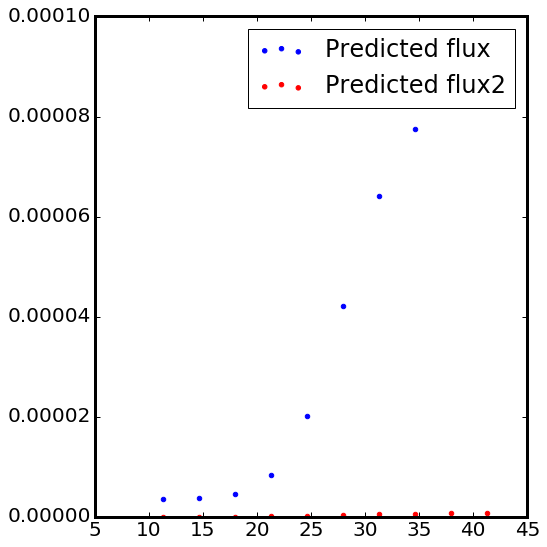

[3.604940286223288e-06,
 3.7268091112583783e-06,
 4.550516022639768e-06,
 8.333039763810872e-06,
 2.011438748912266e-05,
 4.2041793694641754e-05,
 6.412143846030203e-05,
 7.756035906447264e-05,
 8.387346639025274e-05,
 8.662695566719271e-05]

In [170]:
xlist=list()
ylist=list()
ylist2=list()
for i in range(1,len(DPA)):
    xlist.append(DPA[i])
    #ylist.append(estimatedVcelldt(DPA[i]))
    #ylist.append(estimateVcell(DPA[i]))
    ylist.append(estimateVpericarp(DPA[i]))
    ylist2.append(estimateVpericarp1(DPA[i]))

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth']=3 # makes axes line thicker
plt.figure(figsize=(8,8))
ax1 = plt.subplot(1,1,1);
ax1.scatter(xlist,ylist,color="b",label="Predicted flux")
ax1.scatter(xlist,ylist2,color="r",label="Predicted flux2")
ax1.set_ylim(-1*10**-10,1*10**-4)
#ax1.set_xlabel('DPA')
#ax1.set_ylabel('cellulose demand (mmol/fruit/3.33 days)')
plt.legend()
plt.tight_layout()
plt.show()

ylist

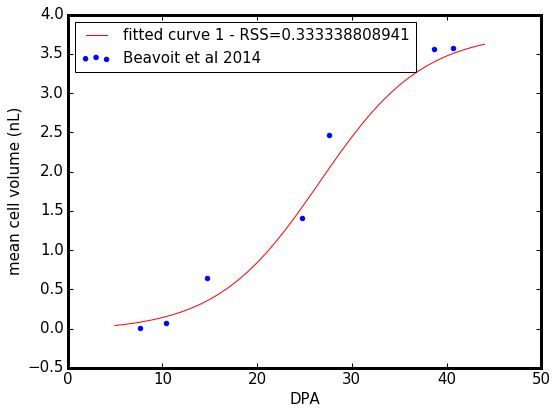

In [404]:
import math

xlist=[7.6546921981325795,10.363981642664967,14.73650894128815,24.76657699003006,27.597721158411147,38.697578730811856,40.67099224560849]
ylist=[0.010602943503719153, 0.06535844279158098, 0.647887323943662, 1.4043361291343572, 2.4720683652476674, 3.563222028802028, 3.578572558949203]
xlist2 = list()
ylist2 = list()
ylist3 = list()
ylist4 = list()

def estimateVcell(T):
    Vcell1 = ((0.02894333/(0.00760074+(math.e**(-0.18324543*T))))-0.03277816) # units = m3
    Vcell2 = 5.13249 + ((-0.03554515 - 5.13249)/(1 +((T/30.25243)**3.118133)))
    Vcell3 = (0.8993838/(0.02242801+(0.002113477**(0.0226133*T)))-0.03277816)*(10**-1)
    return(Vcell1,Vcell2,Vcell3)


for i in range(5,45):
    xlist2.append(i)
    ylist2.append(estimateVcell(i)[0])
    ylist3.append(estimateVcell(i)[1])
    ylist4.append(estimateVcell(i)[2])

SS1 = 0
for i in range(0,len(xlist)-1):
    SS1 = SS1 + (ylist[i]-estimateVcell(xlist[i])[0])**2
    #print SS1
RSS1 = SS1

SS2 = 0
for i in range(0,len(xlist)-1):
    SS2 = SS2 + (ylist[i]-estimateVcell(xlist[i])[1])**2
    #print SS2
RSS2 = SS2

SS3 = 0
for i in range(0,len(xlist)-1):
    SS3 = SS3 + (ylist[i]-estimateVcell(xlist[i])[2])**2
    #print SS3
RSS3 = SS3

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth']=3 # makes axes line thicker
plt.figure(figsize=(8,6))
ax1 = plt.subplot(1,1,1);
ax1.scatter(xlist,ylist,color="b",label="Beavoit et al 2014")
ax1.plot(xlist2,ylist2,color="r",label="fitted curve 1 - RSS="+str(RSS1))
#ax1.plot(xlist2,ylist3,color="g",label="fitted curve 2 - RSS="+str(RSS2))
#ax1.plot(xlist2,ylist4,color="m",label="fitted curve 3 - RSS="+str(RSS3))
ax1.set_xlabel('DPA')
ax1.set_ylabel('mean cell volume (nL)')
plt.legend(loc="best",fontsize=15)
plt.tight_layout()
plt.show()

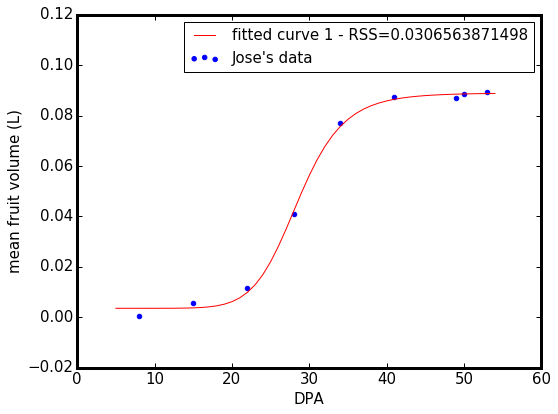

In [426]:
import math

xlist=[8,15,22,28,34,41,49,50,53]
ylist=[4.11760171525605*(10**-7),5.64849981535035*(10**-6),1.18280963407656*(10**-5),4.09063213716265*(10**-5),0.000076893,8.7190757198082*(10**-5),8.67881809490804*(10**-5),8.84622890738873*(10**-5),0.000089247]
xlist2 = list()
ylist2 = list()

def estimateVpericarp(T):
    #assuming sphere
    Vpericarp = (0.0000889527 +((0.000003593996 - 0.0000889527)/(1 +((T/28.56023)**9.692893)))) # units = m3
    #
    #assuming hollowsphere - 20%
    #Vpericarp = (0.0000007121165 +((0.00000002819613 - 7.121165e-7)/(1 +((T/28.55635)**9.567273)))) # units = m3
    return Vpericarp

temp = list()
for i in ylist:
    temp.append(i*(10**3))
ylist = temp

for i in range(5,55):
    xlist2.append(i)
    ylist2.append(estimateVpericarp(i)*(10**3))

SS1 = 0
for i in range(0,len(xlist)-1):
    SS1 = SS1 + (ylist[i]-estimateVpericarp(xlist[i]))**2
    #print SS1
RSS1 = SS1

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth']=3 # makes axes line thicker
plt.figure(figsize=(8,6))
ax1 = plt.subplot(1,1,1);
ax1.scatter(xlist,ylist,color="b",label="Jose's data")
ax1.plot(xlist2,ylist2,color="r",label="fitted curve 1 - RSS="+str(RSS1))
ax1.set_xlabel('DPA')
ax1.set_ylabel('mean fruit volume (L)')
#ax1.set_ylim(-0.001,0.0001)
plt.legend(loc="best",fontsize=15)
plt.tight_layout()
plt.show()

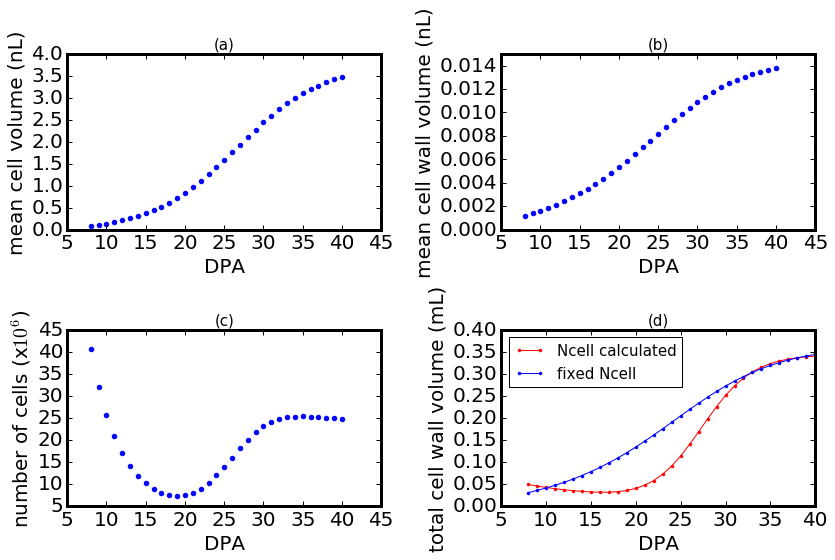

In [514]:
def estimateVcell(T):
    Vcell = ((0.02894333/(0.00760074+(math.e**(-0.18324543*T))))-0.03277816)*(10**-12) # units = m3
    return Vcell

def estimateVpericarp(T):
    #assuming sphere
    Vpericarp = (0.0000889527 +((0.000003593996 - 0.0000889527)/(1 +((T/28.56023)**9.692893)))) # units = m3
    #
    #assuming hollowsphere - 20%
    #Vpericarp = (0.0000007121165 +((0.00000002819613 - 7.121165e-7)/(1 +((T/28.55635)**9.567273)))) # units = m3
    return Vpericarp

def estimateVcellwall(T):
    Vcell = estimateVcell(T)
    #Vpericarp = estimateVpericarp(T)
    c=100*(10**-9)
    y = ((6*(Vcell**(2.0/3.0))*c)+(12*(Vcell**(1.0/3.0))*(c**2))+(8*(c**3)))#*(Vpericarp/Vcell)
    return y

def estimateNcell(T):
    Vcell = estimateVcell(T)
    Vpericarp = estimateVpericarp(T)
    return Vpericarp/Vcell

def estimateTotalVcellwall(T,Ncell=0):
    Vcellwall = estimateVcellwall(T)
    if Ncell == 0:
        Ncell = estimateNcell(T)
    return Vcellwall*Ncell

xlist=list()
ylist=list()
ylist2 = list()
ylist3 = list()
ylist4 = list()
ylist5 = list()
for i in range(8,41):
    xlist.append(i)
    ylist.append(estimateVcellwall(i)*(10**12))
    ylist2.append(estimateVcell(i)*(10**12))
    ylist3.append(estimateNcell(i)*(10**-6))
    ylist4.append(estimateTotalVcellwall(i)*(10**6))
    ylist5.append(estimateTotalVcellwall(i,Ncell=25*(10**6))*(10**6))

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth']=3 # makes axes line thicker
plt.figure(figsize=(12,8))

ax1 = plt.subplot(2,2,1);
ax1.scatter(xlist,ylist2,color="b")
ax1.set_xlabel('DPA')
ax1.set_ylabel('mean cell volume (nL)')
ax1.set_ylim(0,4)
ax1.set_title("(a)",fontsize = 15)

ax2 = plt.subplot(2,2,2);
ax2.scatter(xlist,ylist,color="b")
ax2.set_xlabel('DPA')
ax2.set_ylabel('mean cell wall volume (nL)')
ax2.set_ylim(0,1.5*10**-2)
ax2.set_title("(b)",fontsize = 15)

ax3 = plt.subplot(2,2,3);
ax3.scatter(xlist,ylist3,color="b")
ax3.set_xlabel('DPA')
ax3.set_ylabel('number of cells (x' +r'$10^6$'+")")
#ax3.set_ylim(0,1.5*10**-2)
ax3.set_title("(c)",fontsize = 15)

ax4 = plt.subplot(2,2,4);
ax4.plot(xlist,ylist4,".-",color="r",label="Ncell calculated")
ax4.plot(xlist,ylist5,".-",color="b",label="fixed Ncell")
ax4.set_xlabel('DPA')
ax4.set_ylabel('total cell wall volume (mL)')
ax4.legend(loc="upper left",fontsize=15)
ax4.set_ylim(0,4*10**-1)
ax4.set_title("(d)",fontsize = 15)

#ax5 = plt.subplot(2,3,5);
#ax5.scatter(xlist,ylist5,color="b")
#ax5.set_xlabel('DPA')
#ax5.set_ylabel('total cell volume')
#ax5.set_ylim(0,4*10**-7)

#plt.legend(loc="best",fontsize=15)
plt.tight_layout()
plt.show()

In [347]:
ylist4

[4.8593348090052515e-08,
 4.492552734843638e-08,
 4.173781536142928e-08,
 3.8947356049624437e-08,
 3.651192064905802e-08,
 3.442531685184503e-08,
 3.2719438126377955e-08,
 3.147134497648591e-08,
 3.081458901489297e-08,
 3.095401639906061e-08,
 3.21825316359204e-08,
 3.4896473063505473e-08,
 3.9602933881518394e-08,
 4.690745487592178e-08,
 5.7465236829914935e-08,
 7.187756902450983e-08,
 9.05257624127718e-08,
 1.1336623485766762e-07,
 1.3975903326379175e-07,
 1.6843633180261393e-07,
 1.97686431834476e-07,
 2.2571836353733338e-07,
 2.510550920524538e-07,
 2.7278542130576096e-07,
 2.9060234274700026e-07,
 3.0467602248185065e-07,
 3.154632039745468e-07,
 3.2353529449209626e-07,
 3.294609732734468e-07,
 3.3374350986364654e-07,
 3.367976739253779e-07,
 3.389497553056257e-07,
 3.404484383705162e-07]

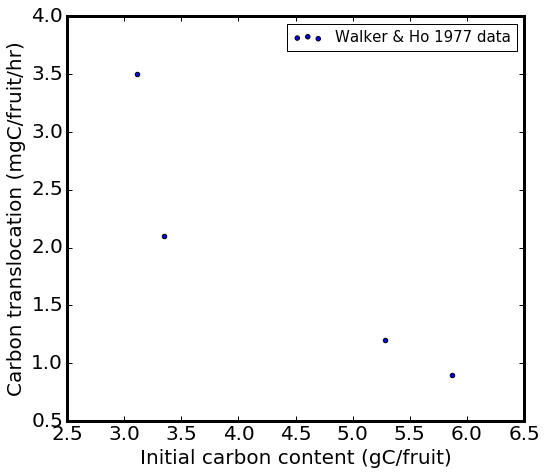

In [465]:
Cfruit = [0.9,1.2,2.1,3.5]
Cin = [5.87,5.28,3.35,3.11]

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth']=3 # makes axes line thicker
plt.figure(figsize=(8,7))

plt.scatter(Cin,Cfruit,label="Walker & Ho 1977 data")
plt.ylabel("Carbon translocation (mgC/fruit/hr)")
plt.xlabel("Initial carbon content (gC/fruit)")
plt.legend(fontsize="15")
plt.tight_layout()
plt.show()

               In our model we have 4 cations (K+,Ca2+,Mg2+ and NH4+) in the vacuole (excluding amino acids). The model would try to maximize moles/charge in order to satisfy the osmolarity constraint with minimal flux. Considering only this, the preference of a cation (p[cation]) would be,
                                                   (p[K+] = p[NH4+])>(p[Mg2+]=p[Ca2+]). 
               The transport cost of K+, Mg2+ and Ca2+ from extracellular space to cytosol in the model is 1 proton each. These cations however do have the same vacuolar uptake cost  (1,2,and 3 protons, respectively). Because plasmamebrane bound ATPase pumps 1 proton per ATP and the tonoplast bound ATPase pumps 2 protons per ATP, in terms of ATP cost, this would be 1.5 ATP, 2 ATP and 2.5 ATP, respectively.
    Accounting for this the cation preference order should clearly be,
                                                   p[K+] > p[Mg2+] > p[Ca2+]
    But what about the p[NH4+]. Well, NH4+ cannot be taken up from the extracellular space because of constraints imposed on the model, so it has to be generated via nitrate reduction which costs the system 2ATPs, 3NAD(P)H (for nitrate uptake, nitrate reduction and nitrite reduction, respectively).1 NAD(P)H can generate 1.2 ATP in mETC, so we can assume, the cost of generating NH4+ in the vacuole is 5.6 ATP. Clearly p[K+] > p[NH4+]

In [198]:
met = cobra_model2.metabolites.get_by_id("VO_9")
for rxn in met.reactions:
    if round(rxn.x,4) != 0:
        print rxn.id+"\t"+str(rxn.x*rxn.metabolites.get(met))

FRU_v_Transfer910	1.55646068557
VAL_v_Transfer910	0.30694255973
PRO_v_Transfer910	0.30694255973
4_AMINO_BUTYRATE_v_Transfer910	0.0166073503972
THR_v_Transfer910	0.30694255973
CYS_v_Transfer910	0.30694255973
ASN_v_Transfer910	0.30694255973
LEU_v_Transfer910	0.30694255973
LYS_v_Transfer910	0.0578055107097
TYR_v_Transfer910	0.30694255973
ILE_v_Transfer910	0.30694255973
IntercellularWaterPotentialConstraint9	-10.417636422296521
GLC_v_Transfer910	1.55646068557
L_ASPARTATE_v_Transfer910	0.30694255973
GLT_v_Transfer910	0.30694255973
KI_v_Transfer910	0.489011822278
MAL_v_Transfer910	1.11987414764
PHE_v_Transfer910	0.30694255973
TRP_v_Transfer910	0.231547138129
L_ALPHA_ALANINE_v_Transfer910	0.30694255973
SER_v_Transfer910	0.30694255973
ARG_v_Transfer910	0.134767163434
GLY_v_Transfer910	0.30694255973
MET_v_Transfer910	0.30694255973
bHIS_v_Transfer910	0.278052793815
CIT_v_Transfer910	0.0298251834871
GLN_v_Transfer910	0.30694255973
SUCROSE_v_Transfer910	0.0361429855961


---1---
0.997
MAL_c_Transfer
MAL_v_Transfer
CIT_c_Transfer
CIT_v_Transfer
0
GLN_c_Transfer
0.0480755183164
GLN_v_Transfer
0.11054508173
ASN_c_Transfer
0.11054508173
ASN_v_Transfer
0.122278409784
SER_c_Transfer
0.122278409784
SER_v_Transfer
0.122278409784
GLY_c_Transfer
0.122278409784
GLY_v_Transfer
0.122278409784
THR_c_Transfer
0.122278409784
THR_v_Transfer
0.150026543688
L_ALPHA_ALANINE_c_Transfer
0.150026543688
L_ALPHA_ALANINE_v_Transfer
0.150026543688
4_AMINO_BUTYRATE_c_Transfer
0.150026543688
4_AMINO_BUTYRATE_v_Transfer
0.150026543688
VAL_c_Transfer
0.150026543688
VAL_v_Transfer
0.165528061266
HIS_c_Transfer
0.174031512373
HIS_v_Transfer
0.174031512373
ILE_c_Transfer
0.174031512373
ILE_v_Transfer
0.186471376093
PHE_c_Transfer
0.186471376093
PHE_v_Transfer
0.45466332765
LEU_c_Transfer
0.45466332765
LEU_v_Transfer
0.468045238529
LYS_c_Transfer
0.481898173283
LYS_v_Transfer
0.481898173283
ARG_c_Transfer
0.49040162439
ARG_v_Transfer
0.49040162439
L_ASPARTATE_c_Transfer
0.49040162439
L_

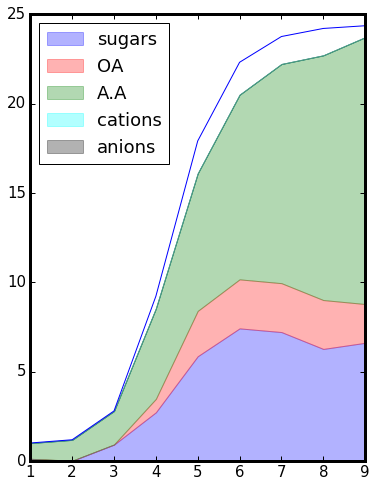

In [221]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker
plt.figure(figsize=(6,8))

ax1 = plt.subplot(1,1,1)

sugars = ["GLC","FRU","SUCROSE"]
oaa = ["MAL","CIT"]
aa = ["GLN","ASN","SER","GLY","THR","L_ALPHA_ALANINE","4_AMINO_BUTYRATE","VAL","HIS","ILE","PHE","LEU","LYS","ARG","L_ASPARTATE","GLT","MET","PRO","TRP","TYR","CYS"]
cations = ["KI","CAII","MGII"]
anions = ["NITRATE"]

xlist = list()
ylist = list()
sugar_list = list()
oaa_list = list()
aa_list = list()
cation_list = list()
anion_list = list()
for i in range(1,10):
    print("---"+str(i)+"---")
    xlist.append(i)
    met = cobra_model2.metabolites.get_by_id("WCO_"+str(i))
    rxn = cobra_model2.reactions.get_by_id("WCOsetter_tx"+str(i))
    print(rxn.x)
    ylist.append(rxn.metabolites.get(met)*rxn.x*-1)
    sug = 0
    for s in sugars:
        for comp in ["c","v"]:
            sug = sug + cobra_model2.reactions.get_by_id(s+"_"+comp+"_Transfer"+str(i)+str(i+1)).x
    #print sug
    O = 0
    for o in oaa:
        for comp in ["c","v"]:
            print o+"_"+comp+"_Transfer"
            O = O + cobra_model2.reactions.get_by_id(o+"_"+comp+"_Transfer"+str(i)+str(i+1)).x
    #print O
    A = 0
    for a in aa:
        for comp in ["c","v"]:
            print A
            print a+"_"+comp+"_Transfer"
            if a == "HIS" and comp == "v":
                a = "b"+a
            A = A + cobra_model2.reactions.get_by_id(a+"_"+comp+"_Transfer"+str(i)+str(i+1)).x
    print A
    C = 0
    for c in cations:
        for comp in ["v"]:
            C = C + cobra_model2.reactions.get_by_id(c+"_"+comp+"_Transfer"+str(i)+str(i+1)).x
    An = 0
    for a in anions:
        for comp in ["v"]:
            An = An + cobra_model2.reactions.get_by_id(a+"_"+comp+"_Transfer"+str(i)+str(i+1)).x
    sugar_list.append(sug)
    oaa_list.append(sug+O)
    aa_list.append(sug+O+A)
    cation_list.append(sug+O+A+C)
    anion_list.append(sug+O+A+C+An)
    
            

ax1.plot(xlist,ylist)
ax1.fill_between(xlist,sugar_list,alpha=0.3,color="blue",label="sugars")
ax1.fill_between(xlist,oaa_list,sugar_list,alpha=0.3,color="red",label="OA")
ax1.fill_between(xlist,aa_list,oaa_list,alpha=0.3,color="green",label="A.A")
ax1.fill_between(xlist,cation_list,aa_list,alpha=0.3,color="cyan",label="cations")
ax1.fill_between(xlist,anion_list,cation_list,alpha=0.3,color="black",label="anions")
plt.legend(loc="best")
plt.show()


In [200]:
for rxn in cobra_model2.metabolites.get_by_id("CO_9").reactions:
    #if round(rxn.x,4) != 0:
        print rxn.id+"#"+str(rxn.x*rxn.metabolites.get(cobra_model2.metabolites.get_by_id("CO_9")))

L_ASPARTATE_c_Transfer910#0.0
CIT_c_Transfer910#0.0
ILE_c_Transfer910#0.0
LEU_c_Transfer910#0.0
MAL_c_Transfer910#0.0
GLT_c_Transfer910#0.0
CYS_c_Transfer910#0.0
CELLULOSE_c_Transfer910#0.871918586677
SUCROSE_c_Transfer910#0.0
TRP_c_Transfer910#0.0
4_AMINO_BUTYRATE_c_Transfer910#0.0
ARG_c_Transfer910#0.0
PRO_c_Transfer910#0.0
TYR_c_Transfer910#0.0
LYS_c_Transfer910#0.00577761255618
THR_c_Transfer910#0.0
FRU_c_Transfer910#0.0
GLC_c_Transfer910#0.0
IntercellularWaterPotentialConstraint9#-0.912363577703
HIS_c_Transfer910#0.0288897659141
PALMITATE_c_Transfer910#0.00577761255618
MET_c_Transfer910#0.0
GLN_c_Transfer910#0.0
PHE_c_Transfer910#0.0
L_ALPHA_ALANINE_c_Transfer910#0.0
SER_c_Transfer910#0.0
ASN_c_Transfer910#0.0
VAL_c_Transfer910#0.0
GLY_c_Transfer910#0.0


In [201]:
cobra_model2.reactions.get_by_id("GLN_v_Transfer910").reaction

'0.9826 GLN_v9 + 0.0174 aGLN_v9 --> 0.0174 CC_v9 + 0.9862 GLN_v10 + 0.0036 PROTON_v9 + VO_9 + 0.0138 aGLN_v10'

In [202]:
cobra_model2.reactions.get_by_id("WCOsetter_tx9").lower_bound

11.33

## Generate Fruit flux maps

In [167]:
import time
print(time.ctime())
cobra_model4 = FBA_FVA_run(cobra_model2,cobra_model2.reactions.get_by_id("Final_Biomass_tx"),rxnlist = cobra_model2.reactions)
print(time.ctime())

Thu Apr  5 14:51:18 2018
Runing pFBA
Setting SOF model
Running FVA
Processing results
Thu Apr  5 15:00:49 2018


In [171]:
cobra_model = cobra_model4.copy()
solution = flux_analysis.parsimonious.optimize_minimal_flux(cobra_model)

#open output file for writing
f = open("/home/sanu/FruitFlux_050418.csv","w");

#use rxnSet to identify reaction that have already been processed
rxnSet = set()

mult=set()
#Looping through all reactions in the model
for rxn in cobra_model.reactions:
    #Get the ID
    RXN=rxn.id
    #declare a boolean variable multFlag to keep track of whether this reaction is present in multiple models
    multFlag=False
    
    #check if the reaction has already been processed before and if yes skip this run in the loop
    if(rxnSet.__contains__(RXN)):
        continue
    if rxn.id.__contains__("Transfer"):
        multFlag=False
    #check if the reaction ends with one or two i.e it is present more than once in the model
    elif(["1","2","3","4","5","6","7","8","9"].__contains__(rxn.id[len(rxn.id)-1])):
        #change the id to without the suffix 1-9 and declare it as a reaction which has multiple instances
        RXN = rxn.id[0:len(rxn.id)-1]
        multFlag=True
    elif rxn.id[len(rxn.id)-2:] == "10":
        #change the id to without the suffix 10 and declare it as a reaction which has multiple instances
        RXN = rxn.id[0:len(rxn.id)-2]
        multFlag=True
    
    #if metabolite has multiple instances
    values = dict()
    status1 = dict()
    status2 = dict()
    if(multFlag):
        tempvalue = list()
        temp1 = list()
        temp2 = list()
        mult.add(RXN)
        #add the reaction we are about to process to the reactions processed list
        for i in range(1,11):
            rxnSet.add(RXN+str(i))
            if(round(float(cobra_model.reactions.get_by_id(RXN+str(i)).x)*10000) == 0):
                tempvalue.append(0)
                temp1.append("none")
                temp2.append("none")
            elif(float(cobra_model.reactions.get_by_id(RXN+str(i)).x)*10000 > 0):
                tempvalue.append(cobra_model.reactions.get_by_id(RXN+str(i)).x*1000)
                temp1.append("produced")
                temp2.append("consumed")
            elif(float(cobra_model.reactions.get_by_id(RXN+str(i)).x)*10000 < 0):
                tempvalue.append(cobra_model.reactions.get_by_id(RXN+str(i)).x*1000)
                temp1.append("consumed")
                temp2.append("produced")
        values[RXN] = tempvalue
        status1[RXN] = temp1
        status2[RXN] = temp2
        
        #select 1 reaction so that we can identify the reactants and products which can be then used to generate the edge shared_name
        rxn=cobra_model.reactions.get_by_id(RXN+"1")
        
        for reac in rxn.reactants:
            REAC=reac.id
            if(REAC.__contains__("1")):
                if(REAC.rindex("1")==len(REAC)-1) or (REAC.rindex("2")==len(REAC)-1):
                    REAC=REAC[0:len(REAC)-1]
                f.write("R_"+RXN+" (reaction-reactant) M_"+REAC)
                for i in range(1,11):
                    f.write("\t"+str(values[RXN][i-1])+"\t"+str(status1[RXN][i-1])+"\t"+str(status2[RXN][i-1]))
                f.write("\n")
            if(RXN.__contains__("biomass")):
                f.write("R_"+RXN+" (reaction-reactant) M_"+REAC)
                for i in range(1,11):
                    f.write("\t"+str(values[RXN][i-1])+"\t"+str(status1[RXN][i-1])+"\t"+str(status2[RXN][i-1]))
                f.write("\n")
        for prod in rxn.products:
            PROD=prod.id
            if(PROD.__contains__("1")):
                if(PROD.rindex("1")==len(PROD)-1) or (PROD.rindex("2")==len(PROD)-1):
                    PROD=PROD[0:len(PROD)-1]
            f.write("R_"+RXN+" (reaction-reactant) M_"+PROD)
            for i in range(1,11):
                f.write("\t"+str(values[RXN][i-1])+"\t"+str(status1[RXN][i-1])+"\t"+str(status2[RXN][i-1]))
            f.write("\n")
        if(RXN.__contains__("biomass")):
            f.write("R_"+RXN+" (reaction-reactant) M_"+REAC)
            for i in range(1,11):
                f.write("\t"+str(values[RXN][i-1])+"\t"+str(status1[RXN][i-1])+"\t"+str(status2[RXN][i-1]))
            f.write("\n")
    else:
        #add the reaction we are about to process to the reactions processed list
        rxnSet.add(RXN)
        if(round(float(solution.x_dict.get(rxn.id))*10000) == 0):
            value = 0;
            status1= "none";
            status0= "none";
        elif(solution.x_dict.get(rxn.id)*10000 > 0):
            value = solution.x_dict.get(rxn.id)*1000;
            status1= "produced";
            status0= "consumed";
        elif(solution.x_dict.get(rxn.id)*10000 < 0):
            value = solution.x_dict.get(rxn.id)*1000;
            status1= "consumed";
            status0= "produced";
        
        for reac in rxn.reactants:
            REAC=reac.id
            if(REAC.__contains__("1")):
                if(REAC.rindex("1")==len(REAC)-1):# or (met.id.rindex("2")==len(rxn.id)-1):
                    REAC=REAC[0:len(REAC)-1]
            f.write("R_%s (reaction-reactant) M_%s\t%s\t%s\t0\tnone\n" % (RXN,REAC,value,status0)); 
        for prod in rxn.products:
            PROD=prod.id
            if(PROD.__contains__("1")):
                if(PROD.rindex("1")==len(PROD)-1):# or (met.id.rindex("2")==len(rxn.id)-1):
                    PROD=PROD[0:len(PROD)-1]
            f.write("R_%s (reaction-product) M_%s\t%s\t%s\t0\tnone\n" % (RXN,PROD,value,status1));

f.close();





KeyError: 'Biomass_GLN_c_tx1'

e) Write metabolic fluxes

In [ ]:

fin = file("/home/sanu/rxnpathwaydict.csv","r")
pathclass = dict()
pathname=dict()
for line in fin:
  line=line.replace("\n","")
  lineparts=line.split(",")
  pathname[lineparts[0]]=lineparts[1]


fin = file("/home/sanu/Documents/pathwayprioritizer.csv","r")
pathindex = dict()

for line in fin:
  line=line.replace("\n","")
  lineparts=line.split("\t")
  pathindex[lineparts[0]]=lineparts[1]


fout = open("/home/sanu/FruitFluxes_allStages.csv","w")
fout.write("Cluster\tReaction ID\tReaction Name\tEquation\tCompartment\tPathway\tPathway index\tE.C number")
for i in range(1,11):
    fout.write("\tstage"+str(i))
fout.write("\n")

for rxn in cobra_model.reactions:
  group=""
  for i in range(0,len(grouping)):
    if(grouping[i].__contains__(rxn.id)):
      group = i
  
  rxn = rxn.id
  compSet=set()
  for met in cobra_model.reactions.get_by_id(rxn).metabolites.keys():
    compSet.add(met.compartment)
  comp="";
  for C in compSet:
    comp=comp+C
  path=""
  index=""
  EC=""
  
  RXN=rxn
  if(RXN[len(RXN)-1]=="1" or RXN[len(RXN)-1]=="2"):
    RXN = RXN[0:len(RXN)-1]
  
  if(pathname.keys().__contains__(RXN)):
    path=pathname.get(RXN)
  
  if pathindex.keys().__contains__(path):
    index=pathindex.get(path)
  
  if(not str(cobra_model.reactions.get_by_id(rxn).notes)=="{}"):
    EC=cobra_model.reactions.get_by_id(rxn).notes.get("PROTEIN CLASS")[0]
  
  fout.write(group+"\t"+rxn+"\t"+cobra_model.reactions.get_by_id(rxn).name+"\t"+cobra_model.reactions.get_by_id(rxn).reaction+"\t"+comp+"\t"+path+"\t"+index+"\t"+EC) 
  for i in range(1,11):
    fout.write("\t"+str(model_dict[i].reactions.get_by_id(rxn).x))
  fout.write("\n")

fout.close()


e) Create plots for metabolic fluxes  
     (i) create function

In [83]:
def generatePlots(rxn,model_dict,filename,normalizer=""):  
  import matplotlib.pyplot as plt
  from matplotlib.ticker import MultipleLocator
  import numpy as np
  plt.rcParams.update({'font.size': 10}) #sets a global fontsize
  plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
  plt.rcParams['xtick.major.width'] = 1
  plt.rcParams['ytick.major.size'] = 5
  plt.rcParams['ytick.major.width'] = 1
  plt.rcParams['axes.linewidth']=3 # makes axes line thicker
  minorLocator = MultipleLocator(5)
  
  
  N=len(model_dict)
  index = range(1,11)
  width=0.55
  tempDict = dict()
  plt.figure(1)
  for p in range(0,len(rxn)):
    error=dict()
    for a in rxn[p].keys():
      temp=list()
      o=1
      if(len(a.split("#"))>1):
        o=float(a.split("#")[1])
        a=a.split("#")[0]
      for j in index:
        if(normalizer!=""):
          #print normalizer
          noMatch=True
          for i in range(0,len(normalizer.split("/"))):
            if model_dict[j].reactions.__contains__(a) and (model_dict[j].reactions.get_by_id(a).metabolites.keys().__contains__(model_dict[j].metabolites.get_by_id(normalizer.split("/")[i]))):
              M = model_dict[j].metabolites.get_by_id(normalizer.split("/")[i])
              R = model_dict[j].reactions.get_by_id(a)
              temp.append(R.x*o*abs(R.metabolites.get(M)))
              print R.x*o*abs(R.metabolites.get(M))
              noMatch=False
              error_max = list()
              for k in index:
                error_max.append(model_dict[j].fva[k].get(a).get("maximum")*o*abs(R.metabolites.get(M)))
              error_min = list()
              for k in index:
                error_min.append(model_dict[j].fva[k].get(a).get("minimum")*o*abs(R.metabolites.get(M)))
              if abs(R.metabolites.get(M)) > 1:
                print abs(R.metabolites.get(M))
                print R.x*o*abs(R.metabolites.get(M))
              #break
          if noMatch:
            temp.append(model_dict[j].reactions.get_by_id(a).x*o)
        else:
          #print j
          #print a
          #print o
          temp.append(model_dict[j].reactions.get_by_id(a).x*o)
          error_max = list()
          for i in index:
            if model_dict[i].fva.keys().__contains__(a):
              error_max.append(model_dict[i].fva.get(a).get("maximum"))
          error_min = list()
          for i in index:
            if model_dict[i].fva.keys().__contains__(a):
              error_min.append(model_dict[i].fva.get(a).get("minimum"))
      tempDict[a]=temp
      error[a]=[error_min,error_max]
      #print a
    
    
    
    
    #print p
    #subPlot = plt.subplot((len(rxn[p])*100)+10+p)
    subPlot = plt.subplot(1,1,1)
    subPlot.spines["top"].set_visible(False)
    subPlot.spines["right"].set_visible(False)
    subPlot.yaxis.set_ticks_position('left')
    subPlot.xaxis.set_ticks_position('bottom')
    subPlot.xaxis.set_minor_locator(minorLocator)
    colors = ("red","blue", "green", "violet","yellow","black","orange","magenta","gray","pink","purple")
    print "Plotting "+a.split("#")[0]
    cl = 0
    for a in rxn[p].keys():
      rxnname = a.split("#")[0]
      #print rxnname
      #print a
      #print rxn[p].get(a)
      #print colors[cl]
      #print index
      #print tempDict[rxnname]
      #print len(error[rxnname][0])
      #print len(error[rxnname][1])
      subPlot.plot(index,tempDict[rxnname],label=rxn[p].get(a), color=colors[cl])
      if len(error[rxnname][0])>0 or len(error[rxnname][1])>0:
        subPlot.fill_between(index,error[rxnname][0],error[rxnname][1],facecolor=colors[cl],alpha=0.3,edgecolor="none")
      cl=cl+1
    
    subPlot.legend(loc="best")
    if normalizer=="":
      subPlot.set_ylabel("Flux",fontsize=10)
    else:
      subPlot.set_ylabel("Mols of "+model_dict[0].metabolites.get_by_id(normalizer).name+" consumed/produced")
    subPlot.set_xlabel("% of max theoretical efficiency",fontsize=10)
    print "No problem until here"
    #subPlot.ticklabel_format(useOffset=False)
    box = subPlot.get_position()
    subPlot.set_position([box.x0, box.y0, box.width * 1, box.height])
    # Put a legend to the top of the current axis
    if len(rxn)>1:
      subPlot.legend(loc='upper right', bbox_to_anchor=(0.5, 1.1))
    else:
      subPlot.set_title(rxnname)
  plt.tight_layout()
  plt.savefig(filename)
  #plt.show()
  plt.close('all')
  #return(end)



#generatePlots([{rxn.id:rxn.name}],model_dict,"/home/sanu/test.png",normalizer="")

Plotting Total_Biomass_tx
No problem until here


(ii) Use function

In [84]:
for rxn in model_dict[1].reactions:
    generatePlots([{rxn.id:rxn.name}],model_dict,"/home/sanu/FruitPlots_110118/"+rxn.id+".png",normalizer="")

Plotting Ca_tx
No problem until here
Plotting H2O_xc
No problem until here
Plotting sCIT_biomass
No problem until here
Plotting ACETYLGLUTKIN_RXN_p
No problem until here
Plotting PGLUCISOM_RXN_c
No problem until here
Plotting 2KG_OAA_mc
No problem until here
Plotting GLC_ec
No problem until here
Plotting RXN_9520_p
No problem until here
Plotting LEUCINE_TRNA_LIGASE_RXN_c
No problem until here
Plotting PGLUCISOM_RXN_p
No problem until here
Plotting DIAMINOPIMDECARB_RXN_p
No problem until here
Plotting O2_tx
No problem until here
Plotting RXN_9653_p
No problem until here
Plotting AMP_pc
No problem until here
Plotting ASPARTATE_TRNA_LIGASE_RXN_c
No problem until here
Plotting GPH_RXN_p
No problem until here
Plotting F16ALDOLASE_RXN_p
No problem until here
Plotting PYRUVATE_pc
No problem until here
Plotting RXN_6902_m
No problem until here
Plotting ILE_pc
No problem until here
Plotting SUCROSE_PHOSPHATE_SYNTHASE_RXN_c
No problem until here
Plotting Photon_tx
No problem until here
Plotting 

### Compare organic acid accumulation rates in old and new models (with and without water potential constraints, respectively)

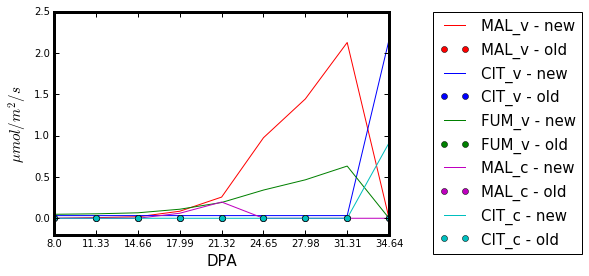

In [629]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

met = ["MAL_v","CIT_v","FUM_v"]
metCol = {"MAL_v":"r","CIT_v":"b","FUM_v":"g"}

for m in met:
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(cobra_model3.reactions.get_by_id(m+"_Transfer"+str(i)+str(i+1)).x + cobra_model3.reactions.get_by_id("a"+m+"_Transfer"+str(i)+str(i+1)).x)
        templist2.append(backup3.reactions.get_by_id(m+"_Transfer"+str(i)+str(i+1)).x + backup3.reactions.get_by_id("a"+m+"_Transfer"+str(i)+str(i+1)).x)
    plt.plot(xlist,templist,"-",label=m+" - new",color=metCol[m])
    plt.plot(xlist,templist2,"o",label=m+" - old",color=metCol[m])

met = ["MAL_c","CIT_c"]
metCol = {"MAL_c":"m","CIT_c":"c"}

for m in met:
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(cobra_model3.reactions.get_by_id(m+"_Transfer"+str(i)+str(i+1)).x)
        templist2.append(backup3.reactions.get_by_id(m+"_Transfer"+str(i)+str(i+1)).x)
    plt.plot(xlist,templist,"-",label=m+" - new",color=metCol[m])
    plt.plot(xlist,templist2,"o",label=m+" - old",color=metCol[m])
#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.legend(bbox_to_anchor=(1.60, 1.03),fontsize=15)
plt.ylim(-0.2,2.5)
plt.yticks(fontsize=10)
plt.xticks(xlist,DPA,fontsize=10)
plt.xlabel("DPA")
plt.ylabel(r'$\mu mol/m^2/s$')
plt.show()

### Sugar accumulation rates in old and new models (with and without water potential constraints, respectively)

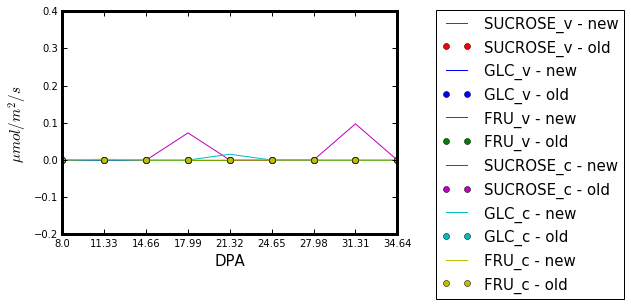

In [647]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

met = ["SUCROSE_v","GLC_v","FRU_v","SUCROSE_c","GLC_c","FRU_c"]
metCol = {"SUCROSE_v":"r","GLC_v":"b","FRU_v":"g","SUCROSE_c":"m","GLC_c":"c","FRU_c":"y"}

for m in met:
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(cobra_model3.reactions.get_by_id(m+"_Transfer"+str(i)+str(i+1)).x)
        templist2.append(backup3.reactions.get_by_id(m+"_Transfer"+str(i)+str(i+1)).x)
    plt.plot(xlist,templist,"-",label=m+" - new",color=metCol[m])
    plt.plot(xlist,templist2,"o",label=m+" - old",color=metCol[m])

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.legend(bbox_to_anchor=(1.70, 1.04),fontsize=15)
plt.ylim(-0.2,0.4)
plt.yticks(fontsize=10)
plt.xticks(xlist,DPA,fontsize=10)
plt.xlabel("DPA")
plt.ylabel(r'$\mu mol/m^2/s$')
plt.show()

### Sugar accumulation rates in old and new models (with and without water potential constraints, respectively)

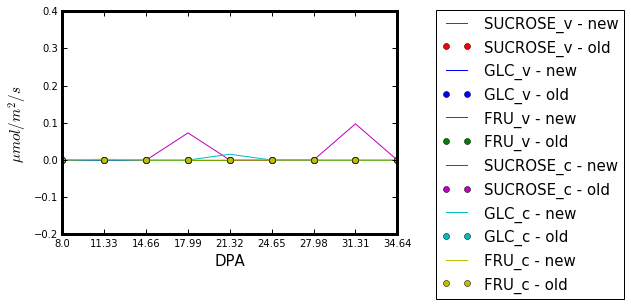

In [647]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

met = ["SUCROSE_v","GLC_v","FRU_v","SUCROSE_c","GLC_c","FRU_c"]
metCol = {"SUCROSE_v":"r","GLC_v":"b","FRU_v":"g","SUCROSE_c":"m","GLC_c":"c","FRU_c":"y"}

for m in met:
    templist = list()
    templist2 = list()
    xlist = list()
    error_min = list()
    error_max = list()
    for i in range(1,10):
        xlist.append(i)
        templist.append(cobra_model3.reactions.get_by_id(m+"_Transfer"+str(i)+str(i+1)).x)
        templist2.append(backup3.reactions.get_by_id(m+"_Transfer"+str(i)+str(i+1)).x)
    plt.plot(xlist,templist,"-",label=m+" - new",color=metCol[m])
    plt.plot(xlist,templist2,"o",label=m+" - old",color=metCol[m])

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
plt.legend(bbox_to_anchor=(1.70, 1.04),fontsize=15)
plt.ylim(-0.2,0.4)
plt.yticks(fontsize=10)
plt.xticks(xlist,DPA,fontsize=10)
plt.xlabel("DPA")
plt.ylabel(r'$\mu mol/m^2/s$')
plt.show()

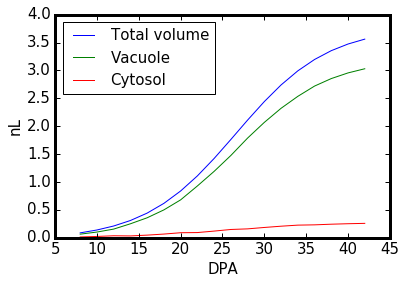

In [18]:
import math
DAA_list = list()
Vtot = list()
Vv = list()
Vc = list()
for DAA in range(8,43,2):
    Vcell = (0.02894333/(0.00760074+(math.e**(-0.18324543*DAA))))-0.03277816
    Vvac = 0.853*(1-(math.e**((-2292-(DAA*24*60))/10633)))
    Vcyt = (0.933 - Vvac)/1.13
    #print("DPA = "+str(DAA))
    #print("volume of Cytosol = "+str(Vcyt*Vcell))
    DAA_list.append(DAA)
    Vtot.append(Vcell)
    Vv.append(Vvac*Vcell)
    Vc.append(Vcyt*Vcell)


import matplotlib.pyplot as plt
#from matplotlib.ticker import MultipleLocator
#import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

plt.plot(DAA_list,Vtot,label="Total volume")
plt.plot(DAA_list,Vv,label="Vacuole")
plt.plot(DAA_list,Vc,label="Cytosol")
#plt.plot(DAA_list,Vv,label="Vacuole")

plt.legend(loc="best",fontsize=15)
plt.xlabel("DPA")
plt.ylabel("nL")
plt.show()

In [16]:
Vc



[0.015323924510552657,
 0.024195424880418884,
 0.03656759925611594,
 0.033576018216948327,
 0.04796001092914649,
 0.06687162048787396,
 0.09091038526602693,
 0.09384286807719529,
 0.1202794488188677,
 0.1490810796234565,
 0.1600552737409076,
 0.18525775614863083,
 0.20786563448544265,
 0.22702265042040184,
 0.23221301866258762,
 0.24370672667257287,
 0.2523578667925212,
 0.2587203621567429]

In [6]:
plot(Vc)

NameError: name 'plot' is not defined

In [38]:
cobra_model2.reactions.get_by_id("KI_v_Transfer910").x

1.0407817405257993

In [211]:
dir("")

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getslice__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_formatter_field_name_split',
 '_formatter_parser',
 'capitalize',
 'center',
 'count',
 'decode',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'index',
 'isalnum',
 'isalpha',
 'isdigit',
 'islower',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [49]:
#This function processes raw biomass data and returns upper and lower bounds to 
#be used in constraint scanning as done by Colombie et al 2015
#
#
def generateBoundsFromBiomass(datafile="/home/sanu/ColobieDataRaw.csv",met="sucrose",Rsampling = 1000,DPA=(11.4,14.8,18.2,21.6,25,28.4,31.8,25.2,38.6,41.3),show_plots=True,start=4.0,stop=57.0):
  import pandas as pd
  import math
  import numpy as np
  
  conc=list()
  rate_max=list()
  rate_min=list()
  
  
  
  ################################Main function####################################
  
  #import data
  df = pd.read_csv(datafile,sep="\t")
  Rsampling = 1000
  num2rem = int(0.025*Rsampling)
  
  x_values = list()
  y_values = list()
  
  
  for i in range(0,len(df)):
    if not df[met][i]== 0:
      x_values.append(df["DPA"][i])
      y_values.append(df[met][i])
  
  
  log_y_values = list()
  for i in y_values:
    log_y_values.append(math.log(i))
  
  
  
  x2 = np.arange(start,stop,0.1)
  y2 = np.poly1d(np.polyfit(x_values,log_y_values,3))
  
  ys = dict()
  
  for i in range(0,Rsampling):
    ind = np.random.choice(range(0,len(x_values)),size=int(len(x_values)*0.75),replace=False)
    #print ind
    x=list()
    y=list()
    for j in ind:
      x.append(x_values[j])
      y.append(log_y_values[j])
    ys[i]=np.poly1d(np.polyfit(x,y,3))
  
  
  maxys = list()
  max95s = list()
  minys = list()
  min95s = list()
  temp=dict()
  for i in ys.keys():
    temp[i]=ys[i](x2)
  
  yi = dict()
  for j in range(0,len(x2)):
    templist=list()
    for i in temp.keys():
      templist.append(temp[i][j])
    temp2list=sorted(templist)[num2rem:Rsampling-num2rem]
    yi[j]=templist
    maxys.append(max(templist))
    max95s.append(max(temp2list))
    minys.append(min(templist))
    min95s.append(min(temp2list))
  
  
  
  
  y3 = list()
  for i in y2(x2):
    y3.append(math.exp(i))
  
  maxy1 = list()
  for i in maxys:
    maxy1.append(math.exp(i))
  
  
  miny1 = list()
  for i in minys:
    miny1.append(math.exp(i))
  
  maxy95_1 = list()
  for i in max95s:
    maxy95_1.append(math.exp(i))
  
  
  miny95_1 = list()
  for i in min95s:
    miny95_1.append(math.exp(i))
  
  for i in DPA:
    conc.append(y3[int((i-min(x_values))*10)])
  
  if show_plots:
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams.update({'font.size': 20}) #sets a global fontsize
    plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['ytick.major.size'] = 5
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['axes.linewidth']=3 # makes axes line thicker
    plt.figure(figsize=(5,5))
    
    
    ax = plt.subplot()
    ax.plot(x_values,y_values,".",label="raw data")
    ax.plot(x2,y3,"g-",label="fitted curve")
    ax.plot(x2,maxy1,"r--",label="fitted curve with max. y")
    ax.plot(x2,miny1,"b--",label="fitted curve with min. y")
    plt.xlabel("Time(days)")
    plt.ylabel("Concentration (micromol/fruit)")
    plt.legend(bbox_to_anchor=(2, 1),fontsize=15)
    plt.show()
  
  ##############################derivatives#####################
  
  y2_deriv = y2.deriv()
  
  
  ys_deriv = dict()
  for i in ys.keys():
    ys_deriv[i] = ys[i].deriv()
  
  maxys_deriv = list()
  maxy95_deriv = list()
  minys_deriv = list()
  miny95_deriv = list()
  temp=dict()
  for i in ys.keys():
    templist=list()
    for j in range(0,len(x2)):
      templist.append(y3[j]*ys_deriv[i](x2[j]))
    temp[i]=templist
  
  
  yi_deriv = dict()
  for j in range(0,len(x2)):
    templist=list()
    for i in temp.keys():
      templist.append(temp[i][j])
    temp2list=sorted(templist)[num2rem:Rsampling-num2rem]
    yi_deriv[j]=templist
    maxys_deriv.append(max(templist))
    maxy95_deriv.append(max(temp2list))
    minys_deriv.append(min(templist))
    miny95_deriv.append(min(temp2list))
    
  
  
  
  y4 = list()
  for i in range(0,len(x2)):
    y4.append(y3[i]*y2_deriv(x2)[i])
  
  rate_max = list()
  rate_min = list()
  if not len(DPA)==0:
    j=0
    for i in DPA:
      rate_max.append(maxy95_deriv[int((i-min(x_values))*10)])
      rate_min.append(miny95_deriv[int((i-min(x_values))*10)])
      j=j+1
  
  
  if show_plots:
    import matplotlib.pyplot as plt
    
    %matplotlib inline
    plt.rcParams.update({'font.size': 20}) #sets a global fontsize
    plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['ytick.major.size'] = 5
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['axes.linewidth']=3 # makes axes line thicker
    plt.figure(figsize=(5,5))
    
    
    ax = plt.subplot()
    ax.plot(x2,y4,"g-",label="derivitative of fitted curve")
    ax.plot(x2,maxys_deriv,"r-",label="derivative of fitted curve with max.y")
    ax.plot(x2,minys_deriv,"b-",label="derivative of fitted curve with min.y")
    ax.plot(x2,maxy95_deriv,"r--",label="derivative of fitted curve with max. y 95%")
    ax.plot(x2,miny95_deriv,"b--",label="derivative of fitted curve with min. y 95%")
    ax.set_title(met+" flux")
    plt.xlabel("Time(days)")
    plt.ylabel("Flux (micromol/fruit/day)")
    plt.legend(bbox_to_anchor=(2.55, 1),fontsize=15)
    plt.show()
  
  return (conc,rate_max,rate_min)



#generateBoundsFromBiomass()

Processing palmitate...


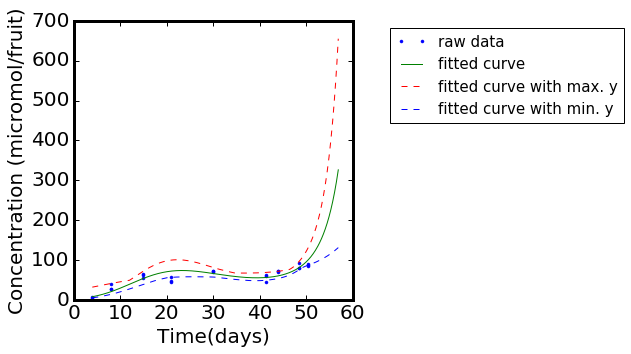

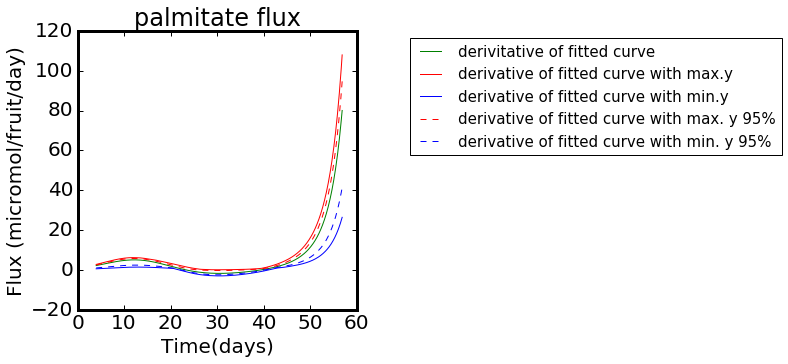

[8.0, 12.7, 17.4, 22.1, 26.8, 31.5, 36.2, 40.9, 45.6, 50.300000000000004, 55.0]

In [50]:


mets = ("palmitate",)
dfile="/home/sanu/ColobieDataRaw_FA.csv"
Rsampl= 1000


for met in mets:
  print "Processing "+met+"..."
  [conc[met],flux_max[met],flux_min[met]]=generateBoundsFromBiomass(datafile = dfile,met=met,Rsampling=Rsampl,DPA=DAA,show_plots=True)

DAA

In [47]:
DPA = list()
for i in np.linspace(8,55,11):
    DPA.append(round(i,1))

In [48]:
DPA

[8.0, 12.7, 17.4, 22.1, 26.8, 31.5, 36.2, 40.9, 45.6, 50.3, 55.0]

In [4]:
import math
def estimateVcyt(DPA):
    j = DPA*24*60
    Vvac = 0.853*(1-math.e**(float(-2292-j)/10633))
    Vcyt = (0.933-Vvac)/1.13
    return Vcyt*estimateVcell(DPA)

for i in [8,20,30,40,50]:
    print("DPA"+str(i)+" ="+str(estimateVcyt(i)*25000000))

DPA8 =6.12961790947e-07
DPA20 =2.3349034121e-06
DPA30 =4.95981255966e-06
DPA40 =6.38105804028e-06
DPA50 =6.65488652787e-06


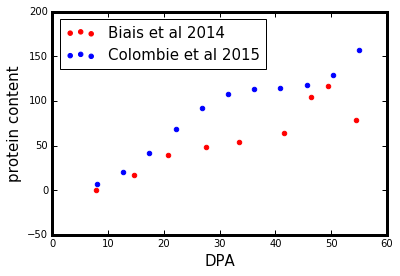

In [11]:
x1=[7.7956821612,14.7135783684,20.6749897105,27.5237905187,33.5611569114,41.5311989424,46.4067898078,49.4527245289,54.3689744197]
y1=[0.6749657641,16.9621871063,39.634378079,48.8926626673,54.0616690156,63.7513563402,104.6780628344,116.2508167974,78.7068095137]

x2=[8,12.7,17.4,22.1,26.8,31.5,36.2,40.9,45.6,50.3,55]
y2=[6.98154201,19.934538037,42.0057068453,68.8409267776,92.4720314288,107.297191763,113.336440471,114.853180635,117.678660933,128.476184749,157.509500892]

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

plt.scatter(x1,y1,color="r",label="Biais et al 2014")
plt.scatter(x2,y2,color="b",label="Colombie et al 2015")

#plt.fill_between(xlist,error_max,error_min,alpha=0.3,edgecolor="red")
#plt.legend(bbox_to_anchor=(1.70, 1.04),fontsize=15)
plt.legend(loc="upper left",fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel("DPA")
plt.ylabel("protein content")
plt.show()

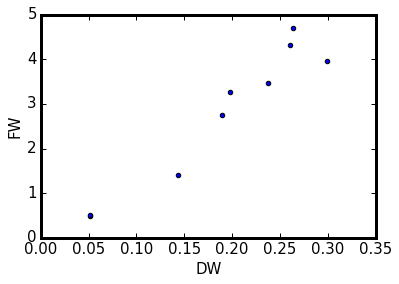

In [186]:
DPA=[8,15,22,28,34,42,50,52,59]
DW=[0.05164375,0.0512333333,0.1433666667,0.29955,0.1889333333,0.2377166667,0.1982,0.2607166667,0.2641166667]
FW=[0.4890625,0.5078,1.4142666667,3.9661333333,2.7472666667,3.4726,3.2625,4.3144333333,4.70095]

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

plt.scatter(DW,FW)

plt.xlabel("DW")
plt.ylabel("FW")
plt.show()

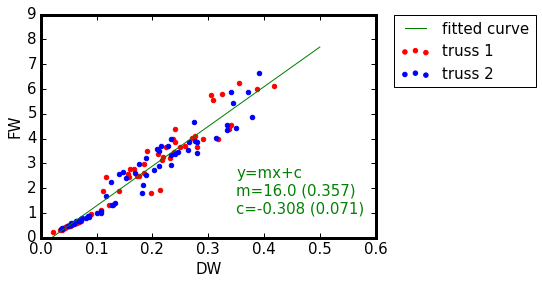

In [5]:
DW1=[0.0348,0.0373,0.0377,0.0389,0.0441,0.0478,0.0482,0.0493,0.0518,0.0527,0.0538,0.0613,0.0639,0.0643,0.0678,0.0726,0.0215,0.0383,0.0427,0.047,0.0719,0.086,0.0906,0.1085,0.1216,0.1293,0.1966,0.2136,0.2317,0.2909,0.3173,0.3365,0.3405,0.2804,0.1396,0.158,0.1757,0.2386,0.2495,0.1722,0.1851,0.2166,0.219,0.2705,0.2584,0.2767,0.1571,0.159,0.1854,0.2096,0.2369,0.2412,0.1119,0.1173,0.225,0.4177,0.3049,0.3875,0.1663,0.1897,0.2402,0.3254,0.3544,0.3087]
FW1=[0.334,0.3346,0.3619,0.3627,0.4309,0.4585,0.4619,0.471,0.4775,0.4804,0.5345,0.5937,0.6096,0.613,0.6359,0.6649,0.2213,0.3692,0.3932,0.4817,0.6984,0.883,0.9758,1.1178,1.3208,1.3356,1.8123,1.9233,3.2226,3.9643,3.993,4.3898,4.5487,3.6784,1.9016,2.436,2.5018,3.4781,3.6674,2.4987,2.6124,3.1406,3.2571,4.0162,3.6969,4.1124,2.5827,2.7563,2.9619,3.3933,4.0014,3.8794,1.8898,2.4418,3.6782,6.1218,5.748,6.007,2.7834,3.4908,4.3691,5.784,6.2263,5.5521]

DW2=[0.0384,0.0525,0.0535,0.0548,0.0578,0.0588,0.0633,0.0703,0.0713,0.0719,0.0746,0.0806,0.0856,0.0861,0.1004,0.1087,0.0363,0.0377,0.0482,0.054,0.058,0.0651,0.0701,0.0846,0.1081,0.1273,0.1323,0.1805,0.1886,0.2022,0.2406,0.2758,0.3342,0.2794,0.1823,0.233,0.2644,0.2653,0.3328,0.2459,0.212,0.2325,0.279,0.3793,0.3144,0.35,0.1259,0.1405,0.1688,0.2083,0.2329,0.1753,0.1162,0.1524,0.2747,0.3721,0.345,0.2282,0.148,0.1878,0.2114,0.2147,0.3414,0.3918]
FW2=[0.3717,0.5235,0.5279,0.5315,0.5608,0.5719,0.6637,0.7156,0.7485,0.7491,0.7888,0.7992,0.835,0.8702,0.9803,1.0856,0.3715,0.3857,0.472,0.5806,0.615,0.6855,0.675,0.8697,1.005,1.337,1.4136,1.8111,2.537,2.7187,3.3642,3.917,4.554,3.8774,2.134,3.3351,3.5239,3.86,4.3654,3.4576,2.8774,2.9464,3.4351,4.8747,4.0414,4.4143,2.2529,2.5532,2.6097,3.578,4.001,2.9686,1.7013,2.3919,4.6763,5.8748,5.4471,3.6894,2.6594,3.2181,3.5009,3.6968,5.8789,6.6497]


def DW_FW_linefitting(x,m,c):
    y = (m*x)+c
    return y

from scipy.optimize import curve_fit

popt_DWFW, pcov_DWFW = curve_fit(DW_FW_linefitting,DW1+DW2,FW1+FW2,method="lm")

xlist = list()
ylist = list()
for i in range(0,6):
    i=float(i)/10
    xlist.append(i)
    ylist.append(DW_FW_linefitting(i,*popt_DWFW))

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

plt.scatter(DW1,FW1,label="truss 1",color="r")
plt.scatter(DW2,FW2,label="truss 2",color="b")
plt.plot(xlist,ylist,label="fitted curve",color="g")
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel("DW")
plt.ylabel("FW")
plt.legend(bbox_to_anchor=(1.5, 1.03),fontsize=15)
plt.text(0.35,1,"y=mx+c\nm="+str(round(popt_DWFW[0],3))+" ("+str(round(np.sqrt(np.diag(pcov_DWFW))[0],3))+")\nc="+str(round(popt_DWFW[1],3))+" ("+str(round(np.sqrt(np.diag(pcov_DWFW))[1],3))+")",color="g")

plt.show()

In [8]:
perr = np.sqrt(np.diag(pcov_DWFW))
perr

array([0.3568482, 0.0709829])

In [7]:
popt_DWFW

array([15.99976872, -0.30783507])

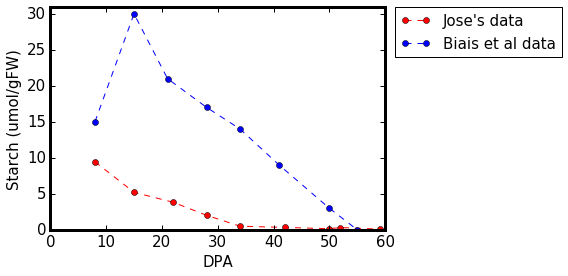

In [20]:
DPA=[8,15,22,28,34,42,50,52,59]
Starch_per_DW = [148.2052504354,81.7053560751,60.0371634994,31.5838945913,7.8734147066,5.1659500737,2.4284717884,4.9323825306,1.4832194102]
FW_oneDW = 16 - 0.31
Starch_per_FW = list()
for x in Starch_per_DW:
    Starch_per_FW.append(x/FW_oneDW)
BiaisDPA = [8,15,21,28,34,41,50,55]
BiaisStarch_per_FW = [15,30,21,17,14,9,3,0]

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

plt.plot(DPA,Starch_per_FW,"--o",label="Jose's data",color="r")
plt.plot(BiaisDPA,BiaisStarch_per_FW,"--o",label="Biais et al data",color="b")
plt.xlim(0,)
plt.ylim(0,31)
plt.xlabel("DPA")
plt.ylabel("Starch (umol/gFW)")
plt.legend(bbox_to_anchor=(1.55, 1.03),fontsize=15)
plt.show()

### Jose's FW data

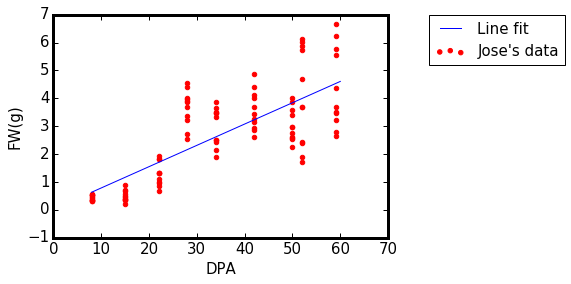

Equation:
y =mx+c
m=0.07638668810637039
c=0.02154639949691739


In [90]:
DPA_1= [8,15,22,28,34,42,50,52,59]
FW_1 = [0.334,0.2213,0.9758,3.2226,1.9016,2.6124,2.5827,1.8898,2.7834]
DPA_2= [8,15,22,28,34,42,50,52,59]
FW_2 = [0.3346,0.3692,1.1178,3.9643,2.436,3.1406,2.7563,2.4418,3.4908]
DPA_3= [8,15,22,28,34,42,50,52,59]
FW_3 = [0.3619,0.3932,1.3208,3.993,2.5018,3.2571,2.9619,3.6782,4.3691]
DPA_4= [8,15,22,28,34,42,50,52,59]
FW_4 = [0.3627,0.4817,1.3356,4.3898,3.4781,4.0162,3.3933,6.1218,5.784]
DPA_5= [8,15,22,28,34,42,50,52,59]
FW_5 = [0.4309,0.6984,1.8123,4.5487,3.6674,3.6969,4.0014,5.748,6.2263]
DPA_6= [8,15,22,28,34,42,50,52,59]
FW_6 = [0.4585,0.883,1.9233,3.6784,2.4987,4.1124,3.8794,6.007,5.5521]
DPA_7= [8,15,22,28,34,42,50,52,59]
FW_7 = [0.3717,0.3715,0.675,2.537,2.134,2.8774,2.2529,1.7013,2.6594]
DPA_8= [8,15,22,28,34,42,50,52,59]
FW_8 = [0.5235,0.3857,0.8697,2.7187,3.3351,2.9464,2.5532,2.3919,3.2181]
DPA_9= [8,15,22,28,34,42,50,52,59]
FW_9 = [0.5279,0.472,1.005,3.3642,3.5239,3.4351,2.6097,4.6763,3.5009]
DPA_10= [8,15,22,28,34,42,50,52,59]
FW_10 = [0.5315,0.5806,1.337,3.917,3.86,4.8747,3.578,5.8748,3.6968]
DPA_11= [8,15,22,28,34,42,50,52,59]
FW_11 = [0.5608,0.615,1.4136,4.554,4.3654,4.0414,4.001,5.4471,5.8789]
DPA_11= [8,15,22,28,34,42,50,52,59]
FW_11 = [0.5719,0.6855,1.8111,3.8774,3.4576,4.4143,2.9686,3.6894,6.6497]

def DPA_FW_curve(x,m,c):
    y = (m*x)+c
    return y

from scipy.optimize import curve_fit
popt_FWDPA, pcov_FWDPA = curve_fit(DPA_FW_curve,DPA_1+DPA_2+DPA_3+DPA_4+DPA_5+DPA_6+DPA_7+DPA_8+DPA_9+DPA_10+DPA_11,FW_1+FW_2+FW_3+FW_4+FW_5+FW_6+FW_7+FW_8+FW_9+FW_10+FW_11,method="lm")

DPA_dash = list()
FW_dash = list()
for i in range(8,61):
    DPA_dash.append(i)
    FW_dash.append(DPA_FW_curve(i,*popt_FWDPA))


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

plt.scatter(DPA_1+DPA_2+DPA_3+DPA_4+DPA_5+DPA_6+DPA_7+DPA_8+DPA_9+DPA_10+DPA_11,FW_1+FW_2+FW_3+FW_4+FW_5+FW_6+FW_7+FW_8+FW_9+FW_10+FW_11,label="Jose's data",color="r")
plt.plot(DPA_dash,FW_dash,label="Line fit",color="b")
#plt.xlim(0,)
#plt.ylim(0,31)
plt.xlabel("DPA")
plt.ylabel("FW(g)")
plt.legend(bbox_to_anchor=(1.55, 1.03),fontsize=15)
plt.show()

print("Equation:\ny =mx+c")
print("m="+str(popt_FWDPA[0]))
print("c="+str(popt_FWDPA[1]))

#### DPA vs fruit FW

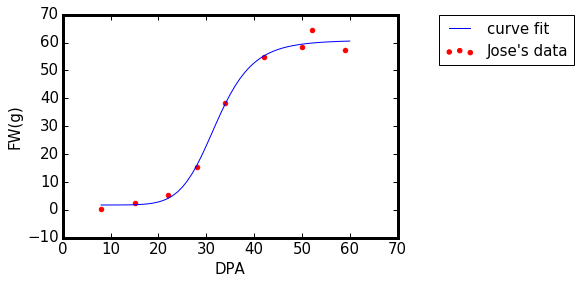

Equation:
y =a+((b-c)/(1+((x/d)**e)))
a=60.81973868579338
b=-10657.387676309034
c=-10598.32971442436
d=32.132292282374394
e=8.381671975168445


In [563]:
DPA_list= [8,15,22,28,34,42,50,52,59]
FW_list = [0.32,2.34,5.50,15.35,38.42,54.65,58.24,64.36,57.47]

def DPA_FW_curve(x,a,b,c,d,e):
    y = (a +((b - c)/(1 +((x/d)**e)))) # units = m3
    return y

from scipy.optimize import curve_fit
popt_FWDPA, pcov_FWDPA = curve_fit(DPA_FW_curve,DPA_list,FW_list)

DPA_dash = list()
FW_dash = list()
for i in range(8,61):
    DPA_dash.append(i)
    FW_dash.append(DPA_FW_curve(i,*popt_FWDPA))


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

plt.scatter(DPA_list,FW_list,label="Jose's data",color="r")
plt.plot(DPA_dash,FW_dash,label="curve fit",color="b")
#plt.xlim(0,)
#plt.ylim(0,31)
plt.xlabel("DPA")
plt.ylabel("FW(g)")
plt.legend(bbox_to_anchor=(1.55, 1.03),fontsize=15)
plt.show()

print("Equation:\ny =a+((b-c)/(1+((x/d)**e)))")
print("a="+str(popt_FWDPA[0]))
print("b="+str(popt_FWDPA[1]))
print("c="+str(popt_FWDPA[2]))
print("d="+str(popt_FWDPA[3]))
print("e="+str(popt_FWDPA[4]))

    Equation => 
$$a+\frac{(b-c)}{1+{[\frac xd]}^e}$$

### Phytol and Lycopene data

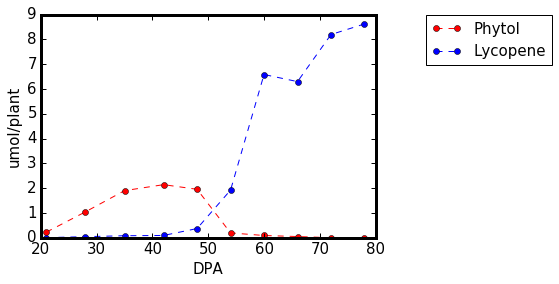

In [518]:
#DPA in days
DPA = [21,28,35,42,48,54,60,66,72,78]
#Phytol and Lycopene in umol/gFW
Phytol = [0.067741076,0.0657593607,0.0458936512,0.0388396383,0.0332476733,0.0032753815,0.0015364195,0.0008314565,7.79365903829304E-05,3.47651600866332E-05]
Lycopene = [0.0020945422,0.0028425361,0.0020140222,0.0017112763,0.0063453812,0.0319966707,0.1088246415,0.103791235,0.1349068492,0.1418529456]

for i in range(0,len(DPA)):
    Phytol[i] = Phytol[i]*DPA_FW_curve(DPA[i],*popt_FWDPA)
    Lycopene[i] = Lycopene[i]*DPA_FW_curve(DPA[i],*popt_FWDPA)

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

plt.plot(DPA,Phytol,"--o",label="Phytol",color="r")
plt.plot(DPA,Lycopene,"--o",label="Lycopene",color="b")
#plt.xlim(0,)
#plt.ylim(-0.1,0.9)
plt.xlabel("DPA")
plt.ylabel("umol/plant")
plt.legend(bbox_to_anchor=(1.55, 1.03),fontsize=15)
plt.show()


    Because in our sample fruits ripen at 60 DPA, DPA reported need to be scaled to match our DPA

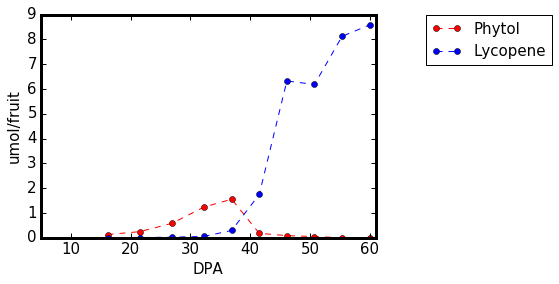

In [519]:
#DPA in days
DPA = [21,28,35,42,48,54,60,66,72,78]
#Phytol and Lycopene in umol/gFW
Phytol = [0.067741076,0.0657593607,0.0458936512,0.0388396383,0.0332476733,0.0032753815,0.0015364195,0.0008314565,7.79365903829304E-05,3.47651600866332E-05]
Lycopene = [0.0020945422,0.0028425361,0.0020140222,0.0017112763,0.0063453812,0.0319966707,0.1088246415,0.103791235,0.1349068492,0.1418529456]

#scaling DPA
for i in range(0,len(DPA)):
    DPA[i]=DPA[i]*(float(60)/78)
    Phytol[i] = Phytol[i]*DPA_FW_curve(DPA[i],*popt_FWDPA)
    Lycopene[i] = Lycopene[i]*DPA_FW_curve(DPA[i],*popt_FWDPA)

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

plt.plot(DPA,Phytol,"--o",label="Phytol",color="r")
plt.plot(DPA,Lycopene,"--o",label="Lycopene",color="b")
plt.xlim(5,61)
#plt.ylim(-0.1,0.9)
plt.xlabel("DPA")
plt.ylabel("umol/fruit")
plt.legend(bbox_to_anchor=(1.55, 1.03),fontsize=15)
plt.show()


    Segmented lines can be used to fit the data points in order to generate phytol and lycopene content for DPA of interest

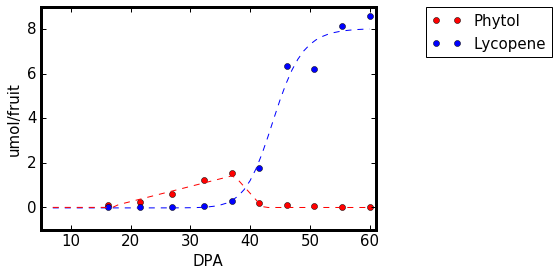

In [562]:
#DPA in days
DPA_list = [21.0,28.0,35.0,42.0,48.0,54.0,60.0,66.0,72.0,78.0]
#Phytol and Lycopene in umol/gFW
Phytol = [0.067741076,0.0657593607,0.0458936512,0.0388396383,0.0332476733,0.0032753815,0.0015364195,0.0008314565,7.79365903829304E-05,3.47651600866332E-05]
Lycopene = [0.0020945422,0.0028425361,0.0020140222,0.0017112763,0.0063453812,0.0319966707,0.1088246415,0.103791235,0.1349068492,0.1418529456]

#scaling DPA
for i in range(0,len(DPA_list)):
    DPA_list[i]=DPA_list[i]*(float(60)/78)
    Phytol[i] = Phytol[i]*DPA_FW_curve(DPA_list[i],*popt_FWDPA)
    Lycopene[i] = Lycopene[i]*DPA_FW_curve(DPA_list[i],*popt_FWDPA)


import numpy as np
from scipy.optimize import curve_fit

def DPA_Lyc_curve(x,a,b,c,d,e):
    y = (a +((b - c)/(1 +((x/d)**e)))) # units = m3
    return y

from scipy.optimize import curve_fit
popt2_Lyc, pcov2_Lyc = curve_fit(DPA_Lyc_curve,DPA_list,Lycopene)


y1 = np.poly1d(np.polyfit(DPA_list[0:4],Phytol[0:4],1))
y2 = np.poly1d(np.polyfit(DPA_list[4:6],Phytol[4:6],1))


x= list()
phy_curve=list()
lyc_curve=list()
temp=list()
for i in range(7,61):
    x.append(float(i))
    lyc_curve.append(DPA_Lyc_curve(i,*popt2_Lyc))
    if i<18:
        phy_curve.append(0.004)
    elif i>=18 and i<38:
        phy_curve.append(y1(i))
    elif i>=38 and i<DPA_list[5]+0.5:
        phy_curve.append(y2(i))
    else:
        phy_curve.append(0)      
        

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

plt.plot(DPA_list,Phytol,"o",label="Phytol",color="r")
plt.plot(DPA_list,Lycopene,"o",label="Lycopene",color="b")
plt.plot(x,lyc_curve,"--",color="b")
plt.plot(x,phy_curve,"--",color="r")
plt.xlim(5,61)
#plt.ylim(-0.1,0.9)
plt.xlabel("DPA")
plt.ylabel("umol/fruit")
plt.legend(bbox_to_anchor=(1.55, 1.03),fontsize=15)
plt.show()

### DPA vs Fruit Volume

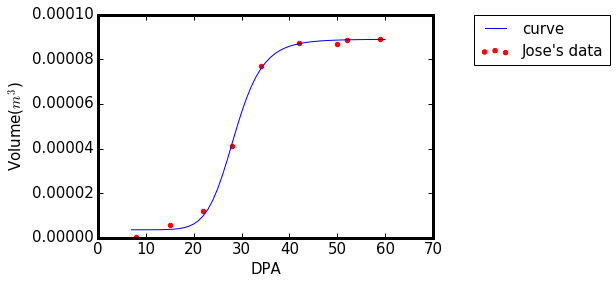

In [368]:
DPA_list= [8,15,22,28,34,42,50,52,59]
Volume_list = [4.11760171525605*(10**(-7)),5.64849981535035*(10**(-6)),1.18280963407656*(10**(-5)),4.09063213716265*(10**(-5)),0.000076893,8.7190757198082*(10**(-5)),8.67881809490804*(10**(-5)),8.84622890738873*(10**(-5)),0.000089247]

def DPA_V_curve(x):
    a = 0.0000889527
    b = 0.000003593996
    c = 0.0000889527
    d = 28.56023
    e = 9.692893
    y = (a +((b - c)/(1 +((x/d)**e)))) # units = m3
    return y


xlist = list()
ylist = list()
for i in range(7,61):
    xlist.append(i)
    ylist.append(DPA_V_curve(i))

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
plt.rcParams.update({'font.size': 15}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 3 # makes axes line thicker

plt.scatter(DPA_list,Volume_list,label="Jose's data",color="r")
plt.plot(xlist,ylist,label="curve",color="b")
plt.ylim(0,0.0001)
plt.xlabel("DPA")
plt.ylabel("Volume($m^3$)")
plt.legend(bbox_to_anchor=(1.55, 1.03),fontsize=15)
plt.show()



In [51]:
cobra_model2.metabolites.get_by_id("CELLULOSE_c1").formula_weight

162.1406

In [123]:
Phytol[5:]

[0.0135811321, 0.0070748241, 0.0042097207, 0.0004303182, 0.0002078855]

In [143]:
DPA

[16.153846153846153,
 21.53846153846154,
 26.923076923076923,
 32.30769230769231,
 36.92307692307693,
 41.53846153846154,
 46.15384615384615,
 50.769230769230774,
 55.38461538461539,
 60.0]

In [146]:
m=float(Phytol[5]-Phytol[4])/(DPA[5] - DPA[4])

In [147]:
c= -m*DPA[5]

In [148]:
m

-0.02362530274000001

In [149]:
c

0.9813587292000004

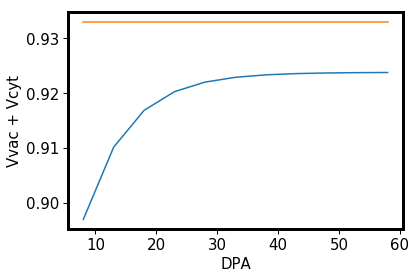

In [175]:

xlist = list()
ylist = list()
ylist2 = list()
ylist4 = list()
ylist5 = list()
for T in range(8,60,5):
    j = T*24*60
    Vvac = 0.853*(1-math.e**(float(-2292-j)/10633))
    Vcyt = (0.933-Vvac)/1.13
    Vplas = 0.13*Vcyt
    xlist.append(T)
    ylist.append(Vvac+Vcyt)
    ylist2.append(1-Vvac-Vcyt)
    ylist4.append(Vvac+Vcyt+Vplas)
    ylist5.append(1-Vvac-Vcyt-Vplas)

import matplotlib.pyplot as plt
plt.plot(xlist,ylist,label="cytoplasm includes plastid")
plt.plot(xlist,ylist4,label="cytoplasm excludes plastid")
plt.xlabel("DPA")
plt.ylabel("Vvac + Vcyt")
plt.show()

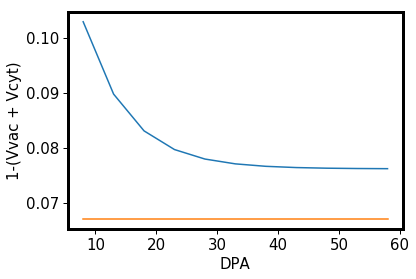

In [176]:
import matplotlib.pyplot as plt
plt.plot(xlist,ylist2,label="cytoplasm includes plastid")
plt.plot(xlist,ylist5,label="cytoplasm excludes plastid")
plt.xlabel("DPA")
plt.ylabel("1-(Vvac + Vcyt)")
plt.show()

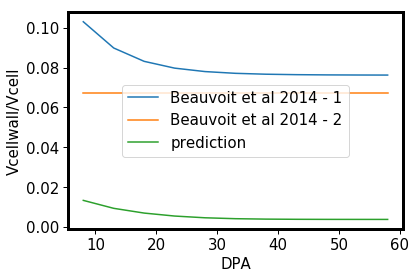

In [181]:
#Estimate cell volume based on Beauvoit et al
def estimateVcell(T):
    import math
    Vcell = ((0.02894333/(0.00760074+(math.e**(-0.18324543*T))))-0.03277816)*(10**-12) # units = m3
    return Vcell

#Estimate volume of cell wall in a cell
def estimateVcellwall(T):
    Vcell = estimateVcell(T)			#unit = m3
    a = Vcell**(1.0/3)
    #cell wall thickness = 100 nm according to figure 19-68, https://www.ncbi.nlm.nih.gov/books/NBK26928/
    b=100*(10**-9)				#unit = m
    y = (8*(b**3))+(6*(a**2)*b)-(12*a*(b**2))
    return y


xlist2 = list()
ylist3 = list()
for T in range(8,60,5):
    ylist3.append(estimateVcellwall(T)/estimateVcell(T))

import matplotlib.pyplot as plt
plt.plot(xlist,ylist2,label="Beauvoit et al 2014 - 1")
plt.plot(xlist,ylist5,label="Beauvoit et al 2014 - 2")
plt.plot(xlist,ylist3,label="prediction")
plt.xlabel("DPA")
plt.ylabel("Vcellwall/Vcell")
plt.legend(loc="center")
plt.show()